In [218]:
#! pip install ydata_profiling
!pip install arabic-reshaper python-bidi

In [1]:
#Import all relevant libraries
# import ipyvizzu as ipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
#from ydata_profiling import ProfileReport
#from pandas_profiling import ProfileReport

## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [98]:
#Read in the csv file and convert to a Pandas dataframe
housing = pd.read_csv("RiyadhVillasAqar.csv", index_col=0, low_memory=False)

In [ ]:
# profile = ProfileReport(housing, explorative=True)  # Create profile report
# profile.to_file("report.html")  # Save as an interactive HTML file
# files.download("report.html")

In [7]:
#Read in the csv file and convert to a Pandas dataframe
realEstate = pd.read_csv("realEstate.csv", index_col=0)

In [ ]:
# profile = ProfileReport(apartments, explorative=True)  # Create profile report
# profile.to_file("report2.html")  # Save as an interactive HTML file
# files.download("report2.html")

In [8]:
# Define the file path for the Excel file containing real estate data
file_path = "/content/Riyadh_Aqqar.xlsx"

# Load the "Land (الاراضي)" sheet into a DataFrame
df_land = pd.read_excel(file_path, sheet_name="Land (الاراضي)")

# Load the "Villas (الفلل)" sheet into a DataFrame
df_villas = pd.read_excel(file_path, sheet_name="Villas (الفلل)")

# Load the "Apartments (الشقق)" sheet into a DataFrame
df_apartments = pd.read_excel(file_path, sheet_name="Apartments (الشقق)")


In [ ]:
# profile = ProfileReport(df_land, explorative=True)
# profile.to_file("land_report.html")
# files.download("land_report.html")

In [ ]:
# profile = ProfileReport(df_villas, explorative=True)
# profile.to_file("villas_report.html")
# files.download("villas_report.html")

In [ ]:
# profile = ProfileReport(df_apartments, explorative=True)
# profile.to_file("apartments_report.html")
# files.download("apartments_report.html")

## Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [9]:
# Display the first 3 rows
housing.head(3)

front  rooms lounges bathrooms  streetWidth  stairs  propertyAge  \
0         شرقية      5       4        5+         20.0       1            0   
1         غربية      4       3        5+         20.0       1            0   
2  جنوبية شرقية      7       2        5+         15.0       1           31   

   driverRoom  tent  patio  ...  apartments  maidRoom  elevator  furnihsed  \
0           1     1      1  ...           0       0.0       0.0        0.0   
1           1     1      1  ...           2       1.0       1.0        0.0   
2           1     0      1  ...           0       1.0       0.0        0.0   

   pool basement  neighbourhood     location      price  square price  
0   0.0      0.0          عكاظ   جنوب الرياض  1050000.0   3500.000000  
1   0.0      0.0       المهدية    غرب الرياض  3000000.0   5555.555556  
2   0.0      0.0         الشفا   جنوب الرياض  2000000.0   2285.714286  

[3 rows x 25 columns]

In [10]:
# Display the first 3 rows
realEstate.head(3)

id                                              title  price  \
user_id                                                                      
1495817  4596035  شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...  20000   
496663   4599813  شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...  25000   
2412431  4554519  شقة للإيجار في شارع أبي الحسن الأسفرائيني ، حي...  22000   

                                                   content  \
user_id                                                      
1495817                                        1666 كل شهر   
496663   شقة ارضية للإيجار بحي الفيحاء شارع الاقتصاد \r...   
2412431  شقه للايجار حي الرمال \r\nمكون\r\nالدور ثالث\r...   

                                                      imgs  \
user_id                                                      
1495817  ['014958174_1659666836308.jpg', '014958178_165...   
496663   ['004966630_1659781493595.jpg', '004966636_165...   
2412431  ['023243548_1658701693777.jpg', '023243549_165...   

                            refresh  beds  livings  wc   area  ...  width  \
user_id                                                        ...          
1495817  ['2022-08-06', '12:22:15']     3      0.0   2  225.0  ...   15.0   
496663   ['2022-08-06', '10:27:57']     3      1.0   2  130.0  ...    NaN   
2412431  ['2022-08-06', '06:59:03']     3      1.0   2  200.0  ...   10.0   

         length     advertiser_type                 create_time  review  \
user_id                                                                   
1495817    15.0               owner  ['2022-08-05', '02:44:23']    5.00   
496663      NaN  exclusive_marketer  ['2022-08-06', '10:27:56']    4.33   
2412431    20.0     normal_marketer  ['2022-07-24', '22:27:27']    4.67   

         profileImg                   UserName iam_verified onMarket  IsRent  
user_id                                                                       
1495817         NaN                    Thamer          True       17   False  
496663          yes   الاركان الثابته للعقارات         True        5    True  
2412431         NaN         مكتب منزلك الفاخر          True       15    True  

[3 rows x 29 columns]

In [11]:
# Display the first 3 rows
df_land.head(3)

نوع العقار الغرض              المدينة         الحي     الواجهة  المساحة  \
0        أرض   NaN   امارة منطقة الرياض      الرياض        غربية      375   
1        أرض   NaN              الرياض    حي غرناطة       شمالية      800   
2        أرض  سكني              الرياض    حي غرناطة   ثلاث شوارع     1650   

   سعر المتر  السعر الإجمالي  
0     2900.0         1087500  
1     4800.0         3840000  
2     4800.0         7920000

In [12]:
# Display the first 3 rows
df_villas.head(3)

نوع العقار   المدينة         الحي الواجهة عدد الغرف عدد الصالات  \
0       فيلا   الرياض    حي العارض   جنوبية         6           3   
1       فيلا   الرياض    حي العارض   جنوبية         6           4   
2       فيلا   الرياض    حي العارض   جنوبية         3           2   

  عدد الحمامات  عرض الشارع  المساحة  درج صالة  مطبخ  غرفة خادمة  غرفة سائق  \
0           5+         NaN    244.0         1     1           1          1   
1           5+         NaN    322.0         1     1           1          1   
2           5+         NaN    350.0         1     0           1          0   

   ملحق  حوش  مسبح  قبو  مدخل سيارة  مصعد  السعر الاجمالي  
0     0    1     0    0           1     1         2300000  
1     1    1     0    0           1     1         3000000  
2     1    0     0    1           1     1         2600000

In [13]:
# Display the first 3 rows
df_apartments.head(3)

نوع العقار   المدينة         الحي       الواجهة  عدد الغرف  عدد الصالات  \
0        شقة   الرياض    حي المروج         جنوبية          4          1.0   
1        شقة   الرياض    حي العارض   شمالية غربية          3          1.0   
2        شقة   الرياض    حي النرجس            NaN          3          1.0   

  عدد الحمامات  المساحة  مطبخ  مدخل سيارة  مصعد الدور  عمر العقار  مؤثثة  \
0            3      249     1           0     1     3         0.0      0   
1            3      199     0           0     1  علوي         0.0      0   
2            3      145     1           0     1  أرضي         2.0      0   

   السعر الاجمالي  
0         1434000  
1          980000  
2         1050000

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data.

### 1st Dataset [(Riyadh Housing Data)](https://www.kaggle.com/datasets/salmanshir/riyadhhousingdata)



In [99]:
# Display the first 3 rows
housing.head(3)

front  rooms lounges bathrooms  streetWidth  stairs  propertyAge  \
0         شرقية      5       4        5+         20.0       1            0   
1         غربية      4       3        5+         20.0       1            0   
2  جنوبية شرقية      7       2        5+         15.0       1           31   

   driverRoom  tent  patio  ...  apartments  maidRoom  elevator  furnihsed  \
0           1     1      1  ...           0         0         0          0   
1           1     1      1  ...           2         1         1          0   
2           1     0      1  ...           0         1         0          0   

   pool basement  neighbourhood     location      price  square price  
0     0        0          عكاظ   جنوب الرياض  1050000.0   3500.000000  
1     0        0       المهدية    غرب الرياض  3000000.0   5555.555556  
2     0        0         الشفا   جنوب الرياض  2000000.0   2285.714286  

[3 rows x 25 columns]

In [15]:
# Print number of rows and columns
housing.shape

(35591, 25)

In [16]:
# Print the labels of the columns
housing.columns

Index(['front', 'rooms', 'lounges', 'bathrooms', 'streetWidth', 'stairs',
       'propertyAge', 'driverRoom', 'tent', 'patio', 'kitchen', 'outdoorRoom',
       'garage', 'duplex', 'space', 'apartments', 'maidRoom', 'elevator',
       'furnihsed', 'pool', 'basement', 'neighbourhood', 'location', 'price',
       'square price'],
      dtype='object')

In [17]:
# Print some information about the dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35591 entries, 0 to 39426
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   front          35591 non-null  object 
 1   rooms          35591 non-null  int64  
 2   lounges        34725 non-null  object 
 3   bathrooms      35591 non-null  object 
 4   streetWidth    35445 non-null  float64
 5   stairs         35591 non-null  int64  
 6   propertyAge    35591 non-null  int64  
 7   driverRoom     35591 non-null  int64  
 8   tent           35591 non-null  int64  
 9   patio          35591 non-null  int64  
 10  kitchen        35591 non-null  int64  
 11  outdoorRoom    35590 non-null  float64
 12  garage         35590 non-null  float64
 13  duplex         35590 non-null  float64
 14  space          35590 non-null  float64
 15  apartments     35590 non-null  object 
 16  maidRoom       35590 non-null  float64
 17  elevator       35590 non-null  float64
 18  furnihsed  

It appears that `Unnamed:` 0" is an index and not an actual column in the data. This is evident from the presence of sequential numbers in the column (0, 1, 2, ..., 46825) which indicates that it is the index. There is no such column in the original data file (RiyadhVillasAqar.xlsx), which means that it was added when reading the data into pandas.

**Total Missing Values = 	1312**

There are no missing values in all columns EXCEPT:
- `lounges` has 1118 missing vales.
- `streetWidth` has 190 missing values.
- `price`and `square price` has two missing value.



We need to change the column's names to Arabic to be consistent with others datasets

In [18]:
# Generate descriptive statistics for categorical (object-type) columns in the 'housing' DataFrame.
# This will provide insights such as unique values, most frequent values (top), and their counts (freq).
housing.describe(include = 'object')

front lounges bathrooms apartments neighbourhood    location
count    35591   34725     35591      35590         35590       35590
unique      10       6         5         20           279           5
top     شمالية       2        5+          0         طويق   غرب الرياض
freq      9158   14889     24589      20346          5870       10232

**The Unique Values In:**

- `front` = 10 fronts.

- `lounges` = 6 lounges.

- `location` = 5 just in Riyadh.

All the unique values are listed belwo.

In [19]:
# Count the occurrences of each unique value in the 'front' column.
housing['front'].value_counts()

front
شمالية          9158
شرقية           8000
جنوبية          7824
غربية           5352
شمالية شرقية    1528
جنوبية غربية    1230
جنوبية شرقية    1142
شمالية غربية    1082
ثلاث شوارع       239
أربع شوارع        36
Name: count, dtype: int64

In [21]:
# Count the occurrences of each unique value in the 'lounges' column.
housing['lounges'].value_counts()

lounges
2     14889
3      9954
1      6135
4      2111
5      1624
7+       12
Name: count, dtype: int64

In [22]:
# Count the occurrences of each unique value in the 'bathrooms' column.
housing['bathrooms'].value_counts()

bathrooms
5+    24589
4      6609
3      3193
2       953
1       247
Name: count, dtype: int64

In [23]:
print(housing['bathrooms'].dtype)  # Check the data type
print(housing['bathrooms'].unique())  # Check unique values

object
['5+' '4' '3' '2' '1']


Is it ok that bathroom string?

because +5.. clean..

In [24]:
print(housing['apartments'].dtype)  # Check the data type
print(housing['apartments'].unique())  # Check unique values
print(housing['apartments'].value_counts())  # Count the occurrences of each unique value in the 'apartments' column.

object
['0' '2' '3' '1' '4' '7' '6' '30+' '5' '8' '12' '11' '9' '15' '16' '13'
 '23' '10' '14' '20' nan]
apartments
0      20346
1       7109
2       6413
3       1334
4        317
5         25
6          9
8          8
12         5
7          5
30+        4
10         4
11         2
15         2
20         2
9          1
16         1
13         1
23         1
14         1
Name: count, dtype: int64


This column should be int but it is a string because +30 .. clean..

In [25]:
# Count the occurrences of each unique value in the 'location' column.
housing['location'].value_counts()

location
غرب الرياض     10232
شرق الرياض      9826
شمال الرياض     8563
جنوب الرياض     6796
وسط الرياض       173
Name: count, dtype: int64

In [26]:
housing['location'].value_counts()

location
غرب الرياض     10232
شرق الرياض      9826
شمال الرياض     8563
جنوب الرياض     6796
وسط الرياض       173
Name: count, dtype: int64

Just in Riyadh

In [27]:
# Count the occurrences of each unique value in the 'neighbourhood' column.
neighbourhood_counts = housing['neighbourhood'].value_counts()

# Display the shape (number of unique neighborhoods) of the 'neighbourhood_counts' Series.
neighbourhood_counts.shape

(279,)

In [28]:
# Display a subset of the neighborhood counts (from index 51 to 100) to check the column values.
neighbourhood_counts[51:101]

neighbourhood
 المصيف              75
 القدس               72
 عرقة                70
 الاندلس             69
 الملز               63
 سلطانة              63
 المروج              62
 نمار                62
 الغدير              61
 أحد                 54
 الروابي             54
 الربوة              51
 السليمانية          50
 النسيم الشرقي       48
 الريان              48
 الورود              47
 غرناطة              45
 النزهة              45
 النفل               42
 المرسلات            42
 النظيم              41
 التعاون             41
 الملك فيصل          41
 العريجاء الوسطى     39
 شبرا                39
م قاضي               38
 احد                 37
 المنار              37
 الفيحاء             35
 بدر                 34
ى العصامي            33
 الرحمانية           32
 الازدهار            31
 المروة              31
 النرجس              29
 الفلاح              29
 الدريهمية           29
 الواحة              27
 الجزيرة             27
 الفاروق             27
 البديعة             26
 السلام              24
 الشهداء             18
 اليمامة             17
ة                    16
ي الدين البغوي       16
 السويدي الغربي      16
 العوالي             15
 الفاخرية            15
مي                   15
Name: count, dtype: int64

This column has many neighborhoods that are misspelled or misunderstood.

In [29]:
# Generate descriptive statistics for all numeric columns in the 'housing' DataFrame.
# This includes count, mean, standard deviation, min, max, and quartiles.
housing.describe()

rooms   streetWidth        stairs   propertyAge    driverRoom  \
count  35591.000000  35445.000000  35591.000000  35591.000000  35591.000000   
mean       4.696412     18.160869      0.684358      2.513669      0.357843   
std        1.108788      4.205118      0.464777      6.589567      0.479372   
min        1.000000      1.000000      0.000000      0.000000      0.000000   
25%        4.000000     15.000000      0.000000      0.000000      0.000000   
50%        5.000000     20.000000      1.000000      0.000000      0.000000   
75%        5.000000     20.000000      1.000000      0.000000      1.000000   
max        7.000000    100.000000      1.000000     35.000000      1.000000   

               tent         patio       kitchen   outdoorRoom        garage  \
count  35591.000000  35591.000000  35591.000000  35590.000000  35590.000000   
mean       0.462982      0.770195      0.978506      0.642709      0.906772   
std        0.498635      0.420713      0.145027      0.479208      0.290756   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      1.000000      1.000000      0.000000      1.000000   
50%        0.000000      1.000000      1.000000      1.000000      1.000000   
75%        1.000000      1.000000      1.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             duplex         space      maidRoom      elevator     furnihsed  \
count  35590.000000  35590.000000  35590.000000  35590.000000  35590.000000   
mean       0.298567    382.400253      0.767463      0.233998      0.078702   
std        0.457636    293.512440      0.422456      0.423377      0.269277   
min        0.000000     50.000000      0.000000      0.000000      0.000000   
25%        0.000000    273.000000      1.000000      0.000000      0.000000   
50%        0.000000    312.000000      1.000000      0.000000      0.000000   
75%        1.000000    400.000000      1.000000      0.000000      0.000000   
max        1.000000  10000.000000      1.000000      1.000000      1.000000   

               pool      basement         price   square price  
count  35590.000000  35590.000000  3.558800e+04   35588.000000  
mean       0.115960      0.038297  2.357136e+06    6082.116048  
std        0.320181      0.191916  2.827414e+06    4518.877450  
min        0.000000      0.000000  1.080000e+03       3.428571  
25%        0.000000      0.000000  1.180000e+06    3866.666667  
50%        0.000000      0.000000  1.600000e+06    5000.000000  
75%        0.000000      0.000000  2.600000e+06    7600.000000  
max        1.000000      1.000000  1.000000e+08  136144.578300

- The average number of rooms is around 5, which indicates that most properties have 4-5 rooms, while there are some cases that have only one room or even 7 rooms.

- Most properties are located on streets with a width of around 18 meters, which means that they are located on medium-width streets, while there are some properties on very narrow streets (1 meter) or very wide (up to 100 meters), which may affect the price and value of the property.

- Around 68% of properties have stairs, meaning that there is a fair percentage of properties that do not have stairs, and they may be ground floor apartments or houses without floors.

- Most properties are newly built (average less than 3 years), but there are older properties up to 35 years old, which may affect their condition and prices.

- Only 35% of properties have a driver's room, meaning that most properties do not provide this feature, and this may be suitable for small families or those who do not rely on a private driver.

- Around 46% of properties have a tent, indicating that there is reasonable demand for this feature, especially in areas that rely on open spaces.

- 76% of properties have an outdoor patio, meaning that most properties provide outdoor spaces, which is preferable for families who need outdoor seating.

- 98% of properties have a kitchen, meaning that the presence of a kitchen is an essential feature and not optional in most properties.

- 65% of properties have an outdoor room, indicating that this feature is common but not essential for all properties.

- 91% of properties have a garage, indicating that parking is a standard feature in most properties.

- Only around 30% of properties are duplexes, indicating that demand for standalone properties may be higher than duplexes.

- The average property size is 380 square metres, but there is a large variation between very small and very large properties.

- 76% of properties have a maid’s room, indicating that this feature is available in most properties, but not always.

- Only 23% of properties have an elevator, indicating that most properties are villas or ground floor apartments that do not require an elevator.

- Only 7% of properties are offered with furniture, indicating that most properties are sold or rented unfurnished.

- Only 11% of properties have a swimming pool, indicating that swimming pools are not very common in residential properties.

- Only 3% of properties have a basement, making it a rare feature.

- There is a huge variation in prices, indicating a wide variety of properties from small apartments to luxury villas and palaces.

- Prices vary greatly depending on location, area, and specifications, as there can be properties with very low prices and others with very high prices.

### 2nd Dataset [(Apartments in Riyadh Saudi Arabia)](https://www.kaggle.com/datasets/abdulmalikm/apartments-in-riyadh)



In [30]:
# Display the first 3 rows
realEstate.head(3)

id                                              title  price  \
user_id                                                                      
1495817  4596035  شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...  20000   
496663   4599813  شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...  25000   
2412431  4554519  شقة للإيجار في شارع أبي الحسن الأسفرائيني ، حي...  22000   

                                                   content  \
user_id                                                      
1495817                                        1666 كل شهر   
496663   شقة ارضية للإيجار بحي الفيحاء شارع الاقتصاد \r...   
2412431  شقه للايجار حي الرمال \r\nمكون\r\nالدور ثالث\r...   

                                                      imgs  \
user_id                                                      
1495817  ['014958174_1659666836308.jpg', '014958178_165...   
496663   ['004966630_1659781493595.jpg', '004966636_165...   
2412431  ['023243548_1658701693777.jpg', '023243549_165...   

                            refresh  beds  livings  wc   area  ...  width  \
user_id                                                        ...          
1495817  ['2022-08-06', '12:22:15']     3      0.0   2  225.0  ...   15.0   
496663   ['2022-08-06', '10:27:57']     3      1.0   2  130.0  ...    NaN   
2412431  ['2022-08-06', '06:59:03']     3      1.0   2  200.0  ...   10.0   

         length     advertiser_type                 create_time  review  \
user_id                                                                   
1495817    15.0               owner  ['2022-08-05', '02:44:23']    5.00   
496663      NaN  exclusive_marketer  ['2022-08-06', '10:27:56']    4.33   
2412431    20.0     normal_marketer  ['2022-07-24', '22:27:27']    4.67   

         profileImg                   UserName iam_verified onMarket  IsRent  
user_id                                                                       
1495817         NaN                    Thamer          True       17   False  
496663          yes   الاركان الثابته للعقارات         True        5    True  
2412431         NaN         مكتب منزلك الفاخر          True       15    True  

[3 rows x 29 columns]

In [31]:
# Print number of rows and columns
realEstate.shape

(6762, 29)

In [32]:
# Print the labels of the columns
realEstate.columns

Index(['id', 'title', 'price', 'content', 'imgs', 'refresh', 'beds', 'livings',
       'wc', 'area', 'street_width', 'age', 'last_update', 'ketchen', 'ac',
       'furnished', 'location', 'path', 'district', 'width', 'length',
       'advertiser_type', 'create_time', 'review', 'profileImg', 'UserName',
       'iam_verified', 'onMarket', 'IsRent'],
      dtype='object')

In [33]:
# Print some information about the dataset
realEstate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6762 entries, 1495817 to 2110604
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               6762 non-null   int64  
 1   title            6762 non-null   object 
 2   price            6762 non-null   int64  
 3   content          6668 non-null   object 
 4   imgs             6119 non-null   object 
 5   refresh          6762 non-null   object 
 6   beds             6762 non-null   int64  
 7   livings          6760 non-null   float64
 8   wc               6762 non-null   int64  
 9   area             6587 non-null   float64
 10  street_width     6552 non-null   float64
 11  age              6057 non-null   float64
 12  last_update      6762 non-null   object 
 13  ketchen          6745 non-null   float64
 14  ac               6743 non-null   float64
 15  furnished        6717 non-null   float64
 16  location         6762 non-null   object 
 17  path      

The price type need to float.

We need to calculae the square price.

In [34]:
# Generate descriptive statistics for all numerical columns in the 'realEstate' DataFrame.
# This includes metrics such as count, mean, standard deviation, min, max, and quartiles (25%, 50%, 75%).
realEstate.describe(include="number")

#price القيمه الأقل
# length القيمه الاقل و الأعلى (من الممكن انها بيانات غير منطقية )
#width القيمه الاقل و الأعلى (من الممكن انها بيانات غير منطقية )

id          price         beds      livings           wc  \
count  6.762000e+03    6762.000000  6762.000000  6760.000000  6762.000000   
mean   4.475689e+06   43274.639899     2.569802     0.990680     2.066105   
std    1.934656e+05   28860.914338     1.117260     0.461318     0.928238   
min    2.118990e+05      55.000000     1.000000     0.000000     1.000000   
25%    4.446396e+06   25000.000000     2.000000     1.000000     1.000000   
50%    4.528259e+06   35000.000000     3.000000     1.000000     2.000000   
75%    4.573634e+06   55000.000000     3.000000     1.000000     3.000000   
max    4.600241e+06  450000.000000     7.000000     5.000000     5.000000   

               area  street_width          age      ketchen           ac  \
count  6.587000e+03   6552.000000  6057.000000  6745.000000  6743.000000   
mean   1.880134e+03     23.141331     2.862968     0.869978     0.722379   
std    1.369202e+05     13.793542     4.657175     0.336353     0.447859   
min    0.000000e+00      0.000000     0.000000     0.000000     0.000000   
25%    9.800000e+01     15.000000     0.000000     1.000000     0.000000   
50%    1.450000e+02     20.000000     1.000000     1.000000     1.000000   
75%    1.800000e+02     30.000000     4.000000     1.000000     1.000000   
max    1.111110e+07    100.000000    36.000000     1.000000     1.000000   

         furnished        width         length       review     onMarket  
count  6717.000000  4662.000000    4662.000000  6363.000000  6762.000000  
mean      0.078160    17.850322      47.169254     4.344400    49.796066  
std       0.268443    35.434895    1627.623997     0.481803    71.213069  
min       0.000000     1.000000       1.000000     1.000000     1.000000  
25%       0.000000     8.000000       9.000000     4.200000    19.000000  
50%       0.000000    11.000000      12.000000     4.380000    32.000000  
75%       0.000000    15.000000      18.000000     4.560000    61.000000  
max       1.000000  1000.000000  111111.000000     5.000000  2279.000000

In [35]:
# Generate descriptive statistics for all categorical (object-type) columns in the 'realEstate' DataFrame.
# This provides insights such as the number of unique values, the most frequent value (top),
# and the frequency of the most common value (freq).
realEstate.describe(include="object")

title  \
count                                           6762   
unique                                          3228   
top     شقة للإيجار في حي الياسمين ، الرياض ، الرياض   
freq                                             127   

                                                  content  \
count                                                6668   
unique                                               6119   
top     شقه للايجار عوائل \r\n\r\nمؤثثه( مفروشه )\r\n\...   
freq                                                   12   

                                                     imgs  \
count                                                6119   
unique                                               6025   
top     ['014992700_1658524206986.jpg', '014992707_165...   
freq                                                    3   

                           refresh                 last_update  \
count                         6762                        6762   
unique                        6355                        6328   
top     ['2022-08-06', '12:27:16']  ['2022-08-06', '12:27:16']   
freq                            20                          20   

                                                 location  \
count                                                6762   
unique                                               6726   
top     {'lat': 24.800714, 'lng': 46.597778, '__typena...   
freq                                                    4   

                                                     path   district  \
count                                                6762       6762   
unique                                               6762        131   
top     /شقق-للإيجار/الرياض/شرق-الرياض/حي-النظيم/شارع-...  حي النرجس   
freq                                                    1        810   

           advertiser_type                 create_time profileImg  \
count                 6522                        6762       4016   
unique                   4                        6755          1   
top     exclusive_marketer  ['2022-08-02', '19:18:29']        yes   
freq                  2546                           2       4016   

                   UserName iam_verified  
count                  6669         6616  
unique                 1472            2  
top     ‏مؤسسة الحلم العربي         True  
freq                    251         6604

In [36]:
realEstate[realEstate["price"] == realEstate["price"].min()]

id                                              title  price  \
user_id                                                                      
162390   4494032  شقة للإيجار في حي ، طريق الملك فيصل ، حي المرب...     55   

                               content imgs                     refresh  beds  \
user_id                                                                         
162390   مكيفات كونسيلت \r\nتشطيب راقي  NaN  ['2022-08-01', '23:19:45']     2   

         livings  wc   area  ...  width  length     advertiser_type  \
user_id                      ...                                      
162390       1.0   2  155.0  ...    1.0   155.0  exclusive_marketer   

                        create_time  review  profileImg     UserName  \
user_id                                                                
162390   ['2022-07-03', '19:33:36']    4.34         NaN  ابو ابراهيم   

        iam_verified onMarket  IsRent  
user_id                                
162390          True       50   False  

[1 rows x 29 columns]

Need to chande the column's name to Arabic to consistent with others datasets.

### 3rd Dataset [(Riyadh Aqaar Dataset)](https://www.kaggle.com/datasets/myfaisal/riyadh-aqaar-dataset)



#### Lands:

In [37]:
# Display the first 3 rows of the dataset
df_land.head(3)

نوع العقار الغرض              المدينة         الحي     الواجهة  المساحة  \
0        أرض   NaN   امارة منطقة الرياض      الرياض        غربية      375   
1        أرض   NaN              الرياض    حي غرناطة       شمالية      800   
2        أرض  سكني              الرياض    حي غرناطة   ثلاث شوارع     1650   

   سعر المتر  السعر الإجمالي  
0     2900.0         1087500  
1     4800.0         3840000  
2     4800.0         7920000

In [38]:
# Print the number of rows and columns in the dataset.
df_land.shape

(2155, 8)

In [39]:
# Print the labels of the columns
df_land.columns

Index(['نوع العقار', 'الغرض', 'المدينة', 'الحي', 'الواجهة', 'المساحة',
       'سعر المتر', 'السعر الإجمالي'],
      dtype='object')

We need to add 'square price' calculate by dividing the total price on space.

In [40]:
# Print some information about the dataset
df_land.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   نوع العقار      2155 non-null   object 
 1   الغرض           2106 non-null   object 
 2   المدينة         2155 non-null   object 
 3   الحي            2155 non-null   object 
 4   الواجهة         2155 non-null   object 
 5   المساحة         2155 non-null   int64  
 6   سعر المتر       2155 non-null   float64
 7   السعر الإجمالي  2155 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 134.8+ KB


There are 49 missing values and all the columns have the correct data types EXCEPT `السعر الإجمالي` it should be float.

In [41]:
# Count the occurrences of each unique value in the 'المدينة' column.
df_land['المدينة'].value_counts()

المدينة
 الرياض                1472
 امارة منطقة الرياض     332
 حريملاء                252
 الدرعية                 28
 الرياض                  26
13843                    10
 حي عريض                  8
 رماح                     5
 حي الرمال                3
 الجبيلة                  3
                          3
 العيينة                  2
 حي قرطبة                 2
 ضرما                     2
 حي المهدية               2
 حي ظهرة لبن              1
 حي العارض                1
 حي السلي                 1
 حي القيروان              1
 الخرج                    1
Name: count, dtype: int64

In [42]:
df_land['الحي'].value_counts()

الحي
الرياض          596
حي النرجس       125
حي المهدية      123
حي ظهرة لبن      96
حي الرمال        86
               ... 
حي الزهراء        1
حي المشاعل        1
المغرفية          1
حي عليشة          1
حي اليمامة        1
Name: count, Length: 143, dtype: int64

In [43]:
df_counts = df_land[['المدينة', 'الحي']].value_counts().reset_index()
df_counts.columns = ['المدينة', 'الحي', 'عدد العقارات']
df_counts


المدينة            الحي  عدد العقارات
0     امارة منطقة الرياض         الرياض            330
1                حريملاء         الرياض            238
2                الرياض       حي النرجس            125
3                الرياض      حي المهدية            123
4                الرياض     حي ظهرة لبن             94
..                   ...             ...           ...
149              الرياض      حي المشاعل              1
150              الرياض    حي المنصورية              1
151              الرياض        حي عليشة              1
152              الرياض       حي الغدير              1
153                 ضرما           ضرما              1

[154 rows x 3 columns]

The neighbourhood are in Riyadh

In [44]:
df_land[df_land['المدينة'] == 'الخرج'][['السعر الإجمالي', 'المساحة', 'سعر المتر']]

Empty DataFrame
Columns: [السعر الإجمالي, المساحة, سعر المتر]
Index: []

The values in 'المدينة' column need to be exchange between الحيand المدينة.

In [45]:
# Count the occurrences of each unique value in the 'الغرض' column.
df_land['الغرض'].value_counts()

الغرض
سكني           1440
تجاري وسكني     462
تجاري           204
Name: count, dtype: int64

In [46]:
# Count the occurrences of each unique value in the 'الواجهة' column.
df_land['الواجهة'].value_counts()

الواجهة
جنوبية          509
شمالية          504
شرقية           326
غربية           315
شمالية شرقية    105
جنوبية شرقية     94
جنوبية غربية     93
ثلاث شوارع       92
شمالية غربية     88
أربع شوارع       29
Name: count, dtype: int64

In [47]:
# Generate descriptive statistics for categorical (object-type) columns in the 'housing' DataFrame.
# This will provide insights such as unique values, most frequent values (top), and their counts (freq).
df_land.describe(include = 'object')

نوع العقار الغرض   المدينة      الحي الواجهة
count        2155  2106      2155      2155    2155
unique          1     3        20       143      10
top           أرض  سكني   الرياض    الرياض   جنوبية
freq         2155  1440      1472       596     509

In [48]:
# Generate descriptive statistics for all numeric columns in the 'housing' DataFrame.
# This includes count, mean, standard deviation, min, max, and quartiles.
df_land.describe()

المساحة      سعر المتر  السعر الإجمالي
count    2155.000000    2155.000000    2.155000e+03
mean     1568.780510    4356.648574    5.050271e+06
std      9757.996967   35214.809640    3.141799e+07
min         1.000000      90.000000    1.400000e+03
25%       413.000000    1365.000000    7.810000e+05
50%       670.000000    2570.000000    1.442000e+06
75%       900.000000    4000.000000    3.150000e+06
max    299684.000000  945000.000000    8.930250e+08

In [49]:
# Check for lands that its meter price equal to 90!
df_land[df_land['سعر المتر'] == 90.0]

نوع العقار الغرض   المدينة         الحي الواجهة  المساحة  سعر المتر  \
2017        أرض  سكني   الرياض    حي البيان   شمالية    57000       90.0   

      السعر الإجمالي  
2017         5130000

- 90 in the centre of Riyadh!

- Also, 1 M/ Km does not make sense!

#### Villas

In [50]:
# Display the first 3 rows
df_villas.head(3)

نوع العقار   المدينة         الحي الواجهة عدد الغرف عدد الصالات  \
0       فيلا   الرياض    حي العارض   جنوبية         6           3   
1       فيلا   الرياض    حي العارض   جنوبية         6           4   
2       فيلا   الرياض    حي العارض   جنوبية         3           2   

  عدد الحمامات  عرض الشارع  المساحة  درج صالة  مطبخ  غرفة خادمة  غرفة سائق  \
0           5+         NaN    244.0         1     1           1          1   
1           5+         NaN    322.0         1     1           1          1   
2           5+         NaN    350.0         1     0           1          0   

   ملحق  حوش  مسبح  قبو  مدخل سيارة  مصعد  السعر الاجمالي  
0     0    1     0    0           1     1         2300000  
1     1    1     0    0           1     1         3000000  
2     1    0     0    1           1     1         2600000

In [51]:
# Print the number of rows and columns in the dataset
df_villas.shape

(1090, 20)

In [52]:
# Print the lebels of the columns.
df_villas.columns

Index(['نوع العقار', 'المدينة', 'الحي', 'الواجهة', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'عرض الشارع', 'المساحة', 'درج صالة', 'مطبخ',
       'غرفة خادمة', 'غرفة سائق', 'ملحق', 'حوش', 'مسبح', 'قبو', 'مدخل سيارة',
       'مصعد', 'السعر الاجمالي'],
      dtype='object')

We need to add a new column for square price by dividing the price on space.

In [53]:
# Print some information about the dataset
df_villas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   نوع العقار      1090 non-null   object 
 1   المدينة         1090 non-null   object 
 2   الحي            1090 non-null   object 
 3   الواجهة         1059 non-null   object 
 4   عدد الغرف       993 non-null    object 
 5   عدد الصالات     967 non-null    object 
 6   عدد الحمامات    993 non-null    object 
 7   عرض الشارع      465 non-null    float64
 8   المساحة         1059 non-null   float64
 9   درج صالة        1090 non-null   int64  
 10  مطبخ            1090 non-null   int64  
 11  غرفة خادمة      1090 non-null   int64  
 12  غرفة سائق       1090 non-null   int64  
 13  ملحق            1090 non-null   int64  
 14  حوش             1090 non-null   int64  
 15  مسبح            1090 non-null   int64  
 16  قبو             1090 non-null   int64  
 17  مدخل سيارة      1090 non-null   i

**Total Missing Values = 1004**

- `الواجهة` has	31 missing values.

- `عدد الغرف` has	97 missing values.

- `عدد الصالات` has	123 missing values.

- `عدد الحمامات` has	97 missing values.

- `عرض الشارع` has	625 missing values.

- `المساحة` has	31 missing values.

**Data Types:**

All the columns have the correct data types EXCEPT `عدد الغرف`, `عدد الصالات` and `عدد الحمامات`.

In [54]:
# Count the occurrences of each unique neighborhood in the 'المدينة' column.
df_villas['المدينة'].value_counts()

المدينة
الرياض                  936
امارة منطقة الرياض       93
الرياض                   36
الدرعية                  13
حي قرطبة                  5
حي العريجاء الغربية       3
حي الازدهار               2
حريملاء                   1
حي النخيل                 1
Name: count, dtype: int64

Change all to Riyadh city.

In [55]:
# Generate descriptive statistics for categorical (object-type) columns in the 'housing' DataFrame.
# This will provide insights such as unique values, most frequent values (top), and their counts (freq).
df_villas.describe(include = 'object')

نوع العقار   المدينة      الحي الواجهة  عدد الغرف  عدد الصالات  \
count        1090      1090      1090    1059        993          967   
unique          1         9       101       9          7            6   
top          فيلا   الرياض    الرياض   شمالية          5            2   
freq         1090       936       123     258        397          433   

       عدد الحمامات  
count           993  
unique            5  
top              5+  
freq            796

In [56]:
# Count the occurrences of each unique neighborhood in the 'الواجهة' column.
df_villas['الواجهة'].value_counts()

الواجهة
شمالية          258
جنوبية          248
غربية           214
شرقية           207
جنوبية غربية     33
شمالية غربية     32
شمالية شرقية     32
جنوبية شرقية     30
ثلاث شوارع        5
Name: count, dtype: int64

In [57]:
# Generate descriptive statistics for all numeric columns in the 'housing' DataFrame.
# This includes count, mean, standard deviation, min, max, and quartiles.
df_villas.describe()

عرض الشارع       المساحة     درج صالة         مطبخ   غرفة خادمة  \
count   465.00000   1059.000000  1090.000000  1090.000000  1090.000000   
mean     17.24086    473.115203     0.700917     0.796330     0.697248   
std       4.75182   1399.036553     0.458066     0.402911     0.459660   
min       5.00000     25.000000     0.000000     0.000000     0.000000   
25%      15.00000    275.000000     0.000000     1.000000     0.000000   
50%      18.00000    338.000000     1.000000     1.000000     1.000000   
75%      20.00000    450.000000     1.000000     1.000000     1.000000   
max      40.00000  32020.000000     1.000000     1.000000     1.000000   

         غرفة سائق         ملحق          حوش         مسبح          قبو  \
count  1090.000000  1090.000000  1090.000000  1090.000000  1090.000000   
mean      0.360550     0.544954     0.715596     0.082569     0.034862   
std       0.480381     0.498204     0.451337     0.275356     0.183515   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     1.000000     1.000000     0.000000     0.000000   
75%       1.000000     1.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        مدخل سيارة         مصعد  السعر الاجمالي  
count  1090.000000  1090.000000    1.090000e+03  
mean      0.781651     0.270642    2.629100e+06  
std       0.413315     0.444496    2.092205e+06  
min       0.000000     0.000000    3.000000e+05  
25%       1.000000     0.000000    1.500000e+06  
50%       1.000000     0.000000    2.150000e+06  
75%       1.000000     1.000000    3.000000e+06  
max       1.000000     1.000000    2.250000e+07

#### Apartments:

In [58]:
df_apartments.head(3)

نوع العقار   المدينة         الحي       الواجهة  عدد الغرف  عدد الصالات  \
0        شقة   الرياض    حي المروج         جنوبية          4          1.0   
1        شقة   الرياض    حي العارض   شمالية غربية          3          1.0   
2        شقة   الرياض    حي النرجس            NaN          3          1.0   

  عدد الحمامات  المساحة  مطبخ  مدخل سيارة  مصعد الدور  عمر العقار  مؤثثة  \
0            3      249     1           0     1     3         0.0      0   
1            3      199     0           0     1  علوي         0.0      0   
2            3      145     1           0     1  أرضي         2.0      0   

   السعر الاجمالي  
0         1434000  
1          980000  
2         1050000

In [59]:
df_apartments.shape

(551, 15)

In [60]:
df_apartments.columns

Index(['نوع العقار', 'المدينة', 'الحي', 'الواجهة', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'المساحة', 'مطبخ', 'مدخل سيارة', 'مصعد', 'الدور',
       'عمر العقار', 'مؤثثة', 'السعر الاجمالي'],
      dtype='object')

In [61]:
df_apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   نوع العقار      551 non-null    object 
 1   المدينة         551 non-null    object 
 2   الحي            551 non-null    object 
 3   الواجهة         389 non-null    object 
 4   عدد الغرف       551 non-null    int64  
 5   عدد الصالات     541 non-null    float64
 6   عدد الحمامات    551 non-null    object 
 7   المساحة         551 non-null    int64  
 8   مطبخ            551 non-null    int64  
 9   مدخل سيارة      551 non-null    int64  
 10  مصعد            551 non-null    int64  
 11  الدور           477 non-null    object 
 12  عمر العقار      550 non-null    float64
 13  مؤثثة           551 non-null    int64  
 14  السعر الاجمالي  551 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 64.7+ KB


In [62]:
df_apartments.describe(include="number")
#price القيمه الأقل
# length القيمه الاقل و الأعلى (من الممكن انها بيانات غير منطقية )
#width القيمه الاقل و الأعلى (من الممكن انها بيانات غير منطقية )

عدد الغرف  عدد الصالات     المساحة        مطبخ  مدخل سيارة  \
count  551.000000   541.000000  551.000000  551.000000  551.000000   
mean     3.029038     1.253235  151.633394    0.735027    0.346642   
std      0.755026     0.443694   41.423181    0.441720    0.476333   
min      1.000000     1.000000   43.000000    0.000000    0.000000   
25%      3.000000     1.000000  126.000000    0.000000    0.000000   
50%      3.000000     1.000000  142.000000    1.000000    0.000000   
75%      3.000000     1.000000  169.000000    1.000000    1.000000   
max      6.000000     3.000000  428.000000    1.000000    1.000000   

             مصعد  عمر العقار       مؤثثة  السعر الاجمالي  
count  551.000000  550.000000  551.000000    5.510000e+02  
mean     0.689655    1.385455    0.165154    1.137539e+06  
std      0.463055    2.955740    0.371657    3.315825e+05  
min      0.000000    0.000000    0.000000    7.000000e+05  
25%      0.000000    0.000000    0.000000    9.000000e+05  
50%      1.000000    0.000000    0.000000    1.100000e+06  
75%      1.000000    1.000000    0.000000    1.270000e+06  
max      1.000000   13.000000    1.000000    3.500000e+06

In [63]:
df_apartments.describe(include="object")

نوع العقار   المدينة         الحي الواجهة  عدد الحمامات الدور
count         551       551          551     389           551   477
unique          1         5           26       9             5    10
top           شقة   الرياض    حي النرجس   شمالية             3  أرضي
freq          551       477          134      96           396   178

In [64]:
df_apartments[df_apartments["السعر الاجمالي"] == df_apartments["السعر الاجمالي"].min()]

نوع العقار   المدينة         الحي       الواجهة  عدد الغرف  عدد الصالات  \
193        شقة   الرياض    حي العقيق   شمالية غربية          3          1.0   
260        شقة   الرياض    حي العقيق   شمالية غربية          3          1.0   
374        شقة   الرياض    حي العقيق   شمالية غربية          3          1.0   
488        شقة   الرياض    حي العقيق            NaN          3          2.0   

    عدد الحمامات  المساحة  مطبخ  مدخل سيارة  مصعد الدور  عمر العقار  مؤثثة  \
193            3      162     1           1     1     3         0.0      0   
260            3      162     1           1     1     3         0.0      0   
374            3      162     1           1     1     3         0.0      0   
488            3      123     1           0     1  أرضي        11.0      0   

     السعر الاجمالي  
193          700000  
260          700000  
374          700000  
488          700000

In [65]:
df_apartments['المدينة'].unique()

array([' الرياض ', ' منطقة الرياض', ' امارة منطقة الرياض', ' الرياض',
       ' حي العارض '], dtype=object)

In [66]:
df_apartments['الواجهة'].unique()

array(['جنوبية', 'شمالية غربية', nan, 'شمالية', 'شرقية', 'جنوبية شرقية',
       'ثلاث شوارع', 'غربية', 'جنوبية غربية', 'شمالية شرقية'],
      dtype=object)

In [67]:
df_apartments['عدد الحمامات'].unique()  # لرؤية القيم الفريدة

array([3, 2, 4, '5+', 1], dtype=object)

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable.


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

These datasets can be used for exploratory analysis, but should not be considered fully reliable for making business or policy decisions unless verified against official sources (e.g., Saudi real estate websites, governmental reports, or real estate companies).

#### 2. Timeliness:
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [ ]:
# The data was collected two years ago(~2023).

These datasets are in 2023 and our problem statement is in this specific period of time.

##### **1-Riyadh Housing Data**

#### 3. Consistency:

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


- Standarized the column names across the different datasets and rewrite them in Arabic.

- The `السعر المربع` column is be calculated and added to the datasets.

#### 4. Relevance:
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


**1- Sample Appropriateness:**

The datasets are relevant to our problem statement.

**2- Variable Selection: :**

All columns in all datasets are important and relevant to our problem statement. Except some columns not relevant so we dropped them.

#### 5. Uniqueness:
Check for and remove duplicate records to prevent skewed analysis results.


##### **1-Riyadh Housing Data**

In [68]:
housing.duplicated().sum()

9817

In [69]:
duplicates = housing[housing.duplicated(subset=housing.columns, keep=False)]

duplicates = duplicates.sort_values(by=housing.columns.tolist())

duplicates

front  rooms lounges bathrooms  streetWidth  stairs  propertyAge  \
18413  أربع شوارع      6       4        5+          NaN       1            0   
33987  أربع شوارع      6       4        5+          NaN       1            0   
34430  أربع شوارع      6       4        5+          NaN       1            0   
1254   أربع شوارع      7       2        5+          NaN       1            0   
1347   أربع شوارع      7       2        5+          NaN       1            0   
...           ...    ...     ...       ...          ...     ...          ...   
19785       غربية      7     NaN        5+         15.0       0            0   
33227       غربية      7     NaN        5+         25.0       0            3   
33490       غربية      7     NaN        5+         25.0       0            3   
3454        غربية      7     NaN        5+         30.0       1            0   
13711       غربية      7     NaN        5+         30.0       1            0   

       driverRoom  tent  patio  ...  apartments  maidRoom  elevator  \
18413           1     0      1  ...           0       1.0       1.0   
33987           1     0      1  ...           0       1.0       1.0   
34430           1     0      1  ...           0       1.0       1.0   
1254            0     1      1  ...           0       0.0       0.0   
1347            0     1      1  ...           0       0.0       0.0   
...           ...   ...    ...  ...         ...       ...       ...   
19785           0     0      0  ...           0       0.0       0.0   
33227           0     1      1  ...           3       0.0       0.0   
33490           0     1      1  ...           3       0.0       0.0   
3454            1     0      1  ...           0       1.0       0.0   
13711           1     0      1  ...           0       1.0       0.0   

       furnihsed  pool basement    neighbourhood     location      price  \
18413        0.0   1.0      0.0    ظهرة البديعة    غرب الرياض  4000000.0   
33987        0.0   1.0      0.0    ظهرة البديعة    غرب الرياض  4000000.0   
34430        0.0   1.0      0.0    ظهرة البديعة    غرب الرياض  4000000.0   
1254         0.0   0.0      0.0            عكاظ   جنوب الرياض  1060000.0   
1347         0.0   0.0      0.0            عكاظ   جنوب الرياض  1060000.0   
...          ...   ...      ...              ...          ...        ...   
19785        0.0   0.0      0.0          الرمال    شرق الرياض  1250000.0   
33227        0.0   0.0      0.0   الدار البيضاء   جنوب الرياض  1263070.0   
33490        0.0   0.0      0.0   الدار البيضاء   جنوب الرياض  1263070.0   
3454         0.0   0.0      0.0            حطين   شمال الرياض  7800000.0   
13711        0.0   0.0      0.0            حطين   شمال الرياض  7800000.0   

       square price  
18413   2318.840580  
33987   2318.840580  
34430   2318.840580  
1254    2944.444444  
1347    2944.444444  
...             ...  
19785   6250.000000  
33227   2890.320366  
33490   2890.320366  
3454    9750.000000  
13711   9750.000000  

[17859 rows x 25 columns]

In [ ]:
# We will keep them

##### **2-Apartments in Riyadh Saudi Arabia**

In [71]:
realEstate.head(2)

id                                              title  price  \
user_id                                                                      
1495817  4596035  شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...  20000   
496663   4599813  شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...  25000   

                                                   content  \
user_id                                                      
1495817                                        1666 كل شهر   
496663   شقة ارضية للإيجار بحي الفيحاء شارع الاقتصاد \r...   

                                                      imgs  \
user_id                                                      
1495817  ['014958174_1659666836308.jpg', '014958178_165...   
496663   ['004966630_1659781493595.jpg', '004966636_165...   

                            refresh  beds  livings  wc   area  ...  width  \
user_id                                                        ...          
1495817  ['2022-08-06', '12:22:15']     3      0.0   2  225.0  ...   15.0   
496663   ['2022-08-06', '10:27:57']     3      1.0   2  130.0  ...    NaN   

         length     advertiser_type                 create_time  review  \
user_id                                                                   
1495817    15.0               owner  ['2022-08-05', '02:44:23']    5.00   
496663      NaN  exclusive_marketer  ['2022-08-06', '10:27:56']    4.33   

         profileImg                   UserName iam_verified onMarket  IsRent  
user_id                                                                       
1495817         NaN                    Thamer          True       17   False  
496663          yes   الاركان الثابته للعقارات         True        5    True  

[2 rows x 29 columns]

In [72]:
realEstate.duplicated().sum()

0

In [73]:
realEstate[realEstate.duplicated()].sum()

id                   0
title                0
price                0
content              0
imgs                 0
refresh              0
beds                 0
livings            0.0
wc                   0
area               0.0
street_width       0.0
age                0.0
last_update          0
ketchen            0.0
ac                 0.0
furnished          0.0
location             0
path                 0
district             0
width              0.0
length             0.0
advertiser_type      0
create_time          0
review             0.0
profileImg           0
UserName             0
iam_verified         0
onMarket             0
IsRent               0
dtype: object

In [74]:
realEstate["id"].duplicated().sum()

0

In [82]:
realEstate["user_id"].duplicated().sum()

4985

In [83]:
realEstate["user_id"].unique()

array([1495817,  496663, 2412431, ...,  901712, 2019616,  292698])

In [84]:
realEstate[realEstate['user_id'].duplicated(keep=False)]

id                                              title  price  \
2     4599813  شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...  25000   
3     4554519  شقة للإيجار في شارع أبي الحسن الأسفرائيني ، حي...  22000   
4     4120004  شقة للإيجار في شارع أسيد بن ثعلبة ، حي العقيق ...  38000   
5     4498954  شقة للإيجار في شارع العباس بن عبدالمطلب ، حي ا...  25000   
6     4578234  شقة للإيجار في شارع القلعة ، حي الياسمين ، الر...  40000   
...       ...                                                ...    ...   
6757  4454853  شقة للإيجار في شارع جليل ، حي اليرموك ، الرياض...  26000   
6758  4538503  شقة للإيجار في شارع مطلق بن عجيبان ، حي النرجس...  60000   
6759  3130523  شقة للإيجار في شارع الحويرة ، حي غبيرة ، الريا...   9800   
6761  4586116  شقة للإيجار في شارع محمد بن رزين ، حي النرجس ،...  40000   
6762  4025771  شقة للإيجار في شارع السلامه ، حي النرجس ، الري...  17000   

                                                content  \
2     شقة ارضية للإيجار بحي الفيحاء شارع الاقتصاد \r...   
3     شقه للايجار حي الرمال \r\nمكون\r\nالدور ثالث\r...   
4     شقه عوائل نظيفه جدا \r\nغرفه كبيره وصاله كبيره...   
5     غرفه وصاله وحمام راكب مطبخ\r\nراكب مكيفات مؤثث...   
6     للايجار شقة في حي الياسمين \r\nجنوب طريق الملك...   
...                                                 ...   
6757  حي اليرموك الغربي موقع مميز \r\nدور اول  ٣ وصا...   
6758  شقق فاخره للايجار بحي النرجس بفيله سكنيه \r\n•...   
6759  للايجار شقة عزاب نظيفة في غبيراء ٩٨٠٠ريال سنوي...   
6761  عرض رقم 1320\r\n\r\nبسم الله الرحمن الرحيم\r\n...   
6762        غرفة وحمام \r\nمكيفات اسبيلت \r\nبحي النرجس   

                                                   imgs  \
2     ['004966630_1659781493595.jpg', '004966636_165...   
3     ['023243548_1658701693777.jpg', '023243549_165...   
4     ['019065004_1659758037501.jpg', '019065000_165...   
5     ['017415629_1657025837185.jpg', '017415620_165...   
6     ['021813078_1659282054425.jpg', '021813078_165...   
...                                                 ...   
6757                                                NaN   
6758                                                NaN   
6759                                                NaN   
6761                                                NaN   
6762                                                NaN   

                         refresh  beds  livings  wc   area  ...  length  \
2     ['2022-08-06', '10:27:57']     3      1.0   2  130.0  ...     NaN   
3     ['2022-08-06', '06:59:03']     3      1.0   2  200.0  ...    20.0   
4     ['2022-08-06', '03:52:58']     1      1.0   1  120.0  ...     NaN   
5     ['2022-08-03', '10:53:47']     1      1.0   1   60.0  ...     9.0   
6     ['2022-08-04', '09:02:12']     3      1.0   2  170.0  ...    11.0   
...                          ...   ...      ...  ..    ...  ...     ...   
6757  ['2022-07-22', '09:38:43']     3      1.0   2  140.0  ...     7.0   
6758  ['2022-08-05', '10:34:28']     3      1.0   2  180.0  ...     NaN   
6759  ['2022-07-30', '10:22:11']     2      1.0   1   90.0  ...     NaN   
6761  ['2022-08-05', '06:00:43']     2      2.0   2  200.0  ...    10.0   
6762  ['2022-08-03', '23:50:08']     1      0.0   1   70.0  ...    12.0   

         advertiser_type                 create_time  review  profileImg  \
2     exclusive_marketer  ['2022-08-06', '10:27:56']    4.33         yes   
3        normal_marketer  ['2022-07-24', '22:27:27']    4.67         NaN   
4                  owner  ['2022-03-10', '09:17:01']    4.17         NaN   
5        normal_marketer  ['2022-07-05', '13:03:54']    4.42         NaN   
6        normal_marketer  ['2022-07-31', '15:39:53']    4.47         yes   
...                  ...                         ...     ...         ...   
6757               agent  ['2022-06-22', '13:03:53']    4.29         NaN   
6758  exclusive_marketer  ['2022-07-20', '12:31:13']    4.31         yes   
6759  exclusive_marketer  ['2021-04-16', '00:55:25']    4.82         yes   
6761  exclusive_marketer  ['202

In [85]:
realEstate["UserName"].duplicated().sum()

5289

In [86]:
realEstate["UserName"].unique()

array(['Thamer ', ' الاركان الثابته للعقارات', 'مكتب منزلك الفاخر ', ...,
       'صروح السعودية للتطوير والاستثمار العقاري', 'يحيى ال نصار',
       'المشاريع الناجحة'], dtype=object)

In [87]:
realEstate[realEstate['user_id']==970629]

id                                              title  price  \
6     4578234  شقة للإيجار في شارع القلعة ، حي الياسمين ، الر...  40000   
623   4576058  شقة للإيجار في شارع محمد المنوفي ، حي النرجس ،...  55000   
748   4521430  شقة للإيجار في شارع ابي بكر الصديق ، حي النرجس...  44000   
943   4597097  شقة للإيجار في شارع أبي الطلائع ، حي العارض ، ...  40000   
1071  4563852  شقة للإيجار في شارع محمد بن عبدالعزيز الماضي ،...  43000   
1153  4596798  شقة للإيجار في شارع عسفان ، حي النرجس ، الرياض...  55000   
1218  4595834  شقة للإيجار في شارع محمد التونسي ، حي القيروان...  47000   
1237  4599316  شقة للإيجار في حي ، شارع الامير عبدالله بن سعو...  42000   
1249  4540798  شقة للإيجار في شارع محمد العقبي ، حي النرجس ، ...  40000   
1321  4597011          شقة للإيجار في حي الندى ، الرياض ، الرياض  90000   
1433  4578467  شقة للإيجار في شارع محمد بن طولون ، حي العارض ...  40000   
1567  4587482  شقة للإيجار في شارع عسفان ، حي النرجس ، الرياض...  55000   
1636  4600194  شقة للإيجار في شارع وادي هجر ، حي الملقا ، الر...  84000   
1760  4592120  شقة للإيجار في شارع الموثب ، حي النفل ، الرياض...  31000   
1974  4473529  شقة للإيجار في شارع زمعه بن صالح ، حي النرجس ،...  85000   
2462  4323374  شقة للإيجار في شارع الندوة ، حي الصحافة ، الري...  45000   
2565  4598099       شقة للإيجار في حي الياسمين ، الرياض ، الرياض  35000   
2659  4580785  شقة للإيجار في شارع رقم 512 ، حي النرجس ، الري...  30000   
3339  4596950  شقة للإيجار في شارع الفرعة ، حي الياسمين ، الر...  90000   
4064  4520485  شقة للإيجار في شارع محمد التونسي ، حي القيروان...  48000   
4115  4596992  شقة للإيجار في شارع القنا ، حي النرجس ، الرياض...  75000   
4180  4547013         شقة للإيجار في حي الوادي ، الرياض ، الرياض  85000   
4489  4595866  شقة للإيجار في شارع الندوة ، حي الصحافة ، الري...  43000   
4649  4500824  شقة للإيجار في شارع المنتصر ، حي النرجس ، الري...  95000   
5144  4596975  شقة للإيجار في شارع طريف ، حي النرجس ، الرياض ...  75000   
5514  4401635  شقة للإيجار في شارع الدهناء ، حي الملقا ، الري...  56000   
5547  4500807  شقة للإيجار في شارع فضيله الشيخ احمد عزت ، حي ...  45000   
5649  4586394  شقة للإيجار في شارع رقم 387 ، حي الملقا ، الري...  89000   
6009  4597047  شقة للإيجار في شارع الفجر ، حي الياسمين ، الري...  75000   

                                                content  \
6     للايجار شقة في حي الياسمين \r\nجنوب طريق الملك...   
623   للايجار شقة في حي النرجس شمال \r\nطريق الملك س...   
748   للايجار شقه فاخره في حي النرجس جنوب طريق سلمان...   
943   للايجار شقة في حي العارض جديده \r\nشقة طريق ال...   
1071  للايجار شقة في حي قرطبة \r\nشقة في عماره دور ا...   
1153  للايجار شقه فاخره في حي النرجس جنوب طريق الملك...   
1218  للايجار شقة في حي القيروان \r\nشقة في فيلا دور...   
1237  للايجار شقة في حي الصحافة \r\nشقة في فيلا في ا...   
1249  للايجار شقة في حي النرجس شمال \r\nطريق الملك س...   
1321  شقة فاخرة للإيجار\r\nللايجار شقة في حي الندى د...   
1433  للايجار شقة في حي العارض شمال \r\nطريق الملك س...   
1567  للايجار شقه فاخره في حي النرجس جنوب طريق الملك...   
1636  للايجار شقة في حي الملقا \r\nشقة مودرن دور أول...   
1760  للايجار شقة في حي النفل \r\nشقة في فيلا دور أو...   
1974  للايجار شقة في حي النرجس\r\nقريبه من طريق المل...   
2462  للايجار شقه في حي الصحافة \r\nشقة في فيلا دور ...   
2565  للايجار شقة في حي الياسمين \r\nجنوب طريق الملك...   
2659  للايجار شقة في حي النرجس جنوب \r\nطريق الملك س...   
3339  روابي الياسمين 3\r\n9200 33158\r\nhttps://goo....   
4064  للايجار شقة في حي القيروان \r\nشقة في فيلا دور...   
4115  شقة في حي النرجس مشروع نرفانا13\r\nدور أرضي مع...   
4180  للايجار شقة في حي الوادي\r\nشقة في عماره دور ث...   
4489  للايجار شقة في حي الصحافة \r\nشقة في فيلا دور ...   
4649  العقار بينتهارس  (شقة مستقلة بمدخل خاص وسطح خا...   
5144  للايجار شقة في حي النرجس جنوب\r\nشقة دور ارضي ...   
5514  للايجار شقة حي الملقا دور اول في عماره \r\nطري...   
5547  للايجار شقة في حي النرجس \r\nشمال طريق الملك س...   
5649  للايجار شقة مودرن في حي الملقا \r\nشقة دور اول...   
6009  دبوس مثبّت\r\nhttps://maps.app.goo.gl/TYqw6

##### **3-Riyadh Aqaar Dataset**

###### Land:

In [88]:
df_land.duplicated().sum()

259

In [89]:
df_land[df_land.duplicated(keep=False)].head(10)

نوع العقار        الغرض              المدينة                الحي  \
2         أرض         سكني              الرياض           حي غرناطة    
4         أرض         سكني              الرياض    حي النسيم الغربي    
5         أرض  تجاري وسكني              الرياض           حي الرمال    
7         أرض  تجاري وسكني              الرياض       حي الملك فيصل    
8         أرض  تجاري وسكني              الرياض          حي اليرموك    
9         أرض  تجاري وسكني   امارة منطقة الرياض             الرياض    
10        أرض  تجاري وسكني   امارة منطقة الرياض             الرياض    
11        أرض  تجاري وسكني              الرياض          حي اليرموك    
13        أرض  تجاري وسكني              الرياض          حي اليرموك    
16        أرض  تجاري وسكني              الرياض          حي اليرموك    

         الواجهة  المساحة  سعر المتر  السعر الإجمالي  
2     ثلاث شوارع     1650     4800.0         7920000  
4          غربية      750     3200.0         2400000  
5         جنوبية     2400     3300.0         7920000  
7          شرقية      750     3350.0         2512500  
8         جنوبية     1089     3300.0         3593700  
9          غربية      750     2600.0         1950000  
10  شمالية شرقية      900      580.0          522000  
11         شرقية      450     3500.0         1575000  
13        جنوبية     1089     3300.0         3593700  
16        جنوبية     1089     3200.0         3484800

In [90]:
df_sorted_duplicates = df_land[df_land.duplicated(keep=False)].sort_values(by=df_land.columns.tolist()).reset_index(drop=True)
df_sorted_duplicates.head(20)

نوع العقار  الغرض   المدينة            الحي       الواجهة  المساحة  \
0         أرض  تجاري   الرياض    حي الجنادرية          غربية     8400   
1         أرض  تجاري   الرياض    حي الجنادرية          غربية     8400   
2         أرض  تجاري   الرياض       حي الرمال         جنوبية      412   
3         أرض  تجاري   الرياض       حي الرمال         جنوبية      412   
4         أرض  تجاري   الرياض       حي الرمال         جنوبية      412   
5         أرض  تجاري   الرياض       حي الرمال         جنوبية      412   
6         أرض  تجاري   الرياض       حي الرمال         جنوبية      412   
7         أرض  تجاري   الرياض       حي الرمال         جنوبية      412   
8         أرض  تجاري   الرياض       حي الرمال         جنوبية      412   
9         أرض  تجاري   الرياض       حي الرمال         جنوبية      412   
10        أرض  تجاري   الرياض       حي الرمال         جنوبية      412   
11        أرض  تجاري   الرياض       حي الرمال         جنوبية      412   
12        أرض  تجاري   الرياض       حي الرمال         شمالية     5000   
13        أرض  تجاري   الرياض       حي الرمال         شمالية     5000   
14        أرض  تجاري   الرياض        حي الشرق   جنوبية غربية      475   
15        أرض  تجاري   الرياض        حي الشرق   جنوبية غربية      475   
16        أرض  تجاري   الرياض     حي القادسية          شرقية      543   
17        أرض  تجاري   الرياض     حي القادسية          شرقية      543   
18        أرض  تجاري   الرياض     حي القادسية          شرقية      543   
19        أرض  تجاري   الرياض     حي القادسية          شرقية      543   

    سعر المتر  السعر الإجمالي  
0      2300.0        19320000  
1      2300.0        19320000  
2      3200.0         1318400  
3      3200.0         1318400  
4      3200.0         1318400  
5      3200.0         1318400  
6      3200.0         1318400  
7      3200.0         1318400  
8      3200.0         1318400  
9      3200.0         1318400  
10     3200.0         1318400  
11     3200.0         1318400  
12     1950.0         9750000  
13     1950.0         9750000  
14     2400.0         1140000  
15     2400.0         1140000  
16     2300.0         1248900  
17     2300.0         1248900  
18     2300.0         1248900  
19     2300.0         1248900

In [ ]:
# We will Keep it

###### Villas:


In [91]:
df_villas.duplicated().sum()

136

In [92]:
df_sorted_duplicates = df_villas[df_villas.duplicated(keep=False)].sort_values(by=df_villas.columns.tolist()).reset_index(drop=True)
df_sorted_duplicates.head(20)

نوع العقار   المدينة          الحي       الواجهة عدد الغرف عدد الصالات  \
0        فيلا    الرياض       الرياض         جنوبية         5           2   
1        فيلا    الرياض       الرياض         جنوبية         5           2   
2        فيلا    الرياض       الرياض          شرقية         5           2   
3        فيلا    الرياض       الرياض          شرقية         5           2   
4        فيلا    الرياض       الرياض          غربية        7+           2   
5        فيلا    الرياض       الرياض          غربية        7+           2   
6        فيلا   الرياض                       جنوبية         5           2   
7        فيلا   الرياض                       جنوبية         5           2   
8        فيلا   الرياض                       جنوبية         5           2   
9        فيلا   الرياض    حي اشبيلية          شرقية         5           1   
10       فيلا   الرياض    حي اشبيلية          شرقية         5           1   
11       فيلا   الرياض    حي اشبيلية         شمالية       NaN         NaN   
12       فيلا   الرياض    حي اشبيلية         شمالية       NaN         NaN   
13       فيلا   الرياض    حي اشبيلية         شمالية       NaN         NaN   
14       فيلا   الرياض    حي الاندلس         جنوبية        7+           3   
15       فيلا   الرياض    حي الاندلس         جنوبية        7+           3   
16       فيلا   الرياض    حي الاندلس   جنوبية غربية         5           2   
17       فيلا   الرياض    حي الاندلس   جنوبية غربية         5           2   
18       فيلا   الرياض    حي الاندلس         شمالية         6           4   
19       فيلا   الرياض    حي الاندلس         شمالية         6           4   

   عدد الحمامات  عرض الشارع  المساحة  درج صالة  مطبخ  غرفة خادمة  غرفة سائق  \
0            5+        15.0    300.0         1     1           1          0   
1            5+        15.0    300.0         1     1           1          0   
2             3        20.0    376.0         1     1           0          1   
3             3        20.0    376.0         1     1           0          1   
4            5+        18.0    325.0         1     1           1          0   
5            5+        18.0    325.0         1     1           1          0   
6            5+         NaN    250.0         0     1           1          0   
7            5+         NaN    250.0         0     1           1          0   
8            5+         NaN    250.0         0     1           1          0   
9            5+         NaN    388.0         1     1           1          1   
10           5+         NaN    388.0         1     1           1          1   
11          NaN         NaN    500.0         0     0           0          0   
12          NaN         NaN    500.0         0     0           0          0   
13          NaN         NaN    500.0         0     0           0          0   
14           5+         NaN    375.0         1     0           0          0   
15           5+         NaN    375.0         1     0           0          0   
16           5+        15.0    570.0         1     1           1          1   
17           5+        15.0    570.0         1     1           1          1   
18           5+        12.0    750.0         1     1           1          1   
19           5+        12.0    750.0         1     1           1          1   

    ملحق  حوش  مسبح  قبو  مدخل سيارة  مصعد  السعر الاجمالي  
0      1    0     0    0           1     0         1400000  
1      1    0     0    0           1     0         1400000  
2      0    1     0    0           1     1         2760000  
3      0    1     0    0           1     1         2760000  
4      1    1     0    0           1     0         1650000  
5      1    1     0    0           1     0         1650000  
6      1    1     0    0           1     0         1470000  
7      1    1     0    0           1     0         1470000  
8      1    1     0    0           1     0         1470000  
9      0    1     0    0           1     0         2200000  
10     0    1     0    0           1     0         220

In [ ]:
# We will Keep it

###### Apartments:

In [93]:
df_apartments.head(2)

نوع العقار   المدينة         الحي       الواجهة  عدد الغرف  عدد الصالات  \
0        شقة   الرياض    حي المروج         جنوبية          4          1.0   
1        شقة   الرياض    حي العارض   شمالية غربية          3          1.0   

  عدد الحمامات  المساحة  مطبخ  مدخل سيارة  مصعد الدور  عمر العقار  مؤثثة  \
0            3      249     1           0     1     3         0.0      0   
1            3      199     0           0     1  علوي         0.0      0   

   السعر الاجمالي  
0         1434000  
1          980000

In [94]:
df_apartments.duplicated().sum()

139

In [95]:
df_apartments[df_apartments.duplicated(keep=False)].sort_values(by="السعر الاجمالي")

نوع العقار        المدينة          الحي       الواجهة  عدد الغرف  \
374        شقة        الرياض     حي العقيق   شمالية غربية          3   
193        شقة        الرياض     حي العقيق   شمالية غربية          3   
260        شقة        الرياض     حي العقيق   شمالية غربية          3   
82         شقة   منطقة الرياض       الرياض          شرقية          3   
527        شقة   منطقة الرياض       الرياض         شمالية          3   
..         ...            ...           ...           ...        ...   
21         شقة        الرياض    حي الصحافة            NaN          2   
291        شقة        الرياض    حي الصحافة            NaN          2   
199        شقة        الرياض    حي الصحافة            NaN          2   
16         شقة        الرياض     حي النخيل     ثلاث شوارع          2   
137        شقة        الرياض     حي النخيل     ثلاث شوارع          2   

     عدد الصالات عدد الحمامات  المساحة  مطبخ  مدخل سيارة  مصعد الدور  \
374          1.0            3      162     1           1     1     3   
193          1.0            3      162     1           1     1     3   
260          1.0            3      162     1           1     1     3   
82           1.0            2      104     1           1     1     3   
527          1.0            2      104     0           1     1     3   
..           ...          ...      ...   ...         ...   ...   ...   
21           1.0            3      142     1           1     1   NaN   
291          1.0            3      142     1           1     1   NaN   
199          1.0            3      142     1           1     1   NaN   
16           1.0            3      140     0           1     1  علوي   
137          1.0            3      140     0           1     1  علوي   

     عمر العقار  مؤثثة  السعر الاجمالي  
374         0.0      0          700000  
193         0.0      0          700000  
260         0.0      0          700000  
82          7.0      0          715000  
527         1.0      0          715000  
..          ...    ...             ...  
21          7.0      0         1980000  
291         7.0      0         1980000  
199         7.0      0         1980000  
16          0.0      0         3300000  
137         0.0      0         3300000  

[261 rows x 15 columns]

#### 6. Completeness:
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [ ]:
#Display number missing values per column

##### **1-Riyadh Housing Data**

In [100]:
housing[housing['lounges'].isnull()]

front  rooms lounges bathrooms  streetWidth  stairs  \
88            غربية      5     NaN         4         20.0       0   
109    جنوبية شرقية      4     NaN         4         35.0       0   
135           شرقية      4     NaN         3         20.0       1   
142          شمالية      4     NaN         2         15.0       0   
145           شرقية      4     NaN         3         20.0       1   
...             ...    ...     ...       ...          ...     ...   
51588        جنوبية      5     NaN        5+         15.0       0   
51675  شمالية شرقية      7     NaN        5+         20.0       0   
51764         شرقية      4     NaN        5+         40.0       0   
51833        جنوبية      4     NaN         3         15.0       0   
51843  جنوبية غربية      1     NaN         1         15.0       0   

       propertyAge  driverRoom  tent  patio  ...  apartments  maidRoom  \
88               2           0     0      0  ...           0         0   
109             35           0     0      0  ...           4         0   
135              0           0     0      0  ...           0         0   
142              0           0     0      0  ...           0         0   
145              0           0     0      0  ...           0         0   
...            ...         ...   ...    ...  ...         ...       ...   
51588            0           0     1      1  ...           0         0   
51675            0           0     0      0  ...           0         0   
51764            0           0     0      0  ...           0         0   
51833            6           1     0      0  ...           1         1   
51843            0           0     0      0  ...           2         0   

       elevator  furnihsed  pool basement    neighbourhood     location  \
88            0          0     0        0            طويق    غرب الرياض   
109           0          0     0        0   النسيم الغربي    شرق الرياض   
135           0          0     0        0            طيبة   جنوب الرياض   
142           0          0     0        0             بدر   جنوب الرياض   
145           0          0     0        0            طيبة   جنوب الرياض   
...         ...        ...   ...      ...              ...          ...   
51588         0          0     0        0        العزيزية   جنوب الرياض   
51675         0          0     0        0            طيبة   جنوب الرياض   
51764         0          0     0        0          النهضة    شرق الرياض   
51833         0          0     0        0        الياسمين   شمال الرياض   
51843         0          0     0        0          النهضة    شرق الرياض   

           price  square price  
88     1000000.0   3968.253968  
109    1150000.0   1840.000000  
135     850000.0   3571.428571  
142     850000.0   3400.000000  
145     850000.0   3571.428571  
...          ...           ...  
51588   850000.0   3400.000000  
51675   910000.0   3250.000000  
51764  2574000.0   3300.000000  
51833  3000000.0   7692.307692  
51843  2300000.0   5679.012346  

[1118 rows x 25 columns]

In [101]:
housing[housing['streetWidth'].isnull()]

front  rooms lounges bathrooms  streetWidth  stairs  propertyAge  \
701    ثلاث شوارع      7       3        5+          NaN       1            0   
820    ثلاث شوارع      7       4        5+          NaN       0           20   
1143   ثلاث شوارع      7       3        5+          NaN       1            0   
1198   ثلاث شوارع      5       2        5+          NaN       1            0   
1254   أربع شوارع      7       2        5+          NaN       1            0   
...           ...    ...     ...       ...          ...     ...          ...   
51078      شمالية      6       2        5+          NaN       1           17   
51121  ثلاث شوارع      7       2        5+          NaN       0            0   
51162  ثلاث شوارع      6       2         4          NaN       1            0   
51272  ثلاث شوارع      7       4        5+          NaN       1           30   
51276  ثلاث شوارع      4       2         4          NaN       0           27   

       driverRoom  tent  patio  ...  apartments  maidRoom  elevator  \
701             0     0      1  ...           0         0         0   
820             1     1      0  ...           4         1         0   
1143            0     0      1  ...           0         0         0   
1198            1     0      1  ...           0         1         0   
1254            0     1      1  ...           0         0         0   
...           ...   ...    ...  ...         ...       ...       ...   
51078           1     1      1  ...           2         1         0   
51121           1     1      1  ...           0         1         0   
51162           1     0      1  ...           0         1         0   
51272           1     1      1  ...           0         1         0   
51276           1     0      1  ...           0         1         0   

       furnihsed  pool basement  neighbourhood     location       price  \
701            0     0        0        المعذر    غرب الرياض  40000000.0   
820            1     0        0       الحمراء    شرق الرياض  11000000.0   
1143           0     0        0        المعذر    غرب الرياض  40000000.0   
1198           0     0        0        العليا   شمال الرياض   3310000.0   
1254           0     0        0          عكاظ   جنوب الرياض   1060000.0   
...          ...   ...      ...            ...          ...         ...   
51078          1     1        0       اشبيلية    شرق الرياض   7500000.0   
51121          1     0        0       الفيحاء    شرق الرياض   3400000.0   
51162          0     0        0       الصحافة   شمال الرياض   3250000.0   
51272          1     0        1       السويدي    غرب الرياض   2000000.0   
51276          0     0        0       الجزيرة    شرق الرياض   1400000.0   

       square price  
701     4661.461368  
820     6875.000000  
1143    4661.461368  
1198    5000.000000  
1254    2944.444444  
...             ...  
51078   6063.055780  
51121   2518.518519  
51162  10833.333330  
51272   1563.721658  
51276   2892.561983  

[190 rows x 25 columns]

In [102]:
housing[housing['price'].isnull()]

front  rooms lounges bathrooms  streetWidth  stairs  propertyAge  \
283    شرقية      4       1         4         30.0       0            0   
10452  شرقية      1       1         3          5.0       0            0   

       driverRoom  tent  patio  ...  apartments  maidRoom  elevator  \
283             0     0      1  ...           0         0         0   
10452           0     1      0  ...           0         0         0   

       furnihsed  pool basement  neighbourhood     location  price  \
283            0     0        0         الشفا   جنوب الرياض    NaN   
10452          0     0        0          طويق    غرب الرياض    NaN   

       square price  
283             NaN  
10452           NaN  

[2 rows x 25 columns]

In [113]:
# go to clean them

##### **2-Apartments in Riyadh Saudi Arabia**

In [114]:
realEstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 1 to 6762
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               6762 non-null   int64  
 1   title            6762 non-null   object 
 2   price            6762 non-null   int64  
 3   content          6668 non-null   object 
 4   imgs             6119 non-null   object 
 5   refresh          6762 non-null   object 
 6   beds             6762 non-null   int64  
 7   livings          6760 non-null   float64
 8   wc               6762 non-null   int64  
 9   area             6587 non-null   float64
 10  street_width     6552 non-null   float64
 11  age              6057 non-null   float64
 12  last_update      6762 non-null   object 
 13  ketchen          6745 non-null   float64
 14  ac               6743 non-null   float64
 15  furnished        6717 non-null   float64
 16  location         6762 non-null   object 
 17  path          

In [115]:
realEstate.isnull().sum()

id                    0
title                 0
price                 0
content              94
imgs                643
refresh               0
beds                  0
livings               2
wc                    0
area                175
street_width        210
age                 705
last_update           0
ketchen              17
ac                   19
furnished            45
location              0
path                  0
district              0
width              2100
length             2100
advertiser_type     240
create_time           0
review              399
profileImg         2746
UserName             93
iam_verified        146
onMarket              0
IsRent                0
user_id               0
dtype: int64

In [116]:
realEstate['furnished'].value_counts()

furnished
0.0    6192
1.0     525
Name: count, dtype: int64

In [117]:
realEstate['profileImg'].unique()

array([nan, 'yes'], dtype=object)

In [118]:
realEstate['review'].unique()

array([5.  , 4.33, 4.67, 4.17, 4.42, 4.47, 4.54, 3.76, 4.38, 4.79, 4.29,
       4.4 , 4.31,  nan, 2.33, 4.35, 3.94, 4.26, 4.04, 4.56, 1.  , 3.27,
       4.11, 4.34, 4.36, 4.52, 3.5 , 3.98, 4.43, 4.  , 4.09, 3.96, 4.7 ,
       4.59, 4.62, 4.21, 4.05, 4.74, 4.81, 3.67, 4.22, 4.64, 3.73, 4.78,
       3.74, 4.48, 4.39, 4.2 , 4.15, 4.49, 4.69, 4.72, 4.75, 4.57, 4.44,
       4.5 , 4.3 , 3.75, 3.44, 4.14, 4.37, 4.83, 4.25, 4.08, 4.85, 4.1 ,
       3.97, 4.06, 4.45, 3.88, 3.72, 3.83, 4.89, 4.19, 4.46, 4.07, 4.28,
       4.87, 3.38, 4.66, 4.63, 4.55, 3.89, 4.41, 4.58, 4.9 , 3.93, 4.6 ,
       3.86, 4.51, 4.96, 3.99, 4.01, 4.65, 4.93, 3.  , 4.23, 4.71, 4.77,
       4.82, 4.18, 4.68, 3.95, 4.61, 4.27, 4.91, 3.51, 3.82, 4.92, 4.32,
       4.86, 4.12, 4.24, 3.69, 4.16, 3.4 , 3.84, 3.9 , 4.84, 3.77, 3.81,
       3.48, 3.43, 3.64, 4.88, 4.13, 3.87, 3.92, 4.73, 4.76, 3.91, 3.59,
       4.8 , 2.93, 2.  , 4.03, 3.8 , 3.06, 3.68, 3.1 , 4.53, 3.6 , 3.23,
       3.7 , 3.2 , 3.61, 3.63, 3.3 , 3.35, 4.94, 3.

In [119]:
realEstate['advertiser_type'].unique()

array(['owner', 'exclusive_marketer', 'normal_marketer', nan, 'agent'],
      dtype=object)

In [120]:
realEstate[realEstate['content'].isnull()]

id                                              title  price  \
15    4548914  شقة للإيجار في شارع رقم 108 ، حي المونسية ، ال...  28000   
21    4398211  شقة للإيجار في شارع الشوكي ، حي الفاخرية ، الر...  10000   
127   4401956  شقة للإيجار في شارع المضمار ، حي الوادي ، الري...  23000   
365   4591934       شقة للإيجار في حي القيروان ، الرياض ، الرياض  95000   
585   4546927  شقة للإيجار في شارع جبل الزيتون ، حي النخيل ، ...  36000   
...       ...                                                ...    ...   
6661  4590357  شقة للإيجار في شارع جزيرة زنجبار ، حي النسيم ا...  11000   
6662  4517841        شقة للإيجار في حي اليرموك ، الرياض ، الرياض  15000   
6686  4294755       شقة للإيجار في حي الياسمين ، الرياض ، الرياض  34000   
6729  4474508   شقة للإيجار في حي ظهرة البديعة ، الرياض ، الرياض  24000   
6747  4590893  شقة للإيجار في شارع نفيع بن المعلي ، حي الملز ...  27000   

     content                                               imgs  \
15       NaN  ['026510723_1658588017525.jpg', '026510724_165...   
21       NaN  ['002076857_1654625243968.jpg', '002076852_165...   
127      NaN  ['020115794_1654706091405.jpg', '020115792_165...   
365      NaN  ['025511338_1659563301021.jpg', '025511338_165...   
585      NaN  ['001434704_1658530681976.jpg', '001434708_165...   
...      ...                                                ...   
6661     NaN                                                NaN   
6662     NaN                                                NaN   
6686     NaN                                                NaN   
6729     NaN                                                NaN   
6747     NaN                                                NaN   

                         refresh  beds  livings  wc    area  ...  length  \
15    ['2022-08-03', '21:50:39']     3      1.0   2   450.0  ...    22.0   
21    ['2022-07-30', '16:50:48']     1      1.0   1    50.0  ...    12.0   
127   ['2022-07-24', '13:32:47']     1      1.0   1    50.0  ...     NaN   
365   ['2022-08-05', '21:43:27']     3      1.0   3   110.0  ...    11.0   
585   ['2022-08-05', '03:26:32']     3      2.0   3   110.0  ...    11.0   
...                          ...   ...      ...  ..     ...  ...     ...   
6661  ['2022-08-03', '14:52:30']     2      0.0   1    50.0  ...     6.0   
6662  ['2022-07-14', '16:28:38']     1      0.0   1  2222.0  ...    10.0   
6686  ['2022-08-06', '11:27:31']     3      1.0   3   110.0  ...     NaN   
6729  ['2022-07-31', '07:03:26']     3      1.0   2   150.0  ...    10.0   
6747  ['2022-08-03', '16:36:15']     2      1.0   2    70.0  ...     7.0   

         advertiser_type                 create_time  review  profileImg  \
15                 agent  ['2022-07-23', '14:58:53']     NaN         NaN   
21                 owner  ['2022-06-07', '18:08:53']    4.47         NaN   
127   exclusive_marketer  ['2022-06-08', '16:40:50']    4.83         NaN   
365      normal_marketer  ['2022-08-03', '21:50:20']    3.75         NaN   
585   exclusive_marketer  ['2022-07-22', '22:59:11']    4.06         yes   
...                  ...                         ...     ...         ...   
6661  exclusive_marketer  ['2022-08-03', '14:52:29']    4.31         yes   
6662     normal_marketer  ['2022-07-14', '16:28:37']    3.67         yes   
6686                 NaN  ['2022-05-09', '23:22:41']    4.55         yes   
6729  exclusive_marketer  ['2022-06-27', '18:02:03']     NaN         NaN   
6747  exclusive_marketer  ['2022-08-03', '16:36:14']    4.50         yes   

                                          UserName iam_verified onMarket  \
15                                         ابو علي         True       26   
21                                        ابو تركي         True       76   
127                                            NaN         True       74   
365                               المميز للعقارات          True       19   
585                   مكتب أفظل المختارات للعقارات         True       16   
...                    

In [121]:
realEstate[(realEstate['area'].isnull()) & (realEstate['length'].isnull()) & (realEstate['width'].isnull())]

id                                              title   price  \
8     4598513  شقة للإيجار في شارع الأمير بندر بن عبدالعزيز ،...   42000   
24    4413169  شقة للإيجار في شارع فضل الله بن عبدالله الطبري...   24000   
100   4543121  شقة للإيجار في شارع المسير ، حي الوادي ، الريا...   22000   
130   4023204  شقة للإيجار في طريق أنس ابن مالك ، حي الملقا ،...   60000   
142   4275189  شقة للإيجار في شارع قناة السويس ، حي العقيق ، ...   60000   
...       ...                                                ...     ...   
6459  4419647  شقة للإيجار في شارع عمر الواعظ ، حي العارض ، ا...   25000   
6576  4419209  شقة للإيجار في شارع الصحراوي ، حي الملز ، الري...   65000   
6626  4489526  شقة للإيجار في شارع رقم 335 ، حي المونسية ، ال...  250000   
6696  4560225  شقة للإيجار في شارع أبي الوليد الباجي ، حي الر...   24000   
6722  3358671  شقة للإيجار في شارع ابراهيم المصري ، حي السلام...   22000   

                                                content  \
8     شقه للايجار عوائل \r\nحي الخليج شارع الحكم الم...   
24    نعرض لكم شقه للإيجار في حي الرمال مربع الذهبي ...   
100   شقة للايجار بحي الوادي \r\nتتكون من : \r\nغرفة...   
130   للايجار شقه دورين مساحة ١٩٠ م حي حطين دور ارضي...   
142   شقة ٢ وصالة وسطح خاص ومشب تشطيب سوبر ديلوكس را...   
...                                                 ...   
6459  ملحق للايجار\r\nرقم الاعلان\r\n1460\r\nالمدينة...   
6576  يرجى تحديد موعد/ شقه شبه جديد دور ارضي مع حوش ...   
6626  شقه. في الدور.  الاول. ثلاث غرف وصاله وخمامين ...   
6696     شقه ثلاث غرف وصاله وحمامين مطبخ الايجار. 24الف   
6722                   وسط حي السلام، متوفر كل الخدمات.   

                                                   imgs  \
8     ['568823540_1659734498427.jpg', '568823540_165...   
24    ['568666381_1654979266051.png', '568666381_165...   
100   ['555357444_1658421191823.jpg', '010657754_165...   
130   ['530302057_1644515723152.jpg', '530302057_164...   
142   ['544859440_1651176812025.jpg', '544859440_165...   
...                                                 ...   
6459                                                NaN   
6576                                                NaN   
6626                                                NaN   
6696                                                NaN   
6722                                                NaN   

                         refresh  beds  livings  wc  area  ...  length  \
8     ['2022-08-05', '21:22:23']     3      1.0   1   NaN  ...     NaN   
24    ['2022-08-03', '18:07:51']     3      1.0   2   NaN  ...     NaN   
100   ['2022-08-03', '13:21:52']     1      1.0   1   NaN  ...     NaN   
130   ['2022-08-01', '21:21:10']     4      2.0   4   NaN  ...     NaN   
142   ['2022-08-05', '20:23:12']     2      1.0   2   NaN  ...     NaN   
...                          ...   ...      ...  ..   ...  ...     ...   
6459  ['2022-08-02', '08:09:03']     1      1.0   2   NaN  ...     NaN   
6576  ['2022-07-31', '02:38:41']     4      1.0   4   NaN  ...     NaN   
6626  ['2022-07-11', '10:29:42']     3      1.0   2   NaN  ...     NaN   
6696  ['2022-07-26', '14:02:52']     3      1.0   2   NaN  ...     NaN   
6722  ['2022-07-29', '09:51:21']     4      1.0   2   NaN  ...     NaN   

         advertiser_type                 create_time  review  profileImg  \
8                    NaN  ['2022-08-05', '21:22:22']    3.76         yes   
24       normal_marketer  ['2022-06-11', '20:31:29']    4.56         yes   
100   exclusive_marketer  ['2022-07-21', '16:37:10']    4.47         yes   
130      normal_marketer  ['2022-02-10', '18:04:45']    4.08         NaN   
142      normal_marketer  ['2022-04-28', '20:16:26']    3.98         NaN   
...                  ...                         ...     ...         ...   
6459     normal_marketer  ['2022-06-13', '13:26:53']    4.64         yes   
6576                 NaN  ['2022-06-13', '11:34:57']    4.23         yes   
6626     normal_marketer  ['2022-07-02', '14:47:18']    4.24         yes   
6696     normal_marketer  ['202

In [122]:
realEstate[(realEstate['area'].notnull()) & (realEstate['length'].isnull()) & (realEstate['width'].isnull())]

id                                              title  price  \
2     4599813  شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...  25000   
4     4120004  شقة للإيجار في شارع أسيد بن ثعلبة ، حي العقيق ...  38000   
14    4385479  شقة للإيجار في شارع الامير سطام بن عبدالعزيز ،...  22000   
18    4597848  شقة للإيجار في شارع عقرباء 147 ، العيينة ، الد...  50000   
19    4462518  شقة للإيجار في شارع برودان ، حي القيروان ، الر...  85000   
...       ...                                                ...    ...   
6754  4563570  شقة للإيجار في شارع رقم 362 ، حي الياسمين ، ال...  60000   
6755  4406174       شقة للإيجار في حي المونسية ، الرياض ، الرياض  75000   
6756  4504535  شقة للإيجار في شارع شمس الدين ، حي القيروان ، ...  75000   
6758  4538503  شقة للإيجار في شارع مطلق بن عجيبان ، حي النرجس...  60000   
6759  3130523  شقة للإيجار في شارع الحويرة ، حي غبيرة ، الريا...   9800   

                                                content  \
2     شقة ارضية للإيجار بحي الفيحاء شارع الاقتصاد \r...   
4     شقه عوائل نظيفه جدا \r\nغرفه كبيره وصاله كبيره...   
14    شقق عوائل للايجار للتواصل +966556469626\r\nأو ...   
18    للايجار شقة عوائل \r\nفي حي الجبيلية في فيلا \...   
19    شقه للايجار في مشروع نرفانا 12\r\nشقه فخم جدآ ...   
...                                                 ...   
6754  شقه نظام دورين بفيله حي الياسمين \r\n\r\n• مكو...   
6755  8048 حنظلة التميمي\r\nRUMB8048، 8048 حنظلة الت...   
6756  الشقة في حي راقي، وهادىء، وتمتاز بموقع استراتي...   
6758  شقق فاخره للايجار بحي النرجس بفيله سكنيه \r\n•...   
6759  للايجار شقة عزاب نظيفة في غبيراء ٩٨٠٠ريال سنوي...   

                                                   imgs  \
2     ['004966630_1659781493595.jpg', '004966636_165...   
4     ['019065004_1659758037501.jpg', '019065000_165...   
14                      ['023742741_1654351367173.jpg']   
18    ['023716700_1659719585838.jpg', '023716706_165...   
19    ['004466119_1656083497578.jpg', '004466115_165...   
...                                                 ...   
6754                                                NaN   
6755                                                NaN   
6756                                                NaN   
6758                                                NaN   
6759                                                NaN   

                         refresh  beds  livings  wc   area  ...  length  \
2     ['2022-08-06', '10:27:57']     3      1.0   2  130.0  ...     NaN   
4     ['2022-08-06', '03:52:58']     1      1.0   1  120.0  ...     NaN   
14    ['2022-07-27', '08:27:10']     3      1.0   2  100.0  ...     NaN   
18    ['2022-08-06', '07:39:08']     5      1.0   4  500.0  ...     NaN   
19    ['2022-08-05', '10:21:23']     4      1.0   3  208.0  ...     NaN   
...                          ...   ...      ...  ..    ...  ...     ...   
6754  ['2022-08-05', '10:23:22']     4      1.0   5  175.0  ...     NaN   
6755  ['2022-08-06', '08:58:44']     4      1.0   3  258.0  ...     NaN   
6756  ['2022-08-04', '06:04:28']     3      1.0   2  175.0  ...     NaN   
6758  ['2022-08-05', '10:34:28']     3      1.0   2  180.0  ...     NaN   
6759  ['2022-07-30', '10:22:11']     2      1.0   1   90.0  ...     NaN   

         advertiser_type                 create_time  review  profileImg  \
2     exclusive_marketer  ['2022-08-06', '10:27:56']    4.33         yes   
4                  owner  ['2022-03-10', '09:17:01']    4.17         NaN   
14                 agent  ['2022-06-04', '14:06:22']    5.00         yes   
18       normal_marketer  ['2022-08-05', '17:14:36']    3.94         yes   
19                 owner  ['2022-06-24', '15:13:14']    4.26         yes   
...                  ...                         ...     ...         ...   
6754  exclusive_marketer  ['2022-07-27', '12:06:40']    4.31         yes   
6755               owner  ['2022-06-09', '18:23:28']    4.85         yes   
6756     normal_marketer  ['2022-07-07', '16:42:44']    3.74         yes   
6758  exclusive_marketer  ['202

In [123]:
realEstate[realEstate['user_id']== 2109920]

id                                              title  price  \
107   4504971  شقة للإيجار في شارع السليل ، حي الاندلس ، الري...  22000   
520   4579642  شقة للإيجار في شارع ابي موسى الاشعري ، حي الان...  22000   
530   4578686  شقة للإيجار في شارع ابن الطلاء ، حي الاندلس ، ...  22000   
535   4577199  شقة للإيجار في شارع عمر وليد الظاهر ، حي غرناط...  26000   
579   4524980  شقة للإيجار في شارع محمد علي جناح ، حي اليرموك...  22000   
960   4507010  شقة للإيجار في شارع ابن الطلاء ، حي الاندلس ، ...  22000   
1356  4524974  شقة للإيجار في شارع الناصرة ، حي الخليج ، الري...  42000   
1361  4507029  شقة للإيجار في شارع عبدالرحمن بن عزاز ، حي الش...  25000   
1497  4504961  شقة للإيجار في شارع المرابيع ، حي اليرموك ، ال...  22000   
1543  4577227  شقة للإيجار في شارع وجدان ناصر الكندي ، حي الش...  26000   
2297  4569169  شقة للإيجار في شارع العباس بن عبدالمطلب ، حي ا...  52000   
2598  4504967  شقة للإيجار في شارع الميسمية ، حي اليرموك ، ال...  22000   
2993  4509663  شقة للإيجار في طريق الأمير محمد بن سلمان بن عب...  35000   
3037  4546669  شقة للإيجار في شارع انطاكية ، حي اشبيلية ، الر...  33000   
3105  4507008  شقة للإيجار في شارع ابي موسى الاشعري ، حي الان...  22000   
3244  4524967         شقة للإيجار في حي الخليج ، الرياض ، الرياض  42000   
3789  4546655  شقة للإيجار في 2908 6905 ، شارع انطاكية ، حي ا...  33000   
3910  4546679  شقة للإيجار في شارع الخزنه ، حي اشبيلية ، الري...  33000   
4234  4578771  شقة للإيجار في شارع البحر المتوسط ، حي العقيق ...  46000   
4385  4507025  شقة للإيجار في شارع عبدالرحمن بن عزاز ، حي غرن...  27000   
4501  4427997  شقة للإيجار في شارع زيدالخير ، حي الروضة ، الر...  22000   
4680  4578691        شقة للإيجار في حي الاندلس ، الرياض ، الرياض  22000   
4728  4398598  شقة للإيجار في شارع حاتم الطائي ، حي الروضة ، ...  22000   
4765  4553102         شقة للإيجار في الرياض ، حي الخليج ، الرياض  42000   
5052  4482874  شقة للإيجار في شارع طريف ، حي الازدهار ، الريا...  45000   
5109  4578698  شقة للإيجار في شارع زهير بن المسيب ، حي الاندل...  22000   
5654  4467269  شقة للإيجار في شارع صالح بن عبدالواحد ، حي الر...  22000   
5666  4579640  شقة للإيجار في شارع قها ، حي الاندلس ، الرياض ...  22000   
5671  4467273  شقة للإيجار في شارع الخندق ، حي اليرموك ، الري...  22000   
5733  4574435  شقة للإيجار في شارع عبدالرحمن الناصر ، حي النه...  22000   
5742  4506984  شقة للإيجار في شارع سويد بن قيس ، حي الازدهار ...  52000   
5878  4507012  شقة للإيجار في شارع ابي موسى الاشعري ، حي الان...  22000   
5937  4577214         شقة للإيجار في الرياض ، حي غرناطة ، الرياض  26000   
5954  4578733  شقة للإيجار في شارع التحلية ، حي العقيق ، الري...  28000   
5992  4569174  شقة للإيجار في شارع العباس بن عبدالمطلب ، حي ا...  52000   
6114  4574455       شقة للإيجار في حي الاندلس، ، الرياض ، الرياض  22000   

                                                content  \
107   شقة للايجار\r\nعوائل \r\nحي الاندلس\r\nشارع عب...   
520   شقة للايجار عوائل\r\nحي الاندلس\r\nشارع عبدالر...   
530   شقة للايجار عوائل\r\nحي الاندلس\r\nغرفة وصالة ...   
535   شقة للايجار\r\nعوائل\r\nحي غرناطه\r\nشارع محمد...   
579   شقة للايجار\r\nعوائل \r\nحي اليرموك\r\nشارع ال...   
960   شقة للايجار عوائل\r\nحي الاندلس\r\nشارع عبدالر...   
1356  شقةللايجار\r\nحي الخليج\r\nعوائل\r\nمدخل خاص ح...   
1361  شقة للايجار\r\nدفعة واحده \r\nسنوي٢٥.٠٠٠\r\n👌د...   
1497  شقة للايجار\r\nعوائل \r\nحي اليرموك\r\nشارع ال...   
1543  شقة للايجار \r\nعوائل\r\nحي غرناطه \r\nشارع مح...   
2297  شقة للايجار \r\nعوائل\r\nتشطيب فاخر\r\nحي الاز...   
2598  شقة للايجار\r\nعوائل \r\nحي اليرموك\r\nشارع ال...   
2993  شقة للايجار\r\nعوائل \r\nحي العقيق\r\nغرفة وصا...   
3037  شقة للايجار\r\nعوائل\r\nحي اشبيلية شارع انطاكي...   
3105  شقة للايجار عوائل\r\nحي الاندلس\r\nشارع عبدالر...   
3244  شقةللايجار\r\nحي الخليج\r\nعوائل\r\nمدخل خاص ح...   
3789  شقة للايجار\r\nعوائل\r\nحي اشبيلية شارع انطاكي...   
3910  شقة للايجار\r\nعوائل\r\nحي اشبيلية شارع انطاكي...   
4234  شقة للايجار\r\nعوائل\r\nحي العقيق\r\nغرفتين وص...   
4385  شقة للايجار\r\nعزاب موظفين\r\nبجوار طريق الدما...

In [124]:
realEstate['iam_verified'].unique()

array([True, nan, False], dtype=object)

In [125]:
realEstate[realEstate['iam_verified'].isnull()]

id                                              title  price  \
6     4578234  شقة للإيجار في شارع القلعة ، حي الياسمين ، الر...  40000   
20    4485736  شقة للإيجار في شارع رقم 440 ، حي النرجس ، الري...  78000   
84    4373186  شقة للإيجار في شارع الثغر ، حي طويق ، الرياض ،...  20000   
139   2420163  شقة للإيجار في شارع روح بن صالح ، حي عتيقة ، ا...   6999   
250   4448663  شقة للإيجار في شارع 243 ، حي الملقا ، الرياض ،...  32000   
...       ...                                                ...    ...   
6556  4428867  شقة للإيجار في شارع السمعاني ، حي الزهرة ، الر...  17000   
6586  4248115  شقة للإيجار في طريق عمر بن عبد العزيز الفرعي ،...  25000   
6592  4405956  شقة للإيجار في حي ، طريق الملك عبدالعزيز ، حي ...  34000   
6650  3130845  شقة للإيجار في شارع صالح المحمود ، حي غبيرة ، ...   9800   
6724  4477877  شقة للإيجار في شارع رقم 346 ، حي النرجس ، الري...  44000   

                                                content  \
6     للايجار شقة في حي الياسمين \r\nجنوب طريق الملك...   
20    عرض رقم 1126\r\n\r\nبسم الله الرحمن الرحيم\r\n...   
84    السلام شقه للايجار   مجلس ومقلط وصاله ومطبخ وغ...   
139   شقه بسعر ممتاز😍\r\nموقع مميز 👍\r\nغرفتين +مطبخ...   
250   شقة ممتازة للايجار السنوي عوائل\r\nحي الملقا ش...   
...                                                 ...   
6556  سطح بغرفتين عزاب مجدده ماسكنت حتى الان التواصل...   
6586  عرض رقم 10المكتب الرئيسي شقة غرفتين وحمامين وم...   
6592  شقة للايجار دور اول جديدة تتكون من :\r\n4 غرف ...   
6650  شقة عزاب نظيفة في غبيراء للايجار٩٨٠٠ريال سنويا...   
6724  للايجار شقه فاخره في حي النرجس جنوب طريق الملك...   

                                                   imgs  \
6     ['021813078_1659282054425.jpg', '021813078_165...   
20    ['024275194_1656651496914.jpg', '024275198_165...   
84    ['015751861_1654020876378.jpg', '015751866_165...   
139                     ['501555602_1604876522381.jpg']   
250                     ['018079064_1656154396525.jpg']   
...                                                 ...   
6556                                                NaN   
6586                                                NaN   
6592                                                NaN   
6650                                                NaN   
6724                                                NaN   

                         refresh  beds  livings  wc   area  ...  length  \
6     ['2022-08-04', '09:02:12']     3      1.0   2  170.0  ...    11.0   
20    ['2022-07-27', '16:50:53']     4      1.0   3  200.0  ...    20.0   
84    ['2022-08-05', '15:37:41']     5      1.0   2  180.0  ...     NaN   
139   ['2022-07-29', '20:38:25']     2      1.0   1   35.0  ...     NaN   
250   ['2022-07-17', '10:51:48']     1      1.0   1   40.0  ...     NaN   
...                          ...   ...      ...  ..    ...  ...     ...   
6556  ['2022-08-02', '18:19:08']     2      0.0   1   40.0  ...    40.0   
6586  ['2022-08-02', '17:08:15']     2      0.0   2  150.0  ...     NaN   
6592  ['2022-08-03', '14:52:01']     4      1.0   3  140.0  ...     NaN   
6650  ['2022-07-30', '10:22:13']     2      1.0   1   75.0  ...     NaN   
6724  ['2022-08-06', '08:13:17']     2      2.0   2  150.0  ...   150.0   

         advertiser_type                 create_time  review  profileImg  \
6        normal_marketer  ['2022-07-31', '15:39:53']    4.47         yes   
20    exclusive_marketer  ['2022-07-01', '05:01:00']    4.54         yes   
84                   NaN  ['2022-05-31', '18:17:56']    4.36         yes   
139                  NaN  ['2020-08-15', '21:25:32']    4.43         yes   
250                  NaN  ['2022-06-20', '20:27:55']    4.35         yes   
...                  ...                         ...     ...         ...   
6556               agent  ['2022-06-15', '17:31:09']    5.00         NaN   
6586                 NaN  ['2022-04-17', '17:34:55']    4.38         yes   
6592                 NaN  ['2022-06-09', '17:06:29']    4.28         yes   
6650  exclusive_marketer  ['202

In [126]:
realEstate[realEstate['UserName'].isnull()]

id                                              title  price  \
76    4395960  شقة للإيجار في شارع حقل ، حي ظهرة لبن ، الرياض...  27000   
107   4504971  شقة للإيجار في شارع السليل ، حي الاندلس ، الري...  22000   
127   4401956  شقة للإيجار في شارع المضمار ، حي الوادي ، الري...  23000   
165   4529241  شقة للإيجار في شارع سليمان بن حبيب ، حي البيان...  20150   
307   4208899  شقة للإيجار في شارع محمد علي جناح ، حي اليرموك...  21000   
...       ...                                                ...    ...   
6383  4491047  شقة للإيجار في شارع بارق ، حي ظهرة لبن ، الريا...  21000   
6517  4445833  شقة للإيجار في حي ، شارع مندلي ، حي ظهرة لبن ،...  22000   
6522  4410636  شقة للإيجار في شارع محمد بن حماد بن زيد ، حي ا...  40000   
6547  4365947  شقة للإيجار في شارع الشريف شرف عدنان ، حي بدر ...  22000   
6734  4485816  شقة للإيجار في شارع النعيرية ، حي ظهرة لبن ، ا...  20000   

                                                content  \
76    حوش ارتداد بمدخل خاص بجنب الشقه غير نافذ للشقه...   
107   شقة للايجار\r\nعوائل \r\nحي الاندلس\r\nشارع عب...   
127                                                 NaN   
165                            شقه للايجار ب 20الف سنوي   
307   متوفر غرفه وصاله ومطبخ ودورة مياه عوائل للتواص...   
...                                                 ...   
6383  شقه ملحق \r\nمدخلين \r\nمجلس مقلط صاله مطبخ غر...   
6517  شقق للايجار عبارة عن غرفتين نوم و مطبخ غير راك...   
6522  شقه 🏘مساحتها ممكن اكثر من ١٠٠ \r\n\r\nمكونه من...   
6547  شقه مفروشه للايجار عوايل \r\n٥ غرف وصاله ومطبخ...   
6734  عندي شقتين وابي واحد يستثمرها 11 سنه مقابل 200...   

                                                   imgs  \
76    ['010070855_1654591345913.jpg', '010070859_165...   
107   ['021099204_1659561751572.jpg', '021099204_165...   
127   ['020115794_1654706091405.jpg', '020115792_165...   
165   ['010224460_1658100365928.jpg', '010224468_165...   
307   ['565747359_1654000470930.png', '565747359_165...   
...                                                 ...   
6383                                                NaN   
6517                                                NaN   
6522                                                NaN   
6547                                                NaN   
6734                                                NaN   

                         refresh  beds  livings  wc   area  ...  length  \
76    ['2022-08-03', '02:05:05']     4      1.0   2  131.0  ...     NaN   
107   ['2022-08-05', '22:48:51']     1      1.0   1  107.0  ...     NaN   
127   ['2022-07-24', '13:32:47']     1      1.0   1   50.0  ...     NaN   
165   ['2022-07-17', '23:33:17']     3      1.0   2  300.0  ...    12.0   
307   ['2022-08-04', '03:10:10']     1      1.0   1    NaN  ...     NaN   
...                          ...   ...      ...  ..    ...  ...     ...   
6383  ['2022-08-05', '18:23:06']     3      0.0   2  120.0  ...    10.0   
6517  ['2022-07-10', '23:23:35']     2      2.0   2  120.0  ...     NaN   
6522  ['2022-07-25', '10:58:21']     3      1.0   2  100.0  ...     6.0   
6547  ['2022-07-31', '23:20:40']     5      1.0   3  200.0  ...     NaN   
6734  ['2022-08-05', '18:23:02']     3      1.0   3  170.0  ...     9.0   

         advertiser_type                 create_time  review  profileImg  \
76                 owner  ['2022-06-07', '08:49:43']    4.43         NaN   
107   exclusive_marketer  ['2022-07-07', '20:27:35']    4.50         NaN   
127   exclusive_marketer  ['2022-06-08', '16:40:50']    4.83         NaN   
165                owner  ['2022-07-17', '23:33:16']     NaN         NaN   
307      normal_marketer  ['2022-04-05', '17:08:32']    4.14         NaN   
...                  ...                         ...     ...         ...   
6383  exclusive_marketer  ['2022-07-02', '21:55:32']    1.00         NaN   
6517               agent  ['2022-06-20', '09:49:33']     NaN         NaN   
6522               owner  ['2022-06-11', '10:47:38']     NaN         NaN   
6547               owner  ['202

In [127]:
realEstate[realEstate['livings'].isnull()]

id                                              title  price  \
2924  4555633  شقة للإيجار في طريق الملك فهد الفرعي ، حي المؤ...  80000   
5753  4215123  شقة للإيجار في شارع وادي السرح ، حي الوادي ، ا...  18000   

                                                content  \
2924  يوجد شقق استوديو للايجار السنوي فقط في أبراج د...   
5753  للايجار غرفة عزابي بعمارة بحي الوادي بالرياض ع...   

                                                   imgs  \
2924  ['022439860_1658744107341.jpg', '022439860_165...   
5753  ['002004012_1649330328570.jpg', '002004018_164...   

                         refresh  beds  livings  wc  area  ...  length  \
2924  ['2022-07-25', '10:17:58']     1      NaN   1  43.0  ...     5.0   
5753  ['2022-08-06', '06:14:55']     1      NaN   1  50.0  ...     1.0   

      advertiser_type                 create_time  review  profileImg  \
2924            agent  ['2022-07-25', '10:17:57']     NaN         NaN   
5753            owner  ['2022-04-07', '11:21:23']    4.23         yes   

                   UserName iam_verified onMarket IsRent  user_id  
2924                    NaN         True       28  False  2243986  
5753  شركة آل متعب العقارية         True      137  False   200401  

[2 rows x 30 columns]

In [128]:
realEstate[realEstate['age'].isnull()]

id                                              title  price  \
3     4554519  شقة للإيجار في شارع أبي الحسن الأسفرائيني ، حي...  22000   
15    4548914  شقة للإيجار في شارع رقم 108 ، حي المونسية ، ال...  28000   
19    4462518  شقة للإيجار في شارع برودان ، حي القيروان ، الر...  85000   
21    4398211  شقة للإيجار في شارع الشوكي ، حي الفاخرية ، الر...  10000   
25    4542592  شقة للإيجار في شارع الشيخ عبدالوهاب بن عبدالله...  15000   
...       ...                                                ...    ...   
6737  4416377  شقة للإيجار في شارع الحفناوي ، حي العارض ، الر...  30000   
6739  4545371  شقة للإيجار في شارع رقم 129 ، حي الياسمين ، ال...  30000   
6741  4598269  شقة للإيجار في شارع القلعة ، حي الياسمين ، الر...  15000   
6747  4590893  شقة للإيجار في شارع نفيع بن المعلي ، حي الملز ...  27000   
6753  4590021  شقة للإيجار في طريق مكة المكرمة الفرعي ، حي ال...  40000   

                                                content  \
3     شقه للايجار حي الرمال \r\nمكون\r\nالدور ثالث\r...   
15                                                  NaN   
19    شقه للايجار في مشروع نرفانا 12\r\nشقه فخم جدآ ...   
21                                                  NaN   
25    شقة عزاب للايجار بحي الازدهار \r\nتتكون من :\r...   
...                                                 ...   
6737  يوجد شقة للايجار حي العارض\r\nثلاث غرف \r\nصال...   
6739                                  مكيفات ومطبخ راكب   
6741  غرفه سائق لشخص واحد فقط حي الياسمين. \r\nفيها ...   
6747                                                NaN   
6753  شقة للإيجار ٣ غرف وصاله و٢ دورة مياه ومطبخ ومك...   

                                                   imgs  \
3     ['023243548_1658701693777.jpg', '023243549_165...   
15    ['026510723_1658588017525.jpg', '026510724_165...   
19    ['004466119_1656083497578.jpg', '004466115_165...   
21    ['002076857_1654625243968.jpg', '002076852_165...   
25    ['014783279_1658414095616.jpg', '014783278_165...   
...                                                 ...   
6737                                                NaN   
6739                                                NaN   
6741                                                NaN   
6747                                                NaN   
6753                                                NaN   

                         refresh  beds  livings  wc   area  ...  length  \
3     ['2022-08-06', '06:59:03']     3      1.0   2  200.0  ...    20.0   
15    ['2022-08-03', '21:50:39']     3      1.0   2  450.0  ...    22.0   
19    ['2022-08-05', '10:21:23']     4      1.0   3  208.0  ...     NaN   
21    ['2022-07-30', '16:50:48']     1      1.0   1   50.0  ...    12.0   
25    ['2022-07-30', '08:41:17']     1      0.0   1   85.0  ...    85.0   
...                          ...   ...      ...  ..    ...  ...     ...   
6737  ['2022-08-03', '14:51:56']     3      1.0   2  130.0  ...    13.0   
6739  ['2022-08-01', '14:11:10']     3      1.0   2  375.0  ...     NaN   
6741  ['2022-08-05', '19:41:07']     1      0.0   1   25.0  ...     5.0   
6747  ['2022-08-03', '16:36:15']     2      1.0   2   70.0  ...     7.0   
6753  ['2022-08-04', '21:38:54']     3      1.0   2  120.0  ...    12.0   

         advertiser_type                 create_time  review  profileImg  \
3        normal_marketer  ['2022-07-24', '22:27:27']    4.67         NaN   
15                 agent  ['2022-07-23', '14:58:53']     NaN         NaN   
19                 owner  ['2022-06-24', '15:13:14']    4.26         yes   
21                 owner  ['2022-06-07', '18:08:53']    4.47         NaN   
25    exclusive_marketer  ['2022-07-21', '14:38:09']    4.47         yes   
...                  ...                         ...     ...         ...   
6737     normal_marketer  ['2022-06-12', '16:28:08']    4.28         yes   
6739     normal_marketer  ['2022-07-22', '14:06:59']    4.15         yes   
6741               agent  ['2022-08-05', '19:41:06']    3.67         NaN   
6747  exclusive_marketer  ['202

In [129]:
realEstate[realEstate['age']== 0]

id                                              title  price  \
4     4120004  شقة للإيجار في شارع أسيد بن ثعلبة ، حي العقيق ...  38000   
7     4560144  شقة للإيجار في شارع رقم 530 ، حي الملقا ، الري...  85000   
12    4498768  شقة للإيجار في شارع الصحابة ، حي اليرموك ، الر...  27000   
13    4498652  شقة للإيجار في شارع القريات ، حي الندى ، الريا...  70000   
20    4485736  شقة للإيجار في شارع رقم 440 ، حي النرجس ، الري...  78000   
...       ...                                                ...    ...   
6749  4448156        شقة للإيجار في حي المهدية ، الرياض ، الرياض  28000   
6751  4384498  شقة للإيجار في حي ، طريق الملك عبدالعزيز ، حي ...  30000   
6755  4406174       شقة للإيجار في حي المونسية ، الرياض ، الرياض  75000   
6756  4504535  شقة للإيجار في شارع شمس الدين ، حي القيروان ، ...  75000   
6758  4538503  شقة للإيجار في شارع مطلق بن عجيبان ، حي النرجس...  60000   

                                                content  \
4     شقه عوائل نظيفه جدا \r\nغرفه كبيره وصاله كبيره...   
7     عرض رقم 1269\r\n\r\nبسم الله الرحمن الرحيم\r\n...   
12    شقه عوائل للايجار بحي اليرموك \r\nغرفتين وصاله...   
13    • للإيجار شقة مودرن جديدة \r\n• تشطيب Vip حى ا...   
20    عرض رقم 1126\r\n\r\nبسم الله الرحمن الرحيم\r\n...   
...                                                 ...   
6749  بسم الله الرحمن الرحيم \r\n\r\n\r\n- شقة للابج...   
6751  وجد شقه للايجار بحي العارض عزاب أول ساكن \r\nم...   
6755  8048 حنظلة التميمي\r\nRUMB8048، 8048 حنظلة الت...   
6756  الشقة في حي راقي، وهادىء، وتمتاز بموقع استراتي...   
6758  شقق فاخره للايجار بحي النرجس بفيله سكنيه \r\n•...   

                                                   imgs  \
4     ['019065004_1659758037501.jpg', '019065000_165...   
7     ['026572940_1658842905183.jpg', '026572940_165...   
12    ['022440319_1659747285738.jpg', '022440314_165...   
13    ['022002887_1657019111423.jpg', '022002881_165...   
20    ['024275194_1656651496914.jpg', '024275198_165...   
...                                                 ...   
6749                                                NaN   
6751                                                NaN   
6755                                                NaN   
6756                                                NaN   
6758                                                NaN   

                         refresh  beds  livings  wc   area  ...  length  \
4     ['2022-08-06', '03:52:58']     1      1.0   1  120.0  ...     NaN   
7     ['2022-08-01', '20:05:22']     3      2.0   5  600.0  ...    37.0   
12    ['2022-08-06', '00:54:50']     2      1.0   1    8.0  ...     9.0   
13    ['2022-08-05', '10:48:05']     4      1.0   3  180.0  ...    15.0   
20    ['2022-07-27', '16:50:53']     4      1.0   3  200.0  ...    20.0   
...                          ...   ...      ...  ..    ...  ...     ...   
6749  ['2022-08-02', '14:30:49']     2      1.0   3  180.0  ...     9.0   
6751  ['2022-08-05', '17:07:59']     1      1.0   1   80.0  ...     NaN   
6755  ['2022-08-06', '08:58:44']     4      1.0   3  258.0  ...     NaN   
6756  ['2022-08-04', '06:04:28']     3      1.0   2  175.0  ...     NaN   
6758  ['2022-08-05', '10:34:28']     3      1.0   2  180.0  ...     NaN   

         advertiser_type                 create_time  review  profileImg  \
4                  owner  ['2022-03-10', '09:17:01']    4.17         NaN   
7     exclusive_marketer  ['2022-07-26', '13:47:01']    4.54         yes   
12       normal_marketer  ['2022-07-05', '11:48:15']    4.40         yes   
13       normal_marketer  ['2022-07-05', '11:09:02']    4.31         yes   
20    exclusive_marketer  ['2022-07-01', '05:01:00']    4.54         yes   
...                  ...                         ...     ...         ...   
6749  exclusive_marketer  ['2022-06-20', '18:11:26']    4.69         yes   
6751               owner  ['2022-06-04', '09:32:37']    4.37         yes   
6755               owner  ['2022-06-09', '18:23:28']    4.85         yes   
6756     normal_marketer  ['202

##### **3-Riyadh Aqaar Dataset**

###### Land:

In [133]:
df_land.isna().sum()

نوع العقار         0
الغرض             49
المدينة            0
الحي               0
الواجهة            0
المساحة            0
سعر المتر          0
السعر الإجمالي     0
dtype: int64

In [134]:
# go to clean it

###### Villas:

In [135]:
df_villas.isnull().sum()

نوع العقار          0
المدينة             0
الحي                0
الواجهة            31
عدد الغرف          97
عدد الصالات       123
عدد الحمامات       97
عرض الشارع        625
المساحة            31
درج صالة            0
مطبخ                0
غرفة خادمة          0
غرفة سائق           0
ملحق                0
حوش                 0
مسبح                0
قبو                 0
مدخل سيارة          0
مصعد                0
السعر الاجمالي      0
dtype: int64

In [136]:
df_villas[df_villas['عدد الغرف'].isnull()]

نوع العقار              المدينة                   الحي الواجهة عدد الغرف  \
713        فيلا   امارة منطقة الرياض                الرياض   جنوبية       NaN   
714        فيلا              الرياض              حي الرمال   شمالية       NaN   
720        فيلا              الرياض              حي الرمال   جنوبية       NaN   
721        فيلا   امارة منطقة الرياض                الرياض    غربية       NaN   
723        فيلا   امارة منطقة الرياض                الرياض    شرقية       NaN   
...         ...                  ...                    ...     ...       ...   
1068       فيلا              الرياض             حي اليرموك      NaN       NaN   
1074       فيلا              الرياض               حي الشرق   شمالية       NaN   
1075       فيلا              الرياض    حي الملك عبد العزيز    شرقية       NaN   
1081       فيلا              الرياض             حي اليرموك    شرقية       NaN   
1086       فيلا   امارة منطقة الرياض                الرياض   جنوبية       NaN   

     عدد الصالات عدد الحمامات  عرض الشارع  المساحة  درج صالة  مطبخ  \
713          NaN          NaN         NaN    321.0         0     0   
714          NaN          NaN         NaN    281.0         0     0   
720          NaN          NaN         NaN    355.0         0     0   
721          NaN          NaN         NaN    363.0         0     0   
723          NaN          NaN         NaN    495.0         0     0   
...          ...          ...         ...      ...       ...   ...   
1068         NaN          NaN         NaN      NaN         0     0   
1074         NaN          NaN         NaN    281.0         0     0   
1075         NaN          NaN         NaN    350.0         0     0   
1081         NaN          NaN         NaN    300.0         0     0   
1086         NaN          NaN         NaN    320.0         0     0   

      غرفة خادمة  غرفة سائق  ملحق  حوش  مسبح  قبو  مدخل سيارة  مصعد  \
713            0          0     0    0     0    0           0     0   
714            0          0     0    0     0    0           0     0   
720            0          0     0    0     0    0           0     0   
721            0          0     0    0     0    0           0     0   
723            0          0     0    0     0    0           0     0   
...          ...        ...   ...  ...   ...  ...         ...   ...   
1068           0          0     0    0     0    0           0     0   
1074           0          0     0    0     0    0           0     0   
1075           0          0     0    0     0    0           0     0   
1081           0          0     0    0     0    0           0     0   
1086           0          0     0    0     0    0           0     0   

      السعر الاجمالي  
713          3150000  
714          1400000  
720          2400000  
721          1700000  
723          3500000  
...              ...  
1068         2250000  
1074         1400000  
1075         3000000  
1081         2250000  
1086         1550000  

[97 rows x 20 columns]

In [137]:
# go to clean it

###### Apartments:

In [138]:
df_apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   نوع العقار      551 non-null    object 
 1   المدينة         551 non-null    object 
 2   الحي            551 non-null    object 
 3   الواجهة         389 non-null    object 
 4   عدد الغرف       551 non-null    int64  
 5   عدد الصالات     541 non-null    float64
 6   عدد الحمامات    551 non-null    object 
 7   المساحة         551 non-null    int64  
 8   مطبخ            551 non-null    int64  
 9   مدخل سيارة      551 non-null    int64  
 10  مصعد            551 non-null    int64  
 11  الدور           477 non-null    object 
 12  عمر العقار      550 non-null    float64
 13  مؤثثة           551 non-null    int64  
 14  السعر الاجمالي  551 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 64.7+ KB


In [139]:
df_apartments.isnull().sum()

نوع العقار          0
المدينة             0
الحي                0
الواجهة           162
عدد الغرف           0
عدد الصالات        10
عدد الحمامات        0
المساحة             0
مطبخ                0
مدخل سيارة          0
مصعد                0
الدور              74
عمر العقار          1
مؤثثة               0
السعر الاجمالي      0
dtype: int64

In [140]:
df_apartments['الواجهة'].unique()

array(['جنوبية', 'شمالية غربية', nan, 'شمالية', 'شرقية', 'جنوبية شرقية',
       'ثلاث شوارع', 'غربية', 'جنوبية غربية', 'شمالية شرقية'],
      dtype=object)

In [141]:
df_apartments['الدور'].unique()

array([3, 'علوي', 'أرضي', 'ثالث', nan, 4, 'ثاني', 'دور 59', 'ارضي', '20+',
       'اول'], dtype=object)

In [142]:
df_apartments['عمر العقار'].unique()

array([ 0.,  2., nan, 11.,  1.,  7.,  3., 10.,  9.,  5.,  4., 13.,  8.,
       12.,  6.])

In [143]:
df_apartments['المدينة'].unique()

array([' الرياض ', ' منطقة الرياض', ' امارة منطقة الرياض', ' الرياض',
       ' حي العارض '], dtype=object)

In [144]:
df_apartments.isnull().sum()

نوع العقار          0
المدينة             0
الحي                0
الواجهة           162
عدد الغرف           0
عدد الصالات        10
عدد الحمامات        0
المساحة             0
مطبخ                0
مدخل سيارة          0
مصعد                0
الدور              74
عمر العقار          1
مؤثثة               0
السعر الاجمالي      0
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

##### **1-Riyadh Housing Data**

In [161]:
# check columns types

We change the data type for these columns `apartments`, `bathrooms`, and `lounges` to int data type.

In [162]:
# go to clean them

In [163]:
# check outliers

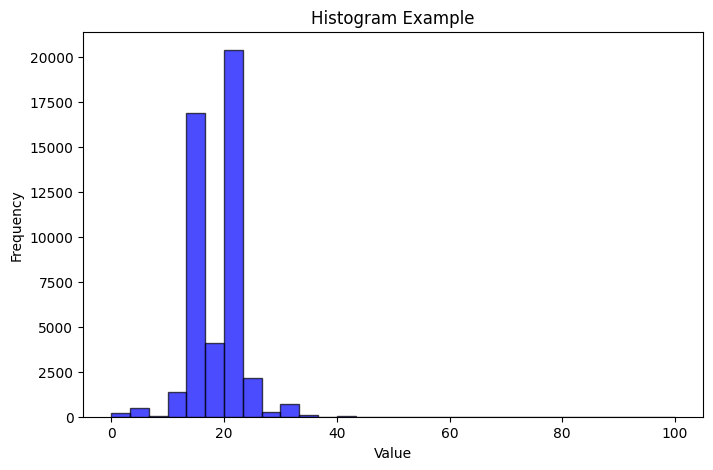

In [164]:
plt.figure(figsize=(8, 5))
plt.hist(housing['streetWidth'], bins=30, color='blue', edgecolor='black', alpha=0.7)

plt.title("Histogram Example")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

In [165]:
print(housing['streetWidth'].value_counts().sort_index())

streetWidth
0.0        190
1.0         21
2.0          3
4.0          5
5.0        491
6.0          4
8.0          8
9.0          9
10.0       589
11.0        32
12.0       680
13.0        79
14.0       378
15.0     15392
16.0      1122
17.0       588
18.0      2956
19.0       579
20.0     19160
21.0       908
22.0       216
23.0        91
24.0       107
25.0      1948
26.0        86
27.0        31
28.0       222
29.0        29
30.0       635
31.0        36
32.0        14
33.0         6
34.0         5
35.0        57
36.0        34
37.0         2
38.0         3
39.0         5
40.0        51
41.0         4
42.0         1
43.0         5
44.0         2
45.0         8
50.0         5
51.0         1
56.0         2
60.0        10
61.0         1
62.0         1
64.0         1
70.0         1
72.0         2
96.0         2
97.0         1
100.0        7
Name: count, dtype: int64


In [166]:
housing[housing['streetWidth'] > 40]

front  rooms lounges bathrooms  streetWidth  stairs  \
125      ثلاث شوارع      5       5        5+         61.0       0   
1579          شرقية      3       2         2         43.0       0   
4351         شمالية      3       2         3         45.0       0   
4931         شمالية      1       3        5+        100.0       1   
5657         شمالية      2       2         2         41.0       0   
6185         شمالية      1       3        5+        100.0       1   
7499   شمالية غربية      5       2        5+         50.0       0   
7538         شمالية      3       1         2         43.0       0   
8306   جنوبية شرقية      4       2         3         60.0       0   
9123         شمالية      5       5        5+         97.0       0   
10961         شرقية      1       1         3         41.0       0   
12262         شرقية      2       2         3         56.0       0   
16322        شمالية      3       2         3         45.0       0   
18727  شمالية شرقية      4       4        5+         60.0       1   
20791    أربع شوارع      5       4        5+         41.0       1   
21366         غربية      5       2        5+         45.0       1   
22204         شرقية      5       4        5+         45.0       1   
22210        شمالية      5       2        5+         50.0       0   
22361        جنوبية      5       2        5+         60.0       1   
22924        جنوبية      3       3         3         62.0       0   
24222         غربية      7       1         3         60.0       0   
25329  شمالية شرقية      5       1         2         72.0       1   
25343         شرقية      7       4        5+         96.0       0   
25565        شمالية      7       5        5+        100.0       0   
25738         شرقية      3       2         2         44.0       0   
25802  شمالية شرقية      5       1         2         72.0       1   
25823         شرقية      7       4        5+         96.0       0   
25896         شرقية      3       2         2         44.0       0   
26452        شمالية      4       2         3         64.0       1   
26486         شرقية      1       2        5+         56.0       1   
30020         شرقية      1       1         3         41.0       0   
31140  شمالية شرقية      4       4        5+         60.0       1   
31482    ثلاث شوارع      5       5        5+         60.0       1   
33129         غربية      7       5        5+         45.0       1   
37244        شمالية      5       2        5+        100.0       1   
38301         غربية      5       3         3        100.0       0   
38586        شمالية      5       2        5+        100.0       1   
41119        جنوبية      3       2         4         43.0       1   
42200        جنوبية      3       2         4         43.0       1   
42209        شمالية      3       1         2         43.0       0   
42290         شرقية      3       2         2         42.0       0   
43134         شرقية      5       2        5+         45.0       1   
43372         غربية      5       2        5+         50.0       1   
43765    ثلاث شوارع      5       5        5+         60.0       1   
43804  شمالية شرقية      4       1        5+         50.0       1   
43895        شمالية      3       2         3         45.0       0   
45106  شمالية شرقية      4       4        5+         60.0       1   
47438  شمالية شرقية      5       1         2         60.0       0   
48058         شرقية      2       0         1         45.0       0   
48750        شمالية      1       3        5+        100.0       1   
48978         غربية      5       3        5+         70.0       1   
49540        شمالية      3       1         3         50.0       0   
50502  جنوبية غربية      3       2         2         51.0       0   
50627  شمالية شرقية      5       1         2         60.0       0   

       propertyAge  driverRoom  tent  patio  ...  apartments  maidRoom  \
125             15           1     1      1  ...           0         1   
1579             0           1     0      0  ...           1         1

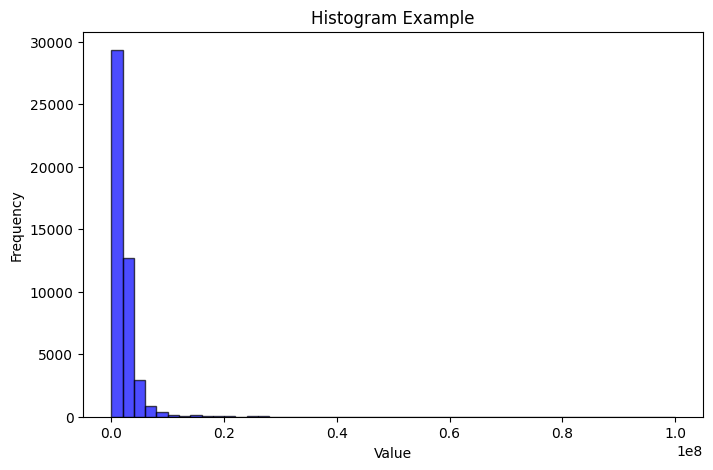

In [167]:
plt.figure(figsize=(8, 5))
plt.hist(housing['price'], bins=50, color='blue', edgecolor='black', alpha=0.7)

plt.title("Histogram Example")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

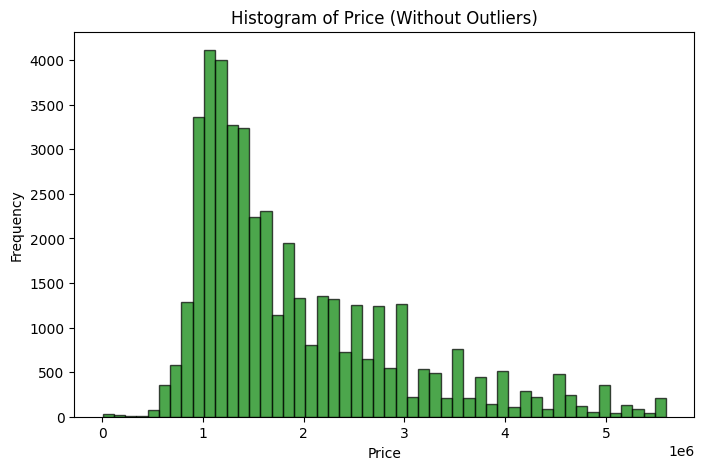

In [168]:
filtered_data = housing[housing['price'] < housing['price'].quantile(0.95)]  # الاحتفاظ بأول 95% فقط
plt.figure(figsize=(8,5))
plt.hist(filtered_data['price'], bins=50, color='green', edgecolor='black', alpha=0.7)
plt.title("Histogram of Price (Without Outliers)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

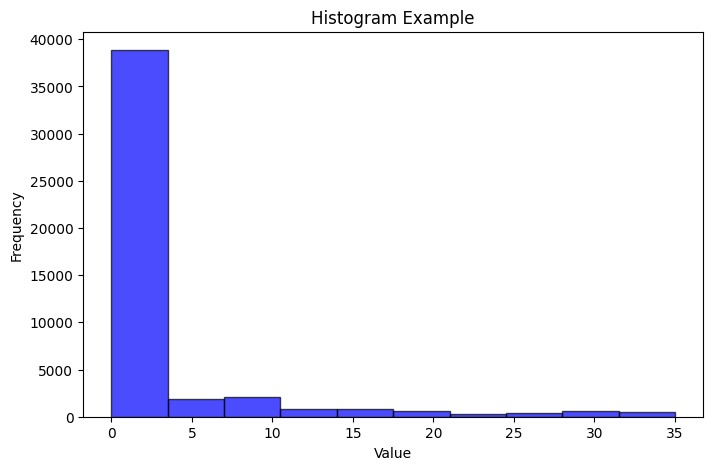

In [169]:
plt.figure(figsize=(8, 5))
plt.hist(housing['propertyAge'], bins=10, color='blue', edgecolor='black', alpha=0.7)

plt.title("Histogram Example")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

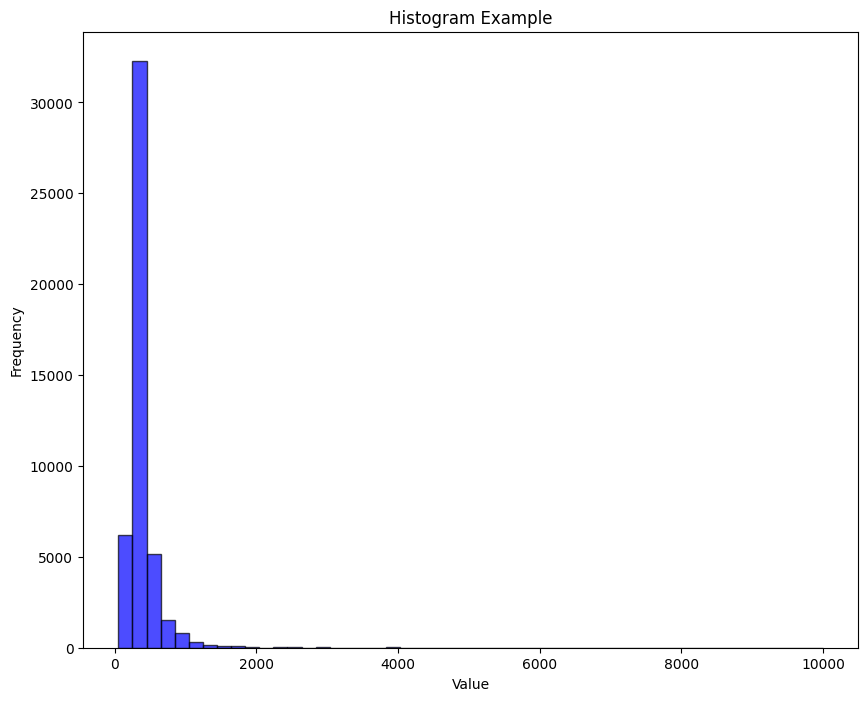

In [170]:

plt.figure(figsize=(10, 8))
plt.hist(housing['space'], bins=50, color='blue', edgecolor='black', alpha=0.7)

plt.title("Histogram Example")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

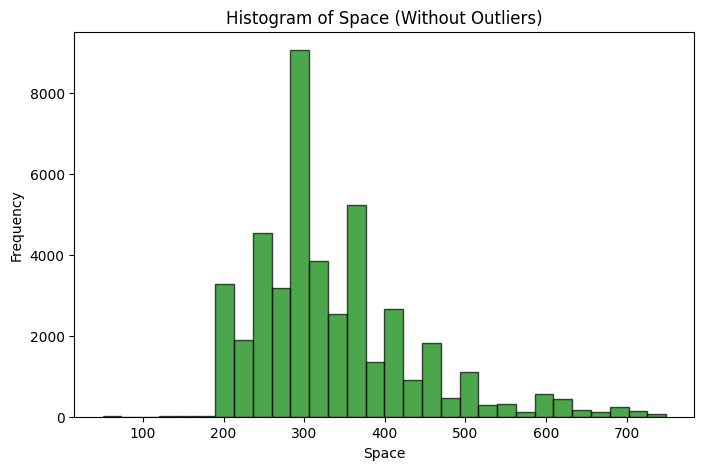

In [171]:
filtered_space = housing[housing['space'] < housing['space'].quantile(0.95)]  # الاحتفاظ بـ 95% من القيم فقط
plt.figure(figsize=(8,5))
plt.hist(filtered_space['space'], bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title("Histogram of Space (Without Outliers)")
plt.xlabel("Space")
plt.ylabel("Frequency")
plt.show()

##### **2-Apartments in Riyadh Saudi Arabia**

In [172]:
# check columns types
realEstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 1 to 6762
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               6762 non-null   int64  
 1   title            6762 non-null   object 
 2   price            6762 non-null   int64  
 3   content          6762 non-null   object 
 4   refresh          6762 non-null   object 
 5   beds             6762 non-null   int64  
 6   livings          6762 non-null   int64  
 7   wc               6762 non-null   int64  
 8   area             6762 non-null   float64
 9   street_width     6762 non-null   int64  
 10  age              6762 non-null   int64  
 11  last_update      6762 non-null   object 
 12  ketchen          6762 non-null   bool   
 13  ac               6762 non-null   bool   
 14  furnished        6762 non-null   bool   
 15  location         6762 non-null   object 
 16  path             6762 non-null   object 
 17  district      

In [173]:
realEstate['livings'].unique()

array([0, 1, 2, 3, 4, 5])

In [174]:
realEstate['street_width'].unique()

array([ 15,  30,  25,  34,  39,  35,   0,  18,  27,  29,  20,   5,  21,
        65,  36,  37,  24,   1,  33,  40, 100,  12,  38,  81,  28,  22,
        60,  45,  31,  32,  11,  16,  19,  70,  74,  26,  23,  50,  14,
        17,  57,  56,  10,  73,  44,  49,  76,  80,  59,  51,  63,  53,
        61,  13,  47,   9,  52,  42,  43,  75,  55,   8,  46,  48,  41,
        68,   7,  58,  62,  64,  71,  90,  54,   6,  69,  66,  93,  82,
        77,  79,  87])

In [175]:
realEstate['age'].unique()

array([ 9, 12, -1,  0,  3,  1,  5,  2, 35, 15,  7, 17,  4,  8, 10,  6, 21,
       11, 13, 16, 20, 36, 25, 14, 26, 30, 19, 34, 22, 18, 29, 24, 23, 27,
       28, 32, 33])

In [176]:
realEstate['ketchen'].unique()

array([ True, False])

In [177]:
realEstate['ac'].unique()

array([False,  True])

In [178]:
realEstate['furnished'].unique()

array([False,  True])

We change the data type for these columns `apartments`, `bathrooms`, and `lounges` to int data type.

In [179]:
# go to clean them

In [180]:
# check outliers

##### **3-Riyadh Aqaar Dataset**

###### Land:

In [181]:
# check columns types

All the columns have the correct data types EXCEPT `السعر الإجمالي` it should be float.

In [182]:
# go to clean them

In [ ]:
# check outliers

In [183]:
# تصفية العقارات التي مساحتها تساوي 1 متر مربع
df_one_meter = df_land[df_land['المساحة'] == 1]

# عرض عدد العقارات بمساحة 1 متر مربع
print(f"عدد العقارات التي مساحتها 1 متر مربع: {df_one_meter.shape[0]}")

# عرض أول 5 صفوف منها
display(df_one_meter.head())


عدد العقارات التي مساحتها 1 متر مربع: 0


Empty DataFrame
Columns: [نوع العقار, الغرض, المدينة, الحي, الواجهة, المساحة, سعر المتر, السعر الاجمالي, السعر المربع]
Index: []

In [ ]:
# go to drop these two rows

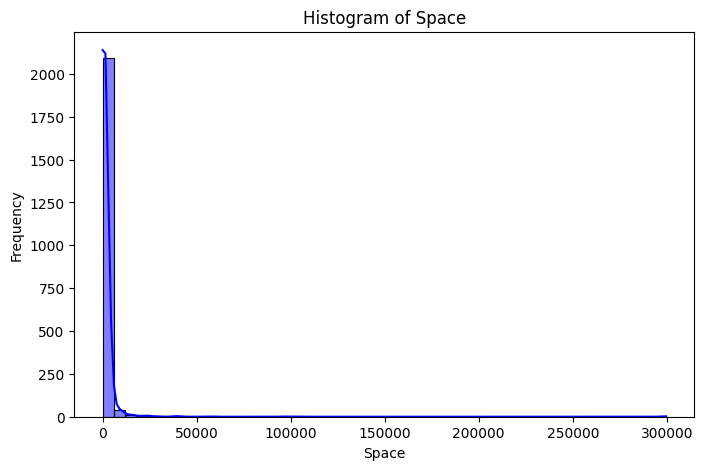

In [184]:

# ضبط حجم المخطط
plt.figure(figsize=(8, 5))

# رسم Histogram لتوزيع القيم
sns.histplot(df_land['المساحة'], bins=50, kde=True, color='blue')

# إضافة العنوان والتسميات
plt.title('Histogram of Space')
plt.xlabel('Space')
plt.ylabel('Frequency')

# عرض المخطط
plt.show()


In [185]:
df_land.describe()

المساحة      سعر المتر  السعر الاجمالي   السعر المربع
count    2153.000000    2153.000000    2.153000e+03    2153.000000
mean     1570.236879    4359.395113    5.054961e+06    4359.395113
std      9762.413195   35231.054191    3.143221e+07   35231.054191
min        36.000000      90.000000    9.360000e+04      90.000000
25%       414.000000    1360.000000    7.875000e+05    1360.000000
50%       671.000000    2570.000000    1.442000e+06    2570.000000
75%       900.000000    4000.000000    3.150000e+06    4000.000000
max    299684.000000  945000.000000    8.930250e+08  945000.000000

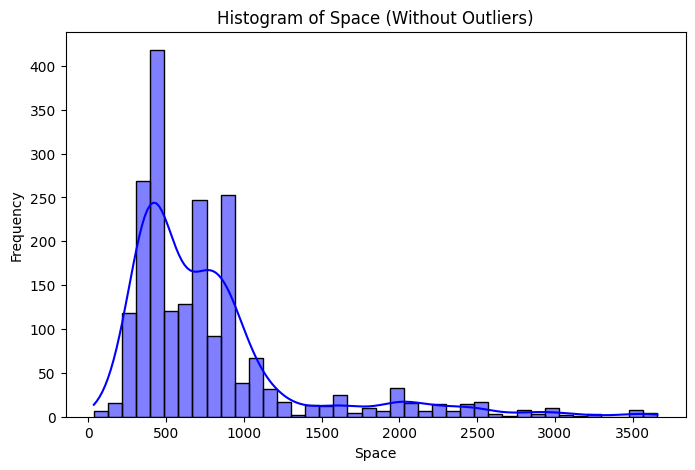

In [186]:
# ضبط حجم المخطط
plt.figure(figsize=(8, 5))

# رسم الهيستوغرام مع تحديد نطاق البيانات لتجنب القيم المتطرفة
sns.histplot(df_land[df_land['المساحة'] < df_land['المساحة'].quantile(0.95)]['المساحة'],
             bins=40, kde=True, color='blue')

# إضافة العنوان والتسميات
plt.title('Histogram of Space (Without Outliers)')
plt.xlabel('Space')
plt.ylabel('Frequency')

# عرض المخطط
plt.show()


In [187]:
df_land

نوع العقار        الغرض المدينة                   الحي       الواجهة  \
0           أرض     غير محدد  الرياض                الرياض          غربية   
1           أرض     غير محدد  الرياض             حي غرناطة         شمالية   
2           أرض         سكني  الرياض             حي غرناطة     ثلاث شوارع   
3           أرض         سكني  الرياض            حي اليرموك     ثلاث شوارع   
4           أرض         سكني  الرياض      حي النسيم الغربي          غربية   
...         ...          ...     ...                    ...           ...   
2150        أرض        تجاري  الرياض                الرياض         جنوبية   
2151        أرض         سكني  الرياض   حي العريجاء الغربية         جنوبية   
2152        أرض  تجاري وسكني  الرياض           حي ظهرة لبن   جنوبية غربية   
2153        أرض  تجاري وسكني  الرياض    حي العريجاء الغربي          غربية   
2154        أرض         سكني  الرياض    حي العريجاء الغربي         جنوبية   

      المساحة  سعر المتر  السعر الاجمالي  السعر المربع  
0         375     2900.0       1087500.0        2900.0  
1         800     4800.0       3840000.0        4800.0  
2        1650     4800.0       7920000.0        4800.0  
3        1650     4800.0       7920000.0        4800.0  
4         750     3200.0       2400000.0        3200.0  
...       ...        ...             ...           ...  
2150     2000     3500.0       7000000.0        3500.0  
2151      400     1500.0        600000.0        1500.0  
2152     1050     2380.0       2499000.0        2380.0  
2153      313     2000.0        626000.0        2000.0  
2154      472     1695.0        800040.0        1695.0  

[2153 rows x 9 columns]

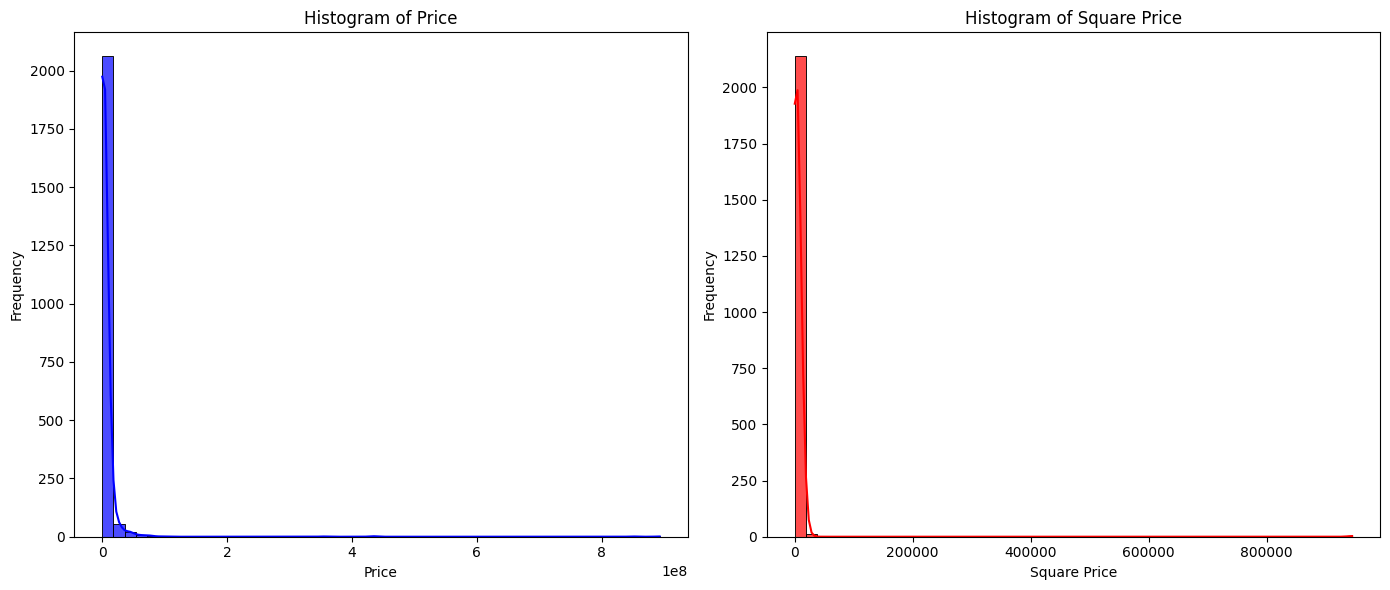

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

# إنشاء شكل مع محورين فرعيين (صف واحد وعمودين)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# رسم Histogram للسعر (Price)
sns.histplot(df_land['السعر الاجمالي'], bins=50, color='blue', alpha=0.7, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# رسم Histogram لسعر المتر المربع (Square Price)
sns.histplot(df_land['السعر المربع'], bins=50, color='red', alpha=0.7, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Square Price')
axes[1].set_xlabel('Square Price')
axes[1].set_ylabel('Frequency')

# ضبط التباعد بين المخططات
plt.tight_layout()

# عرض المخططات
plt.show()


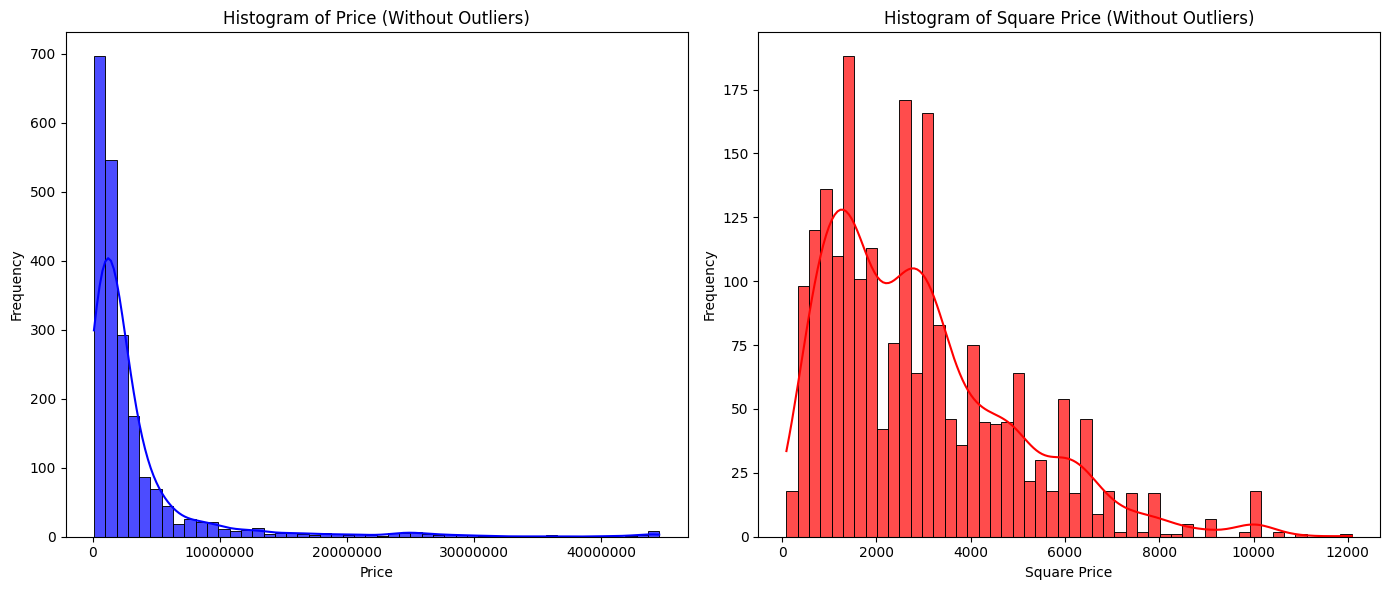

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

# تحديد الحد الأقصى بناءً على الـ 99th quantile
price_q99 = df_land['السعر الاجمالي'].quantile(0.99)
square_price_q99 = df_land['السعر المربع'].quantile(0.99)

# تصفية البيانات لإزالة القيم الشاذة
filtered_price = df_land[df_land['السعر الاجمالي'] <= price_q99]['السعر الاجمالي']
filtered_square_price = df_land[df_land['السعر المربع'] <= square_price_q99]['السعر المربع']

# إنشاء شكل مع محورين فرعيين (صف واحد وعمودين)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# رسم Histogram للسعر (Price) بعد إزالة القيم الشاذة
sns.histplot(filtered_price, bins=50, color='blue', alpha=0.7, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Price (Without Outliers)')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].ticklabel_format(style='plain', axis='x')  # ✅ إضافة هذا السطر

# رسم Histogram لسعر المتر المربع (Square Price) بعد إزالة القيم الشاذة
sns.histplot(filtered_square_price, bins=50, color='red', alpha=0.7, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Square Price (Without Outliers)')
axes[1].set_xlabel('Square Price')
axes[1].set_ylabel('Frequency')
axes[1].ticklabel_format(style='plain', axis='x')  # ✅ إضافة هذا السطر

# ضبط التباعد بين المخططات
plt.tight_layout()

# عرض المخططات
plt.show()


###### Villas:


In [ ]:
# check columns types

All the columns have the correct data types EXCEPT `عدد الغرف`, `عدد الصالات` and `عدد الحمامات`.

In [ ]:
# go to clean them

In [ ]:
# check outliers

In [192]:
df_villas.describe()

عدد الغرف  عدد الصالات  عدد الحمامات   عرض الشارع       المساحة  \
count  1059.000000  1059.000000   1059.000000  1059.000000   1059.000000   
mean      5.035883     2.270066      4.424929     7.570349    473.115203   
std       1.775339     1.203634      1.300277     9.120362   1399.036553   
min       0.000000     0.000000      0.000000     0.000000     25.000000   
25%       4.000000     2.000000      5.000000     0.000000    275.000000   
50%       5.000000     2.000000      5.000000     0.000000    338.000000   
75%       7.000000     3.000000      5.000000    15.000000    450.000000   
max       7.000000     7.000000      5.000000    40.000000  32020.000000   

          درج صالة         مطبخ   غرفة خادمة    غرفة سائق         ملحق  \
count  1059.000000  1059.000000  1059.000000  1059.000000  1059.000000   
mean      0.721435     0.819641     0.717658     0.371105     0.560907   
std       0.448505     0.384668     0.450351     0.483329     0.496511   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     0.000000     0.000000     0.000000   
50%       1.000000     1.000000     1.000000     0.000000     1.000000   
75%       1.000000     1.000000     1.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               حوش         مسبح          قبو   مدخل سيارة         مصعد  \
count  1059.000000  1059.000000  1059.000000  1059.000000  1059.000000   
mean      0.736544     0.084986     0.035883     0.804533     0.278565   
std       0.440716     0.278992     0.186086     0.396747     0.448505   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     1.000000     0.000000   
50%       1.000000     0.000000     0.000000     1.000000     0.000000   
75%       1.000000     0.000000     0.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       السعر الاجمالي  السعر المربع  
count    1.059000e+03   1059.000000  
mean     2.623417e+06   6577.061809  
std      2.068425e+06   2964.188439  
min      3.000000e+05     47.782636  
25%      1.500000e+06   4596.100279  
50%      2.150000e+06   6000.000000  
75%      3.000000e+06   8143.939394  
max      2.250000e+07  35200.000000

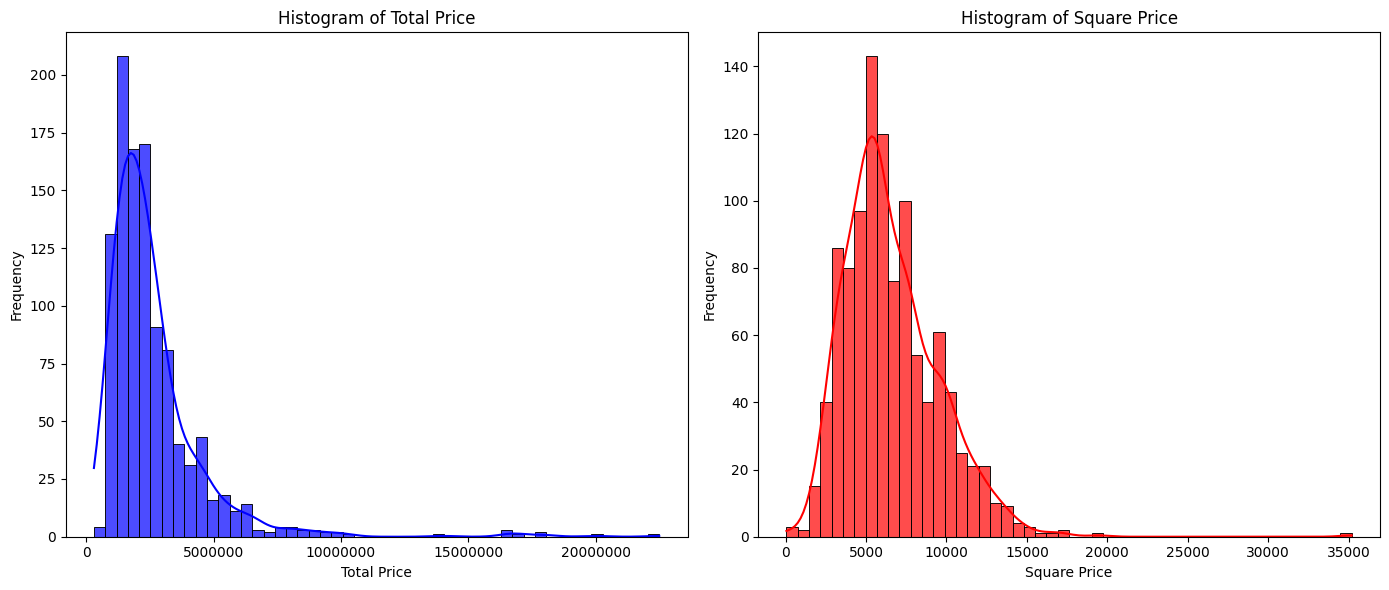

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

# إنشاء شكل مع محورين فرعيين
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# رسم Histogram للسعر الإجمالي
sns.histplot(df_villas['السعر الاجمالي'], bins=50, color='blue', alpha=0.7, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Total Price')
axes[0].set_xlabel('Total Price')
axes[0].set_ylabel('Frequency')
axes[0].ticklabel_format(style='plain', axis='x')  # تعطيل الصيغة العلمية

# رسم Histogram للسعر المربع
sns.histplot(df_villas['السعر المربع'], bins=50, color='red', alpha=0.7, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Square Price')
axes[1].set_xlabel('Square Price')
axes[1].set_ylabel('Frequency')
axes[1].ticklabel_format(style='plain', axis='x')  # تعطيل الصيغة العلمية

# ضبط التباعد بين المخططات
plt.tight_layout()

# عرض المخططات
plt.show()


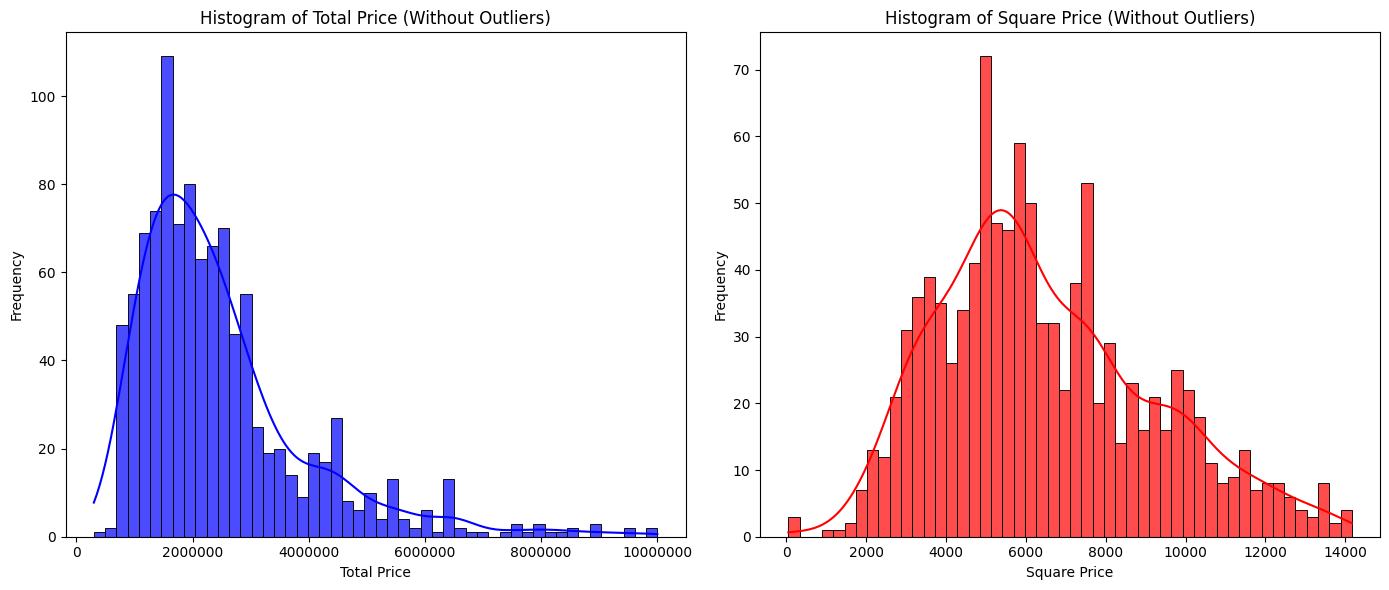

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

# تحديد الحد الأعلى بناءً على الـ 99th quantile
total_price_q99 = df_villas['السعر الاجمالي'].quantile(0.99)
square_price_q99 = df_villas['السعر المربع'].quantile(0.99)

# تصفية البيانات لإزالة القيم الشاذة
filtered_total_price = df_villas[df_villas['السعر الاجمالي'] <= total_price_q99]['السعر الاجمالي']
filtered_square_price = df_villas[df_villas['السعر المربع'] <= square_price_q99]['السعر المربع']

# إنشاء شكل مع محورين فرعيين
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# رسم Histogram للسعر الإجمالي بعد إزالة القيم الشاذة
sns.histplot(filtered_total_price, bins=50, color='blue', alpha=0.7, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Total Price (Without Outliers)')
axes[0].set_xlabel('Total Price')
axes[0].set_ylabel('Frequency')
axes[0].ticklabel_format(style='plain', axis='x')  # تعطيل الصيغة العلمية

# رسم Histogram للسعر المربع بعد إزالة القيم الشاذة
sns.histplot(filtered_square_price, bins=50, color='red', alpha=0.7, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Square Price (Without Outliers)')
axes[1].set_xlabel('Square Price')
axes[1].set_ylabel('Frequency')
axes[1].ticklabel_format(style='plain', axis='x')  # تعطيل الصيغة العلمية

# ضبط التباعد بين المخططات
plt.tight_layout()

# عرض المخططات
plt.show()


###### Apartments:

In [195]:
# check columns types
df_apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   نوع العقار      551 non-null    object 
 1   المدينة         551 non-null    object 
 2   الحي            551 non-null    object 
 3   الواجهة         389 non-null    object 
 4   عدد الغرف       551 non-null    int64  
 5   عدد الصالات     541 non-null    float64
 6   عدد الحمامات    551 non-null    object 
 7   المساحة         551 non-null    int64  
 8   مطبخ            551 non-null    int64  
 9   مدخل سيارة      551 non-null    int64  
 10  مصعد            551 non-null    int64  
 11  الدور           477 non-null    object 
 12  عمر العقار      550 non-null    float64
 13  مؤثثة           551 non-null    int64  
 14  السعر الاجمالي  551 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 64.7+ KB


In [196]:
df_apartments.head(3)

نوع العقار   المدينة         الحي       الواجهة  عدد الغرف  عدد الصالات  \
0        شقة   الرياض    حي المروج         جنوبية          4          1.0   
1        شقة   الرياض    حي العارض   شمالية غربية          3          1.0   
2        شقة   الرياض    حي النرجس            NaN          3          1.0   

  عدد الحمامات  المساحة  مطبخ  مدخل سيارة  مصعد الدور  عمر العقار  مؤثثة  \
0            3      249     1           0     1     3         0.0      0   
1            3      199     0           0     1  علوي         0.0      0   
2            3      145     1           0     1  أرضي         2.0      0   

   السعر الاجمالي  
0         1434000  
1          980000  
2         1050000

In [197]:
df_apartments['عدد الصالات'].unique()

array([ 1.,  2., nan,  3.])

In [198]:
df_apartments['عدد الحمامات'].unique()

array([3, 2, 4, '5+', 1], dtype=object)

In [199]:
df_apartments['مطبخ'].unique()

array([1, 0])

In [200]:
df_apartments['مدخل سيارة'].unique()

array([0, 1])

In [201]:
df_apartments['مصعد'].unique()

array([1, 0])

In [202]:
df_apartments['مطبخ'].unique()

array([1, 0])

In [203]:
df_apartments['عمر العقار'].unique()

array([ 0.,  2., nan, 11.,  1.,  7.,  3., 10.,  9.,  5.,  4., 13.,  8.,
       12.,  6.])

We change the data type for these columns `apartments`, `bathrooms`, and `lounges` to int data type.

In [204]:
df_apartments["مؤثثة"].unique()

array([0, 1])

In [ ]:
# go to clean them
# Done

In [ ]:
# check outliers

**What is an Outlier?**
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR

![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [ ]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [ ]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics

In [ ]:
# go to delete ouliers

## 2. Data Cleaning:

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



**1- Handling missing values:**

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


**2- Correcting errors**

--------------------

**3- Dealing with outliers:**



**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


--------------------

##### **1-Riyadh Housing Data**

In [ ]:
# go back to 6th dimention --> Completeness

In [103]:
housing.fillna({'lounges': 0}, inplace=True)

In [104]:
housing[housing['lounges'].isnull()]

Empty DataFrame
Columns: [front, rooms, lounges, bathrooms, streetWidth, stairs, propertyAge, driverRoom, tent, patio, kitchen, outdoorRoom, garage, duplex, space, apartments, maidRoom, elevator, furnihsed, pool, basement, neighbourhood, location, price, square price]
Index: []

[0 rows x 25 columns]

In [105]:
housing[housing['lounges'] == 0]

front  rooms lounges bathrooms  streetWidth  stairs  \
88            غربية      5       0         4         20.0       0   
109    جنوبية شرقية      4       0         4         35.0       0   
135           شرقية      4       0         3         20.0       1   
142          شمالية      4       0         2         15.0       0   
145           شرقية      4       0         3         20.0       1   
...             ...    ...     ...       ...          ...     ...   
51588        جنوبية      5       0        5+         15.0       0   
51675  شمالية شرقية      7       0        5+         20.0       0   
51764         شرقية      4       0        5+         40.0       0   
51833        جنوبية      4       0         3         15.0       0   
51843  جنوبية غربية      1       0         1         15.0       0   

       propertyAge  driverRoom  tent  patio  ...  apartments  maidRoom  \
88               2           0     0      0  ...           0         0   
109             35           0     0      0  ...           4         0   
135              0           0     0      0  ...           0         0   
142              0           0     0      0  ...           0         0   
145              0           0     0      0  ...           0         0   
...            ...         ...   ...    ...  ...         ...       ...   
51588            0           0     1      1  ...           0         0   
51675            0           0     0      0  ...           0         0   
51764            0           0     0      0  ...           0         0   
51833            6           1     0      0  ...           1         1   
51843            0           0     0      0  ...           2         0   

       elevator  furnihsed  pool basement    neighbourhood     location  \
88            0          0     0        0            طويق    غرب الرياض   
109           0          0     0        0   النسيم الغربي    شرق الرياض   
135           0          0     0        0            طيبة   جنوب الرياض   
142           0          0     0        0             بدر   جنوب الرياض   
145           0          0     0        0            طيبة   جنوب الرياض   
...         ...        ...   ...      ...              ...          ...   
51588         0          0     0        0        العزيزية   جنوب الرياض   
51675         0          0     0        0            طيبة   جنوب الرياض   
51764         0          0     0        0          النهضة    شرق الرياض   
51833         0          0     0        0        الياسمين   شمال الرياض   
51843         0          0     0        0          النهضة    شرق الرياض   

           price  square price  
88     1000000.0   3968.253968  
109    1150000.0   1840.000000  
135     850000.0   3571.428571  
142     850000.0   3400.000000  
145     850000.0   3571.428571  
...          ...           ...  
51588   850000.0   3400.000000  
51675   910000.0   3250.000000  
51764  2574000.0   3300.000000  
51833  3000000.0   7692.307692  
51843  2300000.0   5679.012346  

[1118 rows x 25 columns]

In [106]:
housing.fillna({'streetWidth': 0}, inplace=True)

In [107]:
housing[housing['streetWidth'].isnull()]

Empty DataFrame
Columns: [front, rooms, lounges, bathrooms, streetWidth, stairs, propertyAge, driverRoom, tent, patio, kitchen, outdoorRoom, garage, duplex, space, apartments, maidRoom, elevator, furnihsed, pool, basement, neighbourhood, location, price, square price]
Index: []

[0 rows x 25 columns]

In [108]:
housing[housing['streetWidth'] == 0.0]

front  rooms lounges bathrooms  streetWidth  stairs  propertyAge  \
701    ثلاث شوارع      7       3        5+          0.0       1            0   
820    ثلاث شوارع      7       4        5+          0.0       0           20   
1143   ثلاث شوارع      7       3        5+          0.0       1            0   
1198   ثلاث شوارع      5       2        5+          0.0       1            0   
1254   أربع شوارع      7       2        5+          0.0       1            0   
...           ...    ...     ...       ...          ...     ...          ...   
51078      شمالية      6       2        5+          0.0       1           17   
51121  ثلاث شوارع      7       2        5+          0.0       0            0   
51162  ثلاث شوارع      6       2         4          0.0       1            0   
51272  ثلاث شوارع      7       4        5+          0.0       1           30   
51276  ثلاث شوارع      4       2         4          0.0       0           27   

       driverRoom  tent  patio  ...  apartments  maidRoom  elevator  \
701             0     0      1  ...           0         0         0   
820             1     1      0  ...           4         1         0   
1143            0     0      1  ...           0         0         0   
1198            1     0      1  ...           0         1         0   
1254            0     1      1  ...           0         0         0   
...           ...   ...    ...  ...         ...       ...       ...   
51078           1     1      1  ...           2         1         0   
51121           1     1      1  ...           0         1         0   
51162           1     0      1  ...           0         1         0   
51272           1     1      1  ...           0         1         0   
51276           1     0      1  ...           0         1         0   

       furnihsed  pool basement  neighbourhood     location       price  \
701            0     0        0        المعذر    غرب الرياض  40000000.0   
820            1     0        0       الحمراء    شرق الرياض  11000000.0   
1143           0     0        0        المعذر    غرب الرياض  40000000.0   
1198           0     0        0        العليا   شمال الرياض   3310000.0   
1254           0     0        0          عكاظ   جنوب الرياض   1060000.0   
...          ...   ...      ...            ...          ...         ...   
51078          1     1        0       اشبيلية    شرق الرياض   7500000.0   
51121          1     0        0       الفيحاء    شرق الرياض   3400000.0   
51162          0     0        0       الصحافة   شمال الرياض   3250000.0   
51272          1     0        1       السويدي    غرب الرياض   2000000.0   
51276          0     0        0       الجزيرة    شرق الرياض   1400000.0   

       square price  
701     4661.461368  
820     6875.000000  
1143    4661.461368  
1198    5000.000000  
1254    2944.444444  
...             ...  
51078   6063.055780  
51121   2518.518519  
51162  10833.333330  
51272   1563.721658  
51276   2892.561983  

[190 rows x 25 columns]

In [109]:
housing['price'].fillna(housing['price'].median(), inplace=True)

<ipython-input-109-d03d442fc215>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing['price'].fillna(housing['price'].median(), inplace=True)


In [110]:
missing_square_price = housing['square price'].isna()
housing.loc[missing_square_price, 'square price'] = housing['price'] / housing['space']

In [111]:
housing[housing['price'].isnull()]

Empty DataFrame
Columns: [front, rooms, lounges, bathrooms, streetWidth, stairs, propertyAge, driverRoom, tent, patio, kitchen, outdoorRoom, garage, duplex, space, apartments, maidRoom, elevator, furnihsed, pool, basement, neighbourhood, location, price, square price]
Index: []

[0 rows x 25 columns]

In [112]:
housing.columns

Index(['front', 'rooms', 'lounges', 'bathrooms', 'streetWidth', 'stairs',
       'propertyAge', 'driverRoom', 'tent', 'patio', 'kitchen', 'outdoorRoom',
       'garage', 'duplex', 'space', 'apartments', 'maidRoom', 'elevator',
       'furnihsed', 'pool', 'basement', 'neighbourhood', 'location', 'price',
       'square price'],
      dtype='object')

In [ ]:
# go back to 7th dimension Accuracy

In [205]:
# 7 means 7+
housing['lounges'] = housing['lounges'].apply(lambda x: 7 if x == "7+" else int(x))
housing.dtypes

front             object
rooms              int64
lounges            int64
bathrooms         object
streetWidth      float64
stairs             int64
propertyAge        int64
driverRoom         int64
tent               int64
patio              int64
kitchen            int64
outdoorRoom        int64
garage             int64
duplex             int64
space              int64
apartments        object
maidRoom           int64
elevator           int64
furnihsed          int64
pool               int64
basement           int64
neighbourhood     object
location          object
price            float64
square price     float64
dtype: object

In [206]:
housing['lounges'].value_counts()

lounges
2    19719
3    12992
1     7996
4     2832
5     2156
0     1118
7       13
Name: count, dtype: int64

In [207]:
# 5 means 5+
housing['bathrooms'] = housing['bathrooms'].apply(lambda x: 5 if x == "5+" else int(x))
housing.dtypes

front             object
rooms              int64
lounges            int64
bathrooms          int64
streetWidth      float64
stairs             int64
propertyAge        int64
driverRoom         int64
tent               int64
patio              int64
kitchen            int64
outdoorRoom        int64
garage             int64
duplex             int64
space              int64
apartments        object
maidRoom           int64
elevator           int64
furnihsed          int64
pool               int64
basement           int64
neighbourhood     object
location          object
price            float64
square price     float64
dtype: object

In [208]:
housing['bathrooms'].value_counts()

bathrooms
5    32371
4     8781
3     4123
2     1227
1      324
Name: count, dtype: int64

In [209]:
# 30 means 30+
housing['apartments'] = housing['apartments'].apply(lambda x: 30 if x == "30+" else int(x))
housing.dtypes

front             object
rooms              int64
lounges            int64
bathrooms          int64
streetWidth      float64
stairs             int64
propertyAge        int64
driverRoom         int64
tent               int64
patio              int64
kitchen            int64
outdoorRoom        int64
garage             int64
duplex             int64
space              int64
apartments         int64
maidRoom           int64
elevator           int64
furnihsed          int64
pool               int64
basement           int64
neighbourhood     object
location          object
price            float64
square price     float64
dtype: object

In [210]:
print(housing['apartments'].dtype)  # نوع البيانات
print(housing['apartments'].unique())  # القيم الفريدة
print(housing['apartments'].value_counts())  # توزيع القيم

int64
[ 0  2  3  1  4  7  6 30  5  8 12 11  9 15 16 13 23 10 14 20]
apartments
0     26809
1      9373
2      8435
3      1703
4       411
5        29
6        12
8         9
7         7
10        7
12        6
15        5
11        4
30        4
13        3
14        3
23        2
20        2
9         1
16        1
Name: count, dtype: int64


Renaming the housing dataset



In [211]:
housing_arabic = {
    "front": "الواجهة",
    "rooms": "عدد الغرف",
    "lounges": "عدد الصالات",
    "bathrooms": "عدد الحمامات",
    "streetWidth": "عرض الشارع",
    "stairs": "درج صالة",
    "propertyAge": "عمر العقار",
    "driverRoom": "غرفة سائق",
    "tent": "ملحق",
    "patio": "حوش",
    "kitchen": "مطبخ",
    "outdoorRoom": "غرفة خارجية",
    "garage": "مدخل سيارة",
    "duplex": "دوبلكس",
    "space": "المساحة",
    "apartments": "عدد الشقق",
    "maidRoom": "غرفة خادمة",
    "elevator": "مصعد",
    "furnihsed": "مؤثثة",
    "pool": "مسبح",
    "basement": "قبو",
    "neighbourhood": "الحي",
    "location": "المدينة",
    "price": "السعر الاجمالي",
    "square price": "سعر المتر"
}

housing.rename(columns=housing_arabic, inplace=True)
print(housing.columns)


Index(['الواجهة', 'عدد الغرف', 'عدد الصالات', 'عدد الحمامات', 'عرض الشارع',
       'درج صالة', 'عمر العقار', 'غرفة سائق', 'ملحق', 'حوش', 'مطبخ',
       'غرفة خارجية', 'مدخل سيارة', 'دوبلكس', 'المساحة', 'عدد الشقق',
       'غرفة خادمة', 'مصعد', 'مؤثثة', 'مسبح', 'قبو', 'الحي', 'المدينة',
       'السعر الاجمالي', 'سعر المتر'],
      dtype='object')


##### **2-Apartments in Riyadh Saudi Arabia**

**Clean the User_Id index**

In [77]:
duplicate_indices = realEstate.index.duplicated()

if duplicate_indices.any():
    print("هناك فهارس مكررة:")
    print(realEstate.index[duplicate_indices])
else:
    print("لا توجد فهارس مكررة.")

هناك فهارس مكررة:
Index([ 120924, 1958104, 1732110, 2194407,  109604, 2632732,  104193, 1958104,
       1732110, 2447166,
       ...
       2632732, 2220912, 1958104, 2440803, 2441326,  381190, 1958104,  395654,
        120924, 2110604],
      dtype='int64', name='user_id', length=4985)


In [78]:
realEstate['user_id'] = realEstate.index

In [79]:
realEstate.reset_index(drop=True, inplace=True)
realEstate.index = realEstate.index + 1

In [80]:
realEstate.head(2)

id                                              title  price  \
1  4596035  شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...  20000   
2  4599813  شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...  25000   

                                             content  \
1                                        1666 كل شهر   
2  شقة ارضية للإيجار بحي الفيحاء شارع الاقتصاد \r...   

                                                imgs  \
1  ['014958174_1659666836308.jpg', '014958178_165...   
2  ['004966630_1659781493595.jpg', '004966636_165...   

                      refresh  beds  livings  wc   area  ...  length  \
1  ['2022-08-06', '12:22:15']     3      0.0   2  225.0  ...    15.0   
2  ['2022-08-06', '10:27:57']     3      1.0   2  130.0  ...     NaN   

      advertiser_type                 create_time  review  profileImg  \
1               owner  ['2022-08-05', '02:44:23']    5.00         NaN   
2  exclusive_marketer  ['2022-08-06', '10:27:56']    4.33         yes   

                    UserName iam_verified onMarket IsRent  user_id  
1                    Thamer          True       17  False  1495817  
2   الاركان الثابته للعقارات         True        5   True   496663  

[2 rows x 30 columns]

In [81]:
realEstate.columns

Index(['id', 'title', 'price', 'content', 'imgs', 'refresh', 'beds', 'livings',
       'wc', 'area', 'street_width', 'age', 'last_update', 'ketchen', 'ac',
       'furnished', 'location', 'path', 'district', 'width', 'length',
       'advertiser_type', 'create_time', 'review', 'profileImg', 'UserName',
       'iam_verified', 'onMarket', 'IsRent', 'user_id'],
      dtype='object')

**Drop the imgs**

In [130]:
realEstate.drop(['imgs'] , axis = 1 , inplace = True)

**Fill the Null Values**

In [131]:
realEstate.fillna({
    'area': 0, 'length': 0, 'width': 0,
    'content': "لا يوجد نص",
    'livings': 0.0, 'street_width': 0.0, 'age': -1,
    'ketchen': 0.0, 'ac': 0.0, 'furnished': 0.0,
    'advertiser_type': "Unknown", 'review': 0.0,
    'profileImg': "No", 'UserName': "Unknown",
    'iam_verified': "False"
}, inplace=True)

**change the type of livings from "float" to "int"**

In [132]:
# Convert numerical columns to integers
realEstate[['livings', 'street_width', 'age']] = realEstate[['livings', 'street_width', 'age']].astype(int)

# Convert binary columns (0/1) to boolean (False/True)
cols_to_bool = ['ketchen', 'ac', 'furnished', 'iam_verified']
realEstate[cols_to_bool] = realEstate[cols_to_bool].replace({0: False, 1: True}).astype(bool)

<ipython-input-132-2aec9828b160>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  realEstate[cols_to_bool] = realEstate[cols_to_bool].replace({0: False, 1: True}).astype(bool)


##### **3-Riyadh Aqaar Dataset**

###### Land:

In [145]:
df_land["المدينة"] = "الرياض"
df_land

نوع العقار        الغرض المدينة                   الحي       الواجهة  \
0           أرض          NaN  الرياض                الرياض          غربية   
1           أرض          NaN  الرياض             حي غرناطة         شمالية   
2           أرض         سكني  الرياض             حي غرناطة     ثلاث شوارع   
3           أرض         سكني  الرياض            حي اليرموك     ثلاث شوارع   
4           أرض         سكني  الرياض      حي النسيم الغربي          غربية   
...         ...          ...     ...                    ...           ...   
2150        أرض        تجاري  الرياض                الرياض         جنوبية   
2151        أرض         سكني  الرياض   حي العريجاء الغربية         جنوبية   
2152        أرض  تجاري وسكني  الرياض           حي ظهرة لبن   جنوبية غربية   
2153        أرض  تجاري وسكني  الرياض    حي العريجاء الغربي          غربية   
2154        أرض         سكني  الرياض    حي العريجاء الغربي         جنوبية   

      المساحة  سعر المتر  السعر الإجمالي  
0         375     2900.0         1087500  
1         800     4800.0         3840000  
2        1650     4800.0         7920000  
3        1650     4800.0         7920000  
4         750     3200.0         2400000  
...       ...        ...             ...  
2150     2000     3500.0         7000000  
2151      400     1500.0          600000  
2152     1050     2380.0         2499000  
2153      313     2000.0          626000  
2154      472     1695.0          800040  

[2155 rows x 8 columns]

In [146]:
df_land.rename(columns={'السعر الإجمالي': 'السعر الاجمالي'}, inplace=True)
df_land

نوع العقار        الغرض المدينة                   الحي       الواجهة  \
0           أرض          NaN  الرياض                الرياض          غربية   
1           أرض          NaN  الرياض             حي غرناطة         شمالية   
2           أرض         سكني  الرياض             حي غرناطة     ثلاث شوارع   
3           أرض         سكني  الرياض            حي اليرموك     ثلاث شوارع   
4           أرض         سكني  الرياض      حي النسيم الغربي          غربية   
...         ...          ...     ...                    ...           ...   
2150        أرض        تجاري  الرياض                الرياض         جنوبية   
2151        أرض         سكني  الرياض   حي العريجاء الغربية         جنوبية   
2152        أرض  تجاري وسكني  الرياض           حي ظهرة لبن   جنوبية غربية   
2153        أرض  تجاري وسكني  الرياض    حي العريجاء الغربي          غربية   
2154        أرض         سكني  الرياض    حي العريجاء الغربي         جنوبية   

      المساحة  سعر المتر  السعر الاجمالي  
0         375     2900.0         1087500  
1         800     4800.0         3840000  
2        1650     4800.0         7920000  
3        1650     4800.0         7920000  
4         750     3200.0         2400000  
...       ...        ...             ...  
2150     2000     3500.0         7000000  
2151      400     1500.0          600000  
2152     1050     2380.0         2499000  
2153      313     2000.0          626000  
2154      472     1695.0          800040  

[2155 rows x 8 columns]

In [147]:
df_land['السعر المربع'] = df_land['السعر الاجمالي'] / df_land['المساحة']
df_land

نوع العقار        الغرض المدينة                   الحي       الواجهة  \
0           أرض          NaN  الرياض                الرياض          غربية   
1           أرض          NaN  الرياض             حي غرناطة         شمالية   
2           أرض         سكني  الرياض             حي غرناطة     ثلاث شوارع   
3           أرض         سكني  الرياض            حي اليرموك     ثلاث شوارع   
4           أرض         سكني  الرياض      حي النسيم الغربي          غربية   
...         ...          ...     ...                    ...           ...   
2150        أرض        تجاري  الرياض                الرياض         جنوبية   
2151        أرض         سكني  الرياض   حي العريجاء الغربية         جنوبية   
2152        أرض  تجاري وسكني  الرياض           حي ظهرة لبن   جنوبية غربية   
2153        أرض  تجاري وسكني  الرياض    حي العريجاء الغربي          غربية   
2154        أرض         سكني  الرياض    حي العريجاء الغربي         جنوبية   

      المساحة  سعر المتر  السعر الاجمالي  السعر المربع  
0         375     2900.0         1087500        2900.0  
1         800     4800.0         3840000        4800.0  
2        1650     4800.0         7920000        4800.0  
3        1650     4800.0         7920000        4800.0  
4         750     3200.0         2400000        3200.0  
...       ...        ...             ...           ...  
2150     2000     3500.0         7000000        3500.0  
2151      400     1500.0          600000        1500.0  
2152     1050     2380.0         2499000        2380.0  
2153      313     2000.0          626000        2000.0  
2154      472     1695.0          800040        1695.0  

[2155 rows x 9 columns]

In [ ]:
# go back to 4th dimention --> Relevance

In [148]:
df_land.loc[:, 'الغرض'] = df_land['الغرض'].fillna("غير محدد")
df_land.isnull().sum()

نوع العقار        0
الغرض             0
المدينة           0
الحي              0
الواجهة           0
المساحة           0
سعر المتر         0
السعر الاجمالي    0
السعر المربع      0
dtype: int64

In [ ]:
# go back to 7th dimention --> Accuray

In [149]:
df_land['السعر الاجمالي'] = df_land['السعر الاجمالي'].astype(float)

In [150]:
df_land = df_land[df_land['المساحة'] != 1]

In [151]:
df_land[df_land['المساحة'] == 1]

Empty DataFrame
Columns: [نوع العقار, الغرض, المدينة, الحي, الواجهة, المساحة, سعر المتر, السعر الاجمالي, السعر المربع]
Index: []

###### Villas:

In [152]:
df_villas['السعر المربع'] = df_villas['السعر الاجمالي'] / df_villas['المساحة']

In [153]:
df_villas = df_villas.dropna(subset=['الواجهة'])
print(df_villas['الواجهة'].isnull().sum())

0


In [154]:
columns_to_fill = ['عدد الغرف', 'عدد الصالات', 'عدد الحمامات', 'عرض الشارع']
df_villas[columns_to_fill] = df_villas[columns_to_fill].fillna(0)

In [155]:
df_villas['عدد الغرف'].unique()

array([6, 3, 4, '7+', 5, 2, 1, 0], dtype=object)

In [156]:
df_villas['عدد الغرف'].unique()

array([6, 3, 4, '7+', 5, 2, 1, 0], dtype=object)

In [157]:
df_villas['عدد الصالات'].unique()

array([3, 4, 2, 1, 5, '7+', 0], dtype=object)

In [158]:
df_villas['عدد الحمامات'].unique()

array(['5+', 4, 3, 2, 1, 0], dtype=object)

In [159]:
df_villas['عدد الغرف'] = df_villas['عدد الغرف'].apply(lambda x: 7 if x == "7+" else int(x))
df_villas['عدد الصالات'] = df_villas['عدد الصالات'].apply(lambda x: 7 if x == "7+" else int(x))
df_villas['عدد الحمامات'] = df_villas['عدد الحمامات'].apply(lambda x: 5 if x == "5+" else int(x))
df_villas['السعر الاجمالي'] = df_villas['السعر الاجمالي'].astype(float)
df_villas.dtypes

نوع العقار         object
المدينة            object
الحي               object
الواجهة            object
عدد الغرف           int64
عدد الصالات         int64
عدد الحمامات        int64
عرض الشارع        float64
المساحة           float64
درج صالة            int64
مطبخ                int64
غرفة خادمة          int64
غرفة سائق           int64
ملحق                int64
حوش                 int64
مسبح                int64
قبو                 int64
مدخل سيارة          int64
مصعد                int64
السعر الاجمالي    float64
السعر المربع      float64
dtype: object

In [160]:
df_villas.loc[df_villas['المدينة'] != 'الرياض', 'المدينة'] = 'الرياض'
df_villas['المدينة'].value_counts()

المدينة
الرياض    1059
Name: count, dtype: int64

###### Apartments:

**clean drop_duplicates**

In [212]:
df_apartments.drop_duplicates(inplace=True)

**fill the Null Values**

In [213]:
df_apartments[['الواجهة', 'الدور']] = df_apartments[['الواجهة', 'الدور']].fillna("غير معروف")
df_apartments['عمر العقار'] = df_apartments['عمر العقار'].fillna(-1.0)
df_apartments['عدد الصالات'] = df_apartments['عدد الصالات'].fillna(0)

**change the data types**

In [214]:
df_apartments['المدينة'] = df_apartments['المدينة'].replace(
    [' الرياض ', ' منطقة الرياض', ' امارة منطقة الرياض', ' الرياض', ' حي العارض '], 'الرياض'
)

In [215]:
# Convert numerical columns to integers
df_apartments[['عدد الصالات', 'عمر العقار']] = df_apartments[['عدد الصالات', 'عمر العقار']].astype(int)

# Convert binary columns to boolean (True/False)
cols_to_bool = ['مطبخ', 'مدخل سيارة', 'مصعد', 'مؤثثة']
df_apartments[cols_to_bool] = df_apartments[cols_to_bool].astype(bool)

## Analysis


### 3. Univariate Analysis:

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

#### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

#### 2. Univariate Non-Graphical analysis:

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart|


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

##### Analysis:

###### 1-Riyadh Housing Data

In [221]:
housing.head(1)

الواجهة  عدد الغرف  عدد الصالات  عدد الحمامات  عرض الشارع  درج صالة  \
0   شرقية          5            4             5        20.0         1   

   عمر العقار  غرفة سائق  ملحق  حوش  ...  عدد الشقق  غرفة خادمة  مصعد  مؤثثة  \
0           0          1     1    1  ...          0           0     0      0   

   مسبح  قبو    الحي      المدينة  السعر الاجمالي  سعر المتر  
0     0    0   عكاظ   جنوب الرياض       1050000.0     3500.0  

[1 rows x 25 columns]

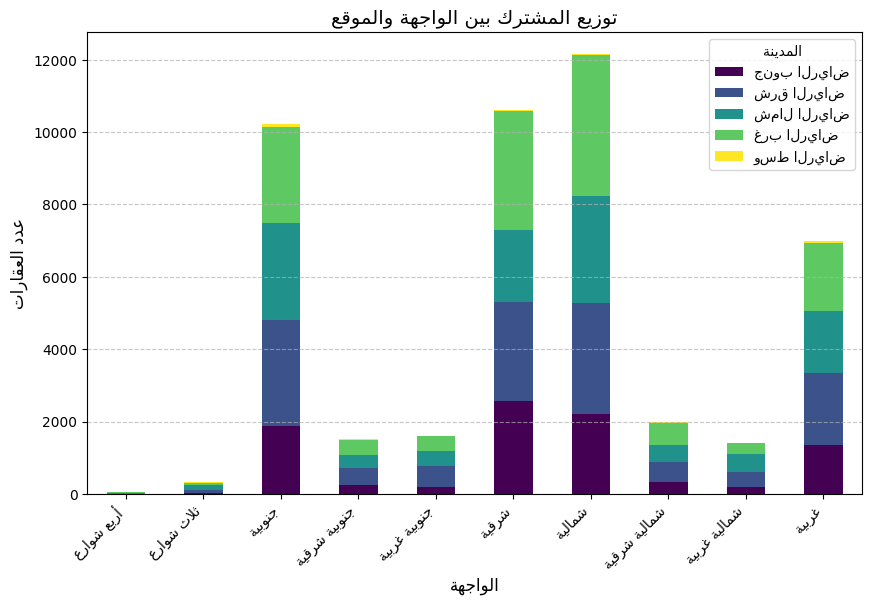

In [229]:

import arabic_reshaper
from bidi.algorithm import get_display

# إعادة تشكيل النصوص العربية لتظهر بشكل صحيح
xticklabels = [get_display(arabic_reshaper.reshape(label)) for label in cross_tab.index]

# رسم المخطط
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# تحسين العناوين والتسميات
plt.title(get_display(arabic_reshaper.reshape("توزيع المشترك بين الواجهة والموقع")), fontsize=14)
plt.xlabel(get_display(arabic_reshaper.reshape("الواجهة")), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape("عدد العقارات")), fontsize=12)

# ضبط تسميات المحور X بالشكل الصحيح
plt.xticks(range(len(xticklabels)), xticklabels, rotation=45, ha='right')

# تحسين وسيلة الإيضاح
plt.legend(title=get_display(arabic_reshaper.reshape("المدينة")))

# تحسين الخطوط
plt.grid(axis='y', linestyle='--', alpha=0.7)

# عرض المخطط
plt.show()



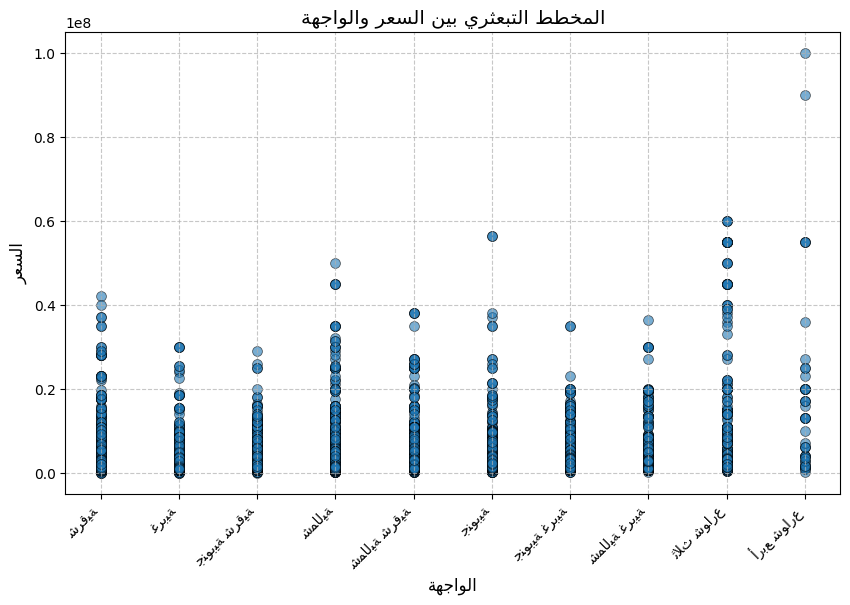

In [234]:
# إعادة تشكيل النصوص العربية لتظهر بشكل صحيح
title = get_display(arabic_reshaper.reshape("المخطط التبعثري بين السعر والواجهة"))
xlabel = get_display(arabic_reshaper.reshape("الواجهة"))
ylabel = get_display(arabic_reshaper.reshape("السعر"))

# إعادة تشكيل تسميات المحور X
housing['الواجهة'] = housing['الواجهة'].astype(str)  # تحويل القيم إلى نصوص
housing['الواجهة'] = housing['الواجهة'].apply(lambda x: get_display(arabic_reshaper.reshape(x)) if x.strip() != 'nan' else x)

plt.figure(figsize=(10, 6))

# رسم Scatter Plot
sns.scatterplot(data=housing, x='الواجهة', y='السعر الاجمالي', alpha=0.6, s=50, edgecolor='black')

# ضبط العناوين والتسميات
plt.title(title, fontsize=14)
plt.xlabel(xlabel, fontsize=12)
plt.ylabel(ylabel, fontsize=12)

# ضبط تسميات محور X بعد إعادة تشكيل النصوص
plt.xticks(rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.7)

# عرض المخطط
plt.show()

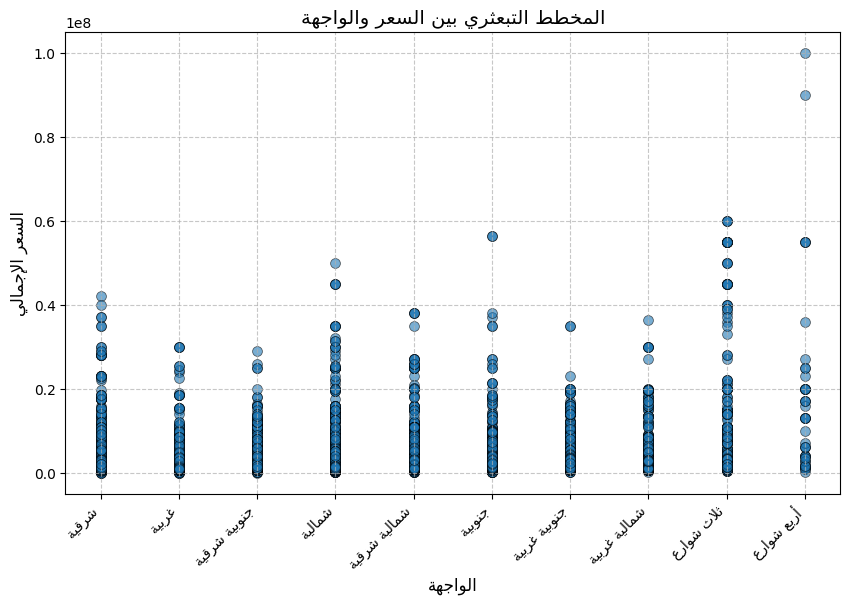

In [233]:
# إعادة تشكيل النصوص العربية لتظهر بشكل صحيح
title = get_display(arabic_reshaper.reshape("المخطط التبعثري بين السعر والواجهة"))
xlabel = get_display(arabic_reshaper.reshape("الواجهة"))
ylabel = get_display(arabic_reshaper.reshape("السعر الإجمالي"))

# إعادة تشكيل تسميات المحور X
housing['الواجهة'] = housing['الواجهة'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

plt.figure(figsize=(10, 6))

# رسم Scatter Plot
sns.scatterplot(data=housing, x='الواجهة', y='السعر الاجمالي', alpha=0.6, s=50, edgecolor='black')

# ضبط العناوين والتسميات باستخدام النصوص المعاد تشكيلها
plt.title(title, fontsize=14)
plt.xlabel(xlabel, fontsize=12)
plt.ylabel(ylabel, fontsize=12)

# ضبط تسميات محور X بالشكل الصحيح
plt.xticks(rotation=45, ha='right')

# تحسين شبكة المخطط
plt.grid(True, linestyle='--', alpha=0.7)

# عرض المخطط
plt.show()

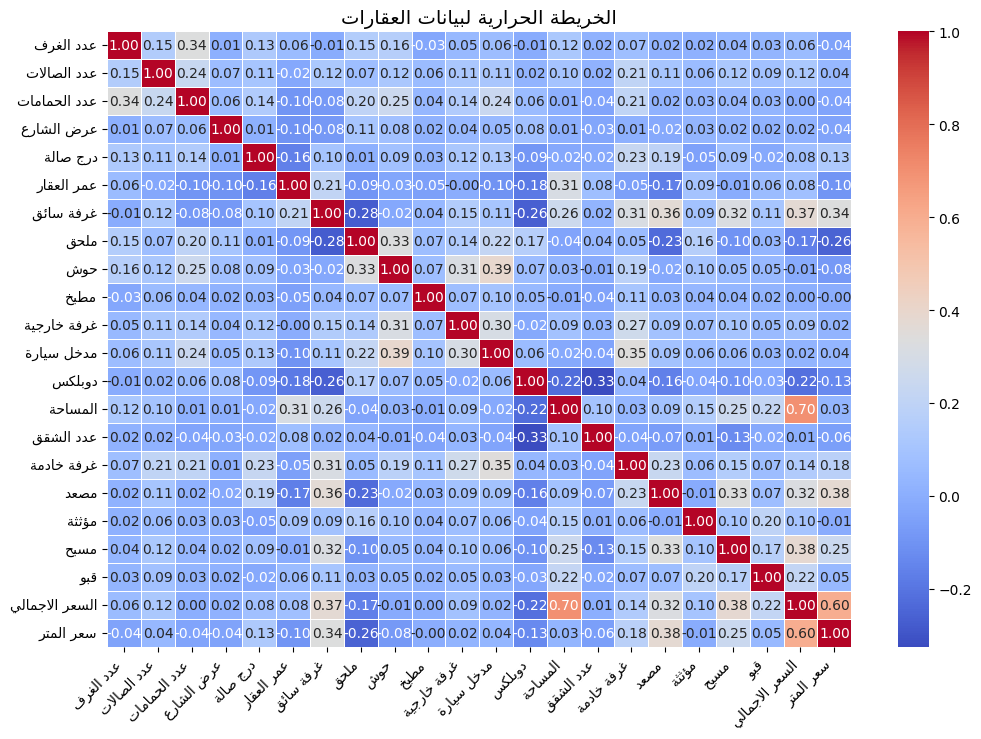

In [235]:

# تصفية الأعمدة الرقمية فقط
numeric_housing = housing.select_dtypes(include=["number"])

# حساب مصفوفة الارتباط بين جميع الأعمدة الرقمية
correlation_matrix = numeric_housing.corr()

# ضبط حجم الرسم البياني
plt.figure(figsize=(12, 8))

# إنشاء المخطط الحراري
ax = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# إعادة تشكيل النصوص العربية باستخدام `arabic_reshaper`
xticklabels = [get_display(arabic_reshaper.reshape(label.get_text())) for label in ax.get_xticklabels()]
yticklabels = [get_display(arabic_reshaper.reshape(label.get_text())) for label in ax.get_yticklabels()]

# ضبط النصوص بعد التعديل
ax.set_xticklabels(xticklabels, rotation=45, ha="right", fontfamily="Arial", fontsize=10)
ax.set_yticklabels(yticklabels, rotation=0, ha="right", fontfamily="Arial", fontsize=10)

# إضافة العنوان مع ترتيب النصوص
plt.title(get_display(arabic_reshaper.reshape("الخريطة الحرارية لبيانات العقارات")), fontsize=14)

# عرض المخطط
plt.show()


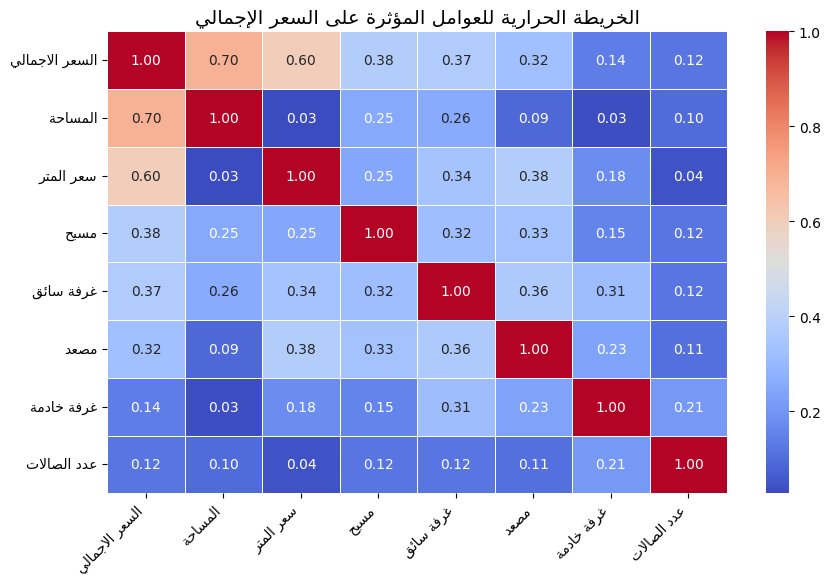

In [237]:
# قائمة بأهم العوامل المؤثرة مع استبعاد الدوبلكس والخيمة
important_factors = ["السعر الاجمالي", "المساحة", "سعر المتر", "مسبح", "غرفة سائق", "مصعد", "غرفة خادمة", "عدد الصالات"]

# تصفية البيانات لإبقاء العوامل المهمة فقط
filtered_corr_matrix = housing[important_factors].corr()

# ضبط حجم الرسم البياني
plt.figure(figsize=(10, 6))

# إنشاء المخطط الحراري
ax = sns.heatmap(filtered_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# إعادة تشكيل النصوص العربية
xticklabels = [get_display(arabic_reshaper.reshape(label.get_text())) for label in ax.get_xticklabels()]
yticklabels = [get_display(arabic_reshaper.reshape(label.get_text())) for label in ax.get_yticklabels()]

# ضبط النصوص بعد التعديل
ax.set_xticklabels(xticklabels, rotation=45, ha="right", fontfamily="Arial", fontsize=10)
ax.set_yticklabels(yticklabels, rotation=0, ha="right", fontfamily="Arial", fontsize=10)

# إضافة العنوان
plt.title(get_display(arabic_reshaper.reshape("الخريطة الحرارية للعوامل المؤثرة على السعر الإجمالي")), fontsize=14)

# عرض المخطط
plt.show()


###### 2-Apartments in Riyadh Saudi Arabia

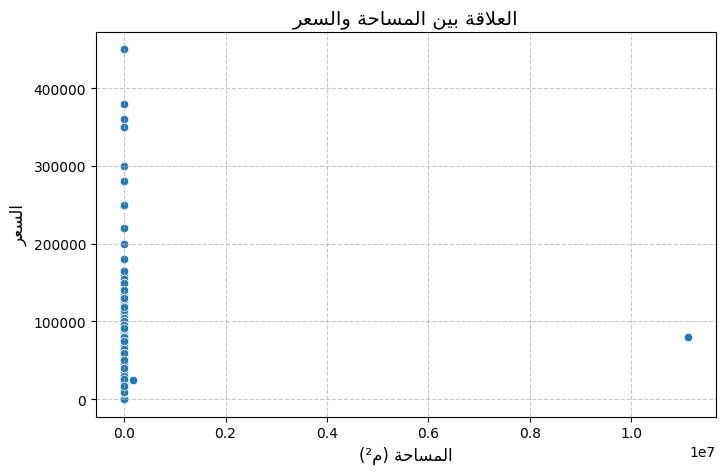

In [241]:

# إعادة تشكيل النصوص العربية
title = get_display(arabic_reshaper.reshape("العلاقة بين المساحة والسعر"))
xlabel = get_display(arabic_reshaper.reshape("المساحة (م²)"))
ylabel = get_display(arabic_reshaper.reshape("السعر"))

plt.figure(figsize=(8, 5))

# تصفية البيانات
df_filtered = realEstate[realEstate['area'] > 10]

# رسم Scatter Plot
sns.scatterplot(x=df_filtered['area'], y=df_filtered['price'])

# ضبط العناوين والتسميات
plt.title(title, fontsize=14)
plt.xlabel(xlabel, fontsize=12)
plt.ylabel(ylabel, fontsize=12)

# تحسين الشبكة
plt.grid(True, linestyle='--', alpha=0.7)

# عرض المخطط
plt.show()


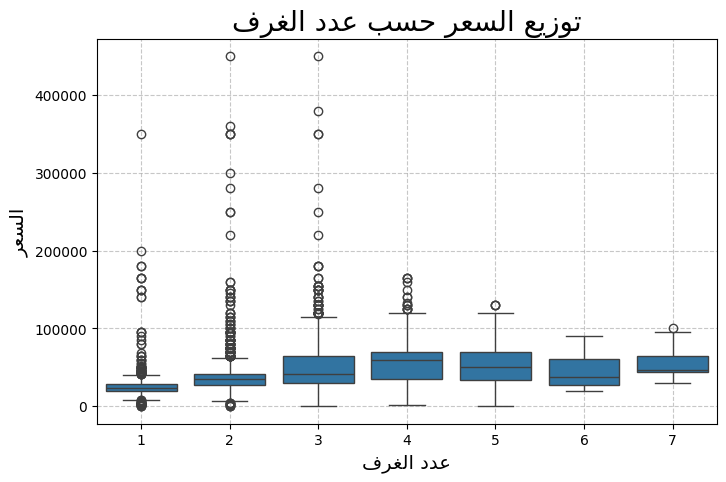

In [242]:
# إعادة تشكيل النصوص العربية
title_text = get_display(arabic_reshaper.reshape("توزيع السعر حسب عدد الغرف"))
xlabel_text = get_display(arabic_reshaper.reshape("عدد الغرف"))
ylabel_text = get_display(arabic_reshaper.reshape("السعر"))

plt.figure(figsize=(8, 5))

# رسم Box Plot
sns.boxplot(x=realEstate['beds'], y=realEstate['price'])

# ضبط العناوين والتسميات
plt.title(title_text, fontsize=20)
plt.xlabel(xlabel_text, fontsize=14)
plt.ylabel(ylabel_text, fontsize=14)

# تحسين الشبكة
plt.grid(True, linestyle='--', alpha=0.7)

# عرض المخطط
plt.show()


###### 3-Riyadh Aqaar Dataset

**1- Land:**

In [243]:
df_land.head(3)

نوع العقار     الغرض المدينة         الحي     الواجهة  المساحة  سعر المتر  \
0        أرض  غير محدد  الرياض      الرياض        غربية      375     2900.0   
1        أرض  غير محدد  الرياض   حي غرناطة       شمالية      800     4800.0   
2        أرض      سكني  الرياض   حي غرناطة   ثلاث شوارع     1650     4800.0   

   السعر الاجمالي  السعر المربع  
0       1087500.0        2900.0  
1       3840000.0        4800.0  
2       7920000.0        4800.0

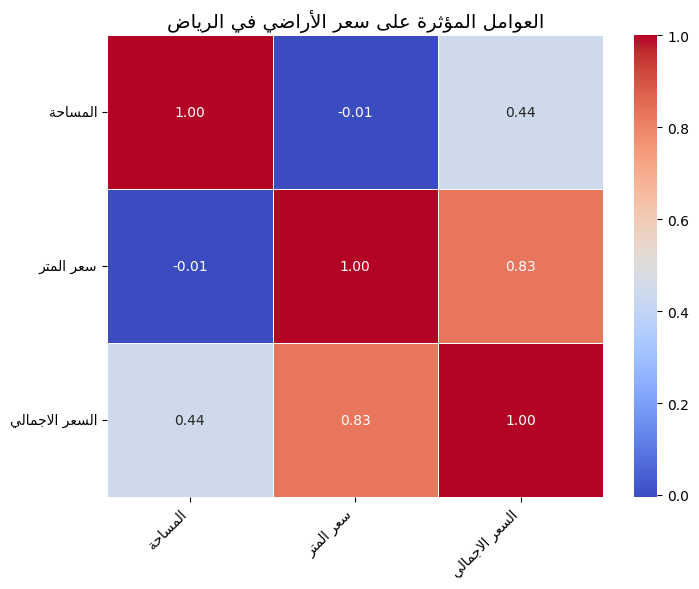

In [244]:
# قائمة الأعمدة التي نريد تضمينها في الخريطة الحرارية
selected_columns = ["المساحة", "سعر المتر", "السعر الاجمالي"]

# تصفية البيانات للإبقاء فقط على الأعمدة المختارة
filtered_df = df_land[selected_columns]

# حساب مصفوفة الارتباط
correlation_matrix = filtered_df.corr()

# ضبط حجم الرسم البياني
plt.figure(figsize=(8, 6))

# إنشاء المخطط الحراري
ax = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# إعادة تشكيل النصوص العربية
xticklabels = [get_display(arabic_reshaper.reshape(label.get_text())) for label in ax.get_xticklabels()]
yticklabels = [get_display(arabic_reshaper.reshape(label.get_text())) for label in ax.get_yticklabels()]

# ضبط النصوص بعد التعديل
ax.set_xticklabels(xticklabels, rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(yticklabels, rotation=0, ha="right", fontsize=10)

# إضافة العنوان
plt.title(get_display(arabic_reshaper.reshape("العوامل المؤثرة على سعر الأراضي في الرياض")), fontsize=14)

# عرض المخطط
plt.show()


<ipython-input-275-508a2668eccb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purpose_counts.values, y=labels, palette="viridis")


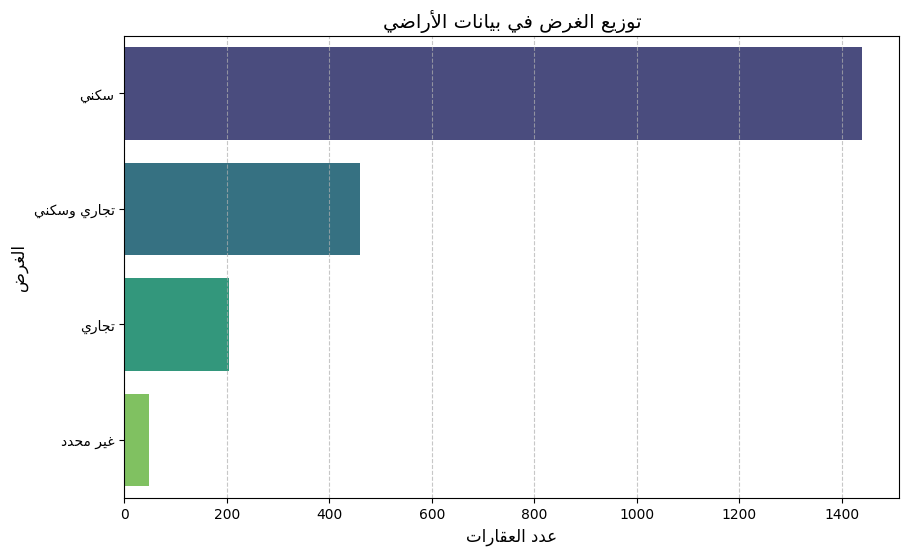

In [275]:
# حساب عدد تكرارات كل قيمة في العمود
purpose_counts = df_land['الغرض'].value_counts()

# إعادة تشكيل النصوص العربية لتظهر بشكل صحيح في المحور Y
labels = [get_display(arabic_reshaper.reshape(label)) for label in purpose_counts.index]

# ضبط حجم الرسم البياني
plt.figure(figsize=(10, 6))

# رسم المخطط الشريطي
sns.barplot(x=purpose_counts.values, y=labels, palette="viridis")

# إضافة العناوين والمحاور
plt.xlabel(get_display(arabic_reshaper.reshape("عدد العقارات")), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape("الغرض")), fontsize=12)
plt.title(get_display(arabic_reshaper.reshape("توزيع الغرض في بيانات الأراضي")), fontsize=14)

# تحسين الشبكة
plt.grid(axis='x', linestyle='--', alpha=0.7)

# عرض المخطط
plt.show()


**2- Villas**

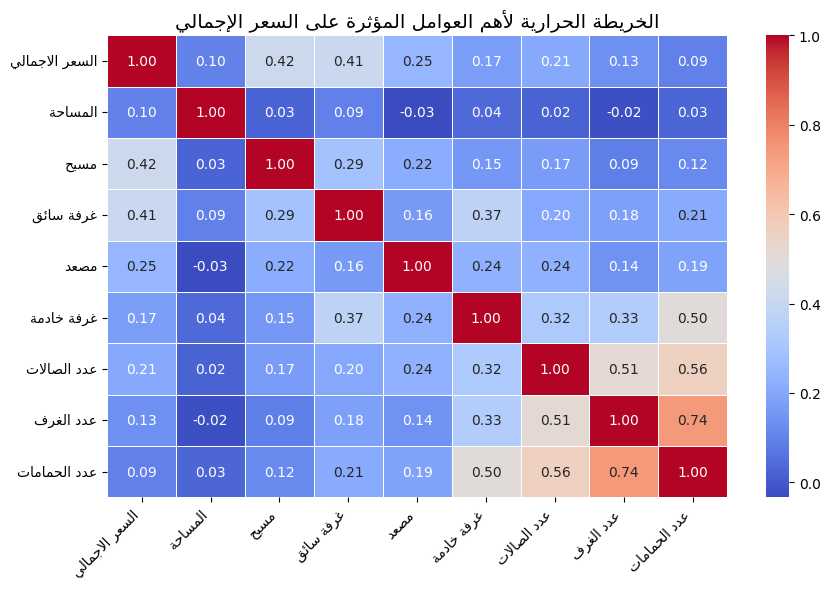

In [246]:

# إعادة تشكيل النصوص العربية
def reshape_arabic_labels(labels):
    return [get_display(arabic_reshaper.reshape(label)) for label in labels]

# تحديد أهم 10 عوامل مؤثرة على السعر الإجمالي
important_factors = ["السعر الاجمالي", "المساحة", "مسبح", "غرفة سائق", "مصعد", "غرفة خادمة", "عدد الصالات", "عدد الغرف", "عدد الحمامات"]

# تصفية البيانات بناءً على العوامل المهمة فقط
df_filtered = df_villas[important_factors]

# حساب مصفوفة الارتباط
correlation_matrix = df_filtered.corr()

# إنشاء المخطط
plt.figure(figsize=(10, 6))
ax = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# إعادة ترتيب النصوص العربية لتظهر بشكل صحيح
xticklabels = reshape_arabic_labels([label.get_text() for label in ax.get_xticklabels()])
yticklabels = reshape_arabic_labels([label.get_text() for label in ax.get_yticklabels()])

# ضبط النصوص بعد التعديل
ax.set_xticklabels(xticklabels, rotation=45, ha="right", fontfamily="Arial", fontsize=10)
ax.set_yticklabels(yticklabels, rotation=0, ha="right", fontfamily="Arial", fontsize=10)

# إضافة العنوان
plt.title(get_display(arabic_reshaper.reshape("الخريطة الحرارية لأهم العوامل المؤثرة على السعر الإجمالي")), fontsize=14)

# عرض المخطط
plt.show()


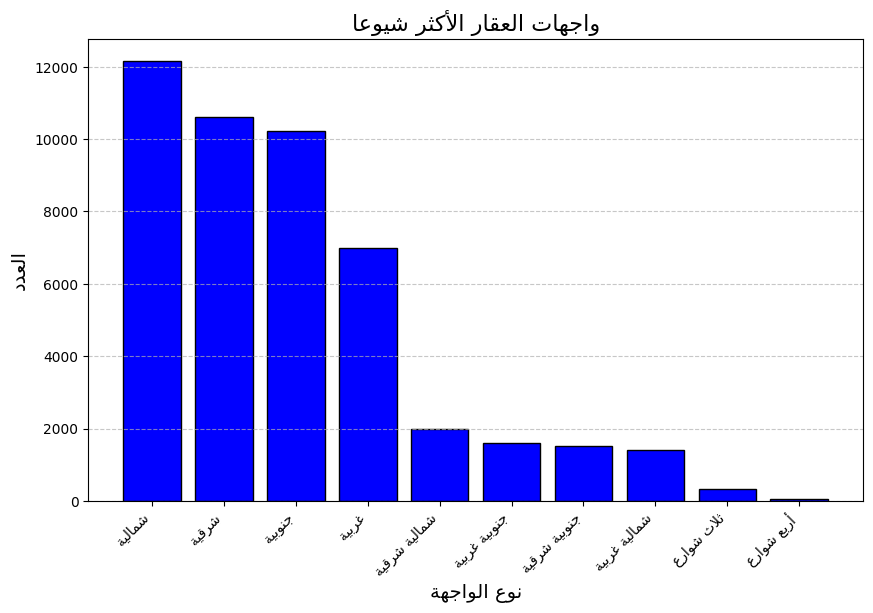

In [257]:

# إعادة تشكيل النصوص العربية للعناوين
title_text = get_display(arabic_reshaper.reshape("واجهات العقار الأكثر شيوعاً"))
xlabel_text = get_display(arabic_reshaper.reshape("نوع الواجهة"))
ylabel_text = get_display(arabic_reshaper.reshape("العدد"))

# حساب عدد كل نوع من الواجهات
front_counts = housing['الواجهة'].value_counts()

# إعادة تشكيل تسميات المحور X
front_labels = [get_display(arabic_reshaper.reshape(label)) for label in front_counts.index]

plt.figure(figsize=(10, 6))

# رسم مخطط الأعمدة
plt.bar(front_labels, front_counts.values, color='blue', edgecolor='black')

# ضبط العناوين والتسميات
plt.title(title_text, fontsize=16)
plt.xlabel(xlabel_text, fontsize=14)
plt.ylabel(ylabel_text, fontsize=14)

# ضبط تسميات محور X بالشكل الصحيح
plt.xticks(rotation=45, ha='right')

# تحسين الشبكة
plt.grid(axis='y', linestyle='--', alpha=0.7)

# عرض المخطط
plt.show()


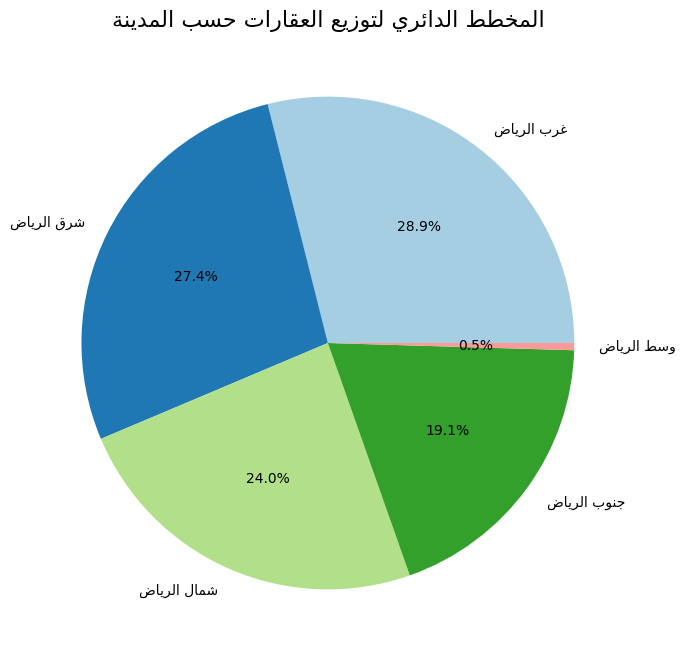

In [258]:

# إعادة تشكيل النصوص العربية
title_text = get_display(arabic_reshaper.reshape("المخطط الدائري لتوزيع العقارات حسب المدينة"))

# حساب عدد العقارات لكل مدينة
location_counts = housing['المدينة'].value_counts()

# إعادة تشكيل تسميات المدن في المحور X
location_labels = [get_display(arabic_reshaper.reshape(label)) for label in location_counts.index]

plt.figure(figsize=(8, 8))

# رسم المخطط الدائري
plt.pie(location_counts.values, labels=location_labels, autopct='%1.1f%%', colors=plt.cm.Paired.colors)

# ضبط العنوان
plt.title(title_text, fontsize=16)

# عرض المخطط
plt.show()


**3- Apartments**

In [259]:
pie = df_apartments['الحي'].value_counts()
pie

الحي
حي النرجس                     95
حي الملقا                     82
حي العارض                     48
الرياض                        40
حي الياسمين                   25
حي القيروان                   21
حي حطين                       16
حي الندى                      11
حي المروج                      9
حي النفل                       7
حي العقيق                      7
حي الصحافة                     6
حي النخيل                      6
حي الوادي                      5
حي الربيع                      5
حي المغرزات                    5
حي التعاون                     4
حي المصيف                      4
حي الفلاح                      3
حي النزهة                      3
حي الملك فهد                   2
حي العليا                      2
حي المرسلات                    2
                               2
شارع عبدالله بن العاص          1
حي مطار الملك خالد الدولي      1
Name: count, dtype: int64

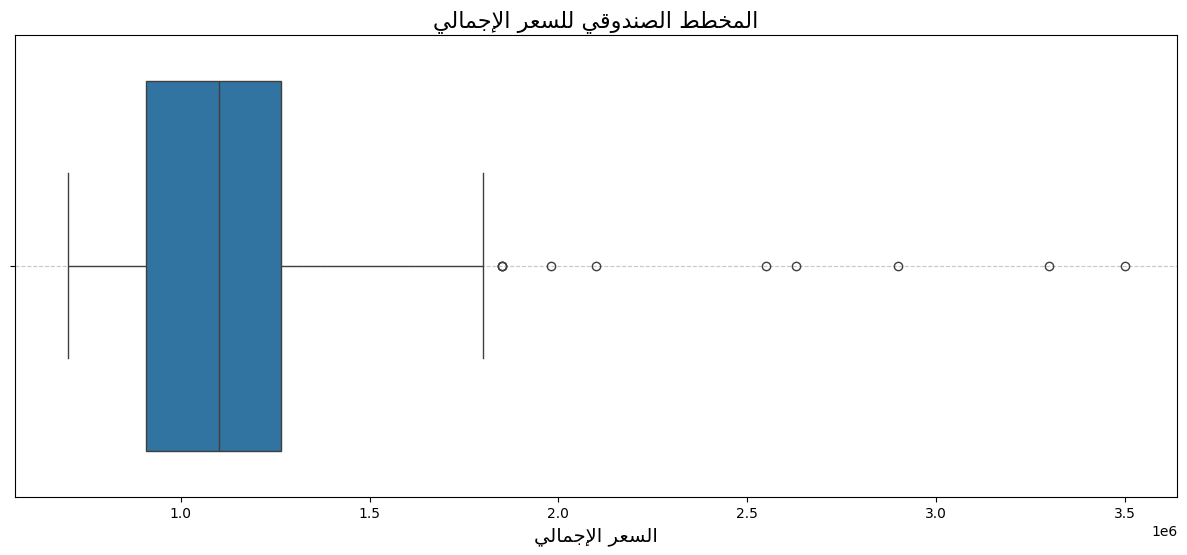

In [274]:

# إعادة تشكيل النصوص العربية لتظهر بشكل صحيح
title_text = get_display(arabic_reshaper.reshape("المخطط الصندوقي للسعر الإجمالي"))
xlabel_text = get_display(arabic_reshaper.reshape("السعر الإجمالي"))

plt.figure(figsize=(15, 6))

# رسم Boxplot
sns.boxplot(x=df_apartments['السعر الاجمالي'])

# ضبط العناوين والتسميات
plt.title(title_text, fontsize=16)
plt.xlabel(xlabel_text, fontsize=14)

# تحسين الشبكة
plt.grid(axis='y', linestyle='--', alpha=0.7)

# عرض المخطط
plt.show()


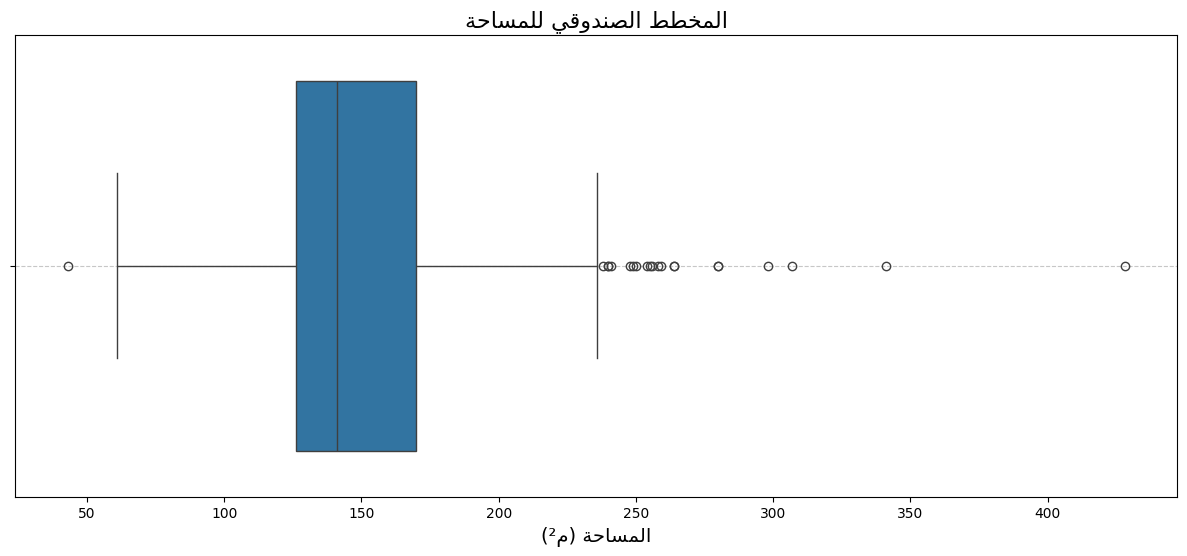

In [280]:

# إعادة تشكيل النصوص العربية
title_text = get_display(arabic_reshaper.reshape("المخطط الصندوقي للمساحة"))
xlabel_text = get_display(arabic_reshaper.reshape("المساحة (م²)"))

plt.figure(figsize=(15, 6))

# رسم Boxplot
sns.boxplot(x=df_apartments['المساحة'])

# ضبط العناوين والتسميات
plt.title(title_text, fontsize=16)
plt.xlabel(xlabel_text, fontsize=14)

# تحسين الشبكة
plt.grid(axis='y', linestyle='--', alpha=0.7)

# عرض المخطط
plt.show()


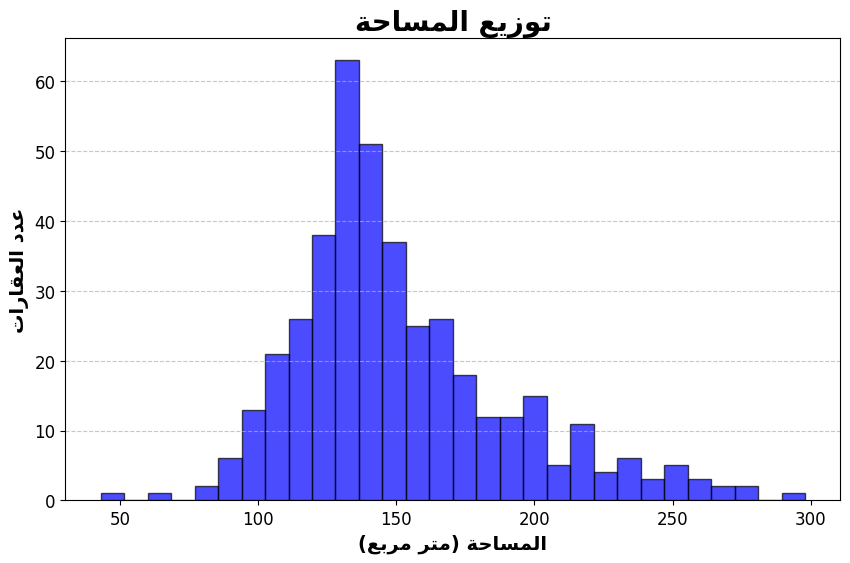

In [260]:
# Fix Arabic text rendering
title_text = get_display(arabic_reshaper.reshape("توزيع المساحة"))
xlabel_text = get_display(arabic_reshaper.reshape("المساحة (متر مربع)"))
ylabel_text = get_display(arabic_reshaper.reshape("عدد العقارات"))


df_filtered = df_apartments[(df_apartments['المساحة'] <= 300)].copy()

# Plot histogram again with fixed Arabic text
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['المساحة'], bins=30, color='blue', edgecolor='black', alpha=0.7)

# Apply correct Arabic labels
plt.title(title_text, fontsize=20, fontweight='bold')
plt.xlabel(xlabel_text, fontsize=14, fontweight='bold')
plt.ylabel(ylabel_text, fontsize=14, fontweight='bold')

# Adjust layout
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the fixed plot
plt.show()


In [261]:
df_apartments.shape

(412, 15)

In [262]:
# price outliers
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_apartments['السعر الاجمالي'].quantile(0.25)
Q3 = df_apartments['السعر الاجمالي'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#  Remove outliers: Keep only rows where 'price' is within the bounds
df=df_apartments[(df_apartments['السعر الاجمالي'] >= lower_bound) & (df_apartments['السعر الاجمالي'] <= upper_bound)]
df.shape

(402, 15)

In [263]:
df['السعر الاجمالي'].unique()

array([1434000,  980000, 1050000, 1200000,  850000,  885000,  930000,
       1100000, 1300000,  950000,  959000, 1190000, 1320000, 1375000,
       1400000,  990000, 1499000, 1000000,  830000, 1070000, 1450000,
       1249000, 1205000,  899000, 1350000, 1800000,  800000, 1379000,
       1500000, 1250000, 1150000,  900000,  799000,  969000, 1199000,
        715000, 1079000,  849000,  890000,  896000, 1369000, 1065000,
        820000, 1429000, 1700000,  985000, 1260000, 1179000,  745000,
       1650000, 1550000, 1490000,  970000,  840000,  750000, 1399000,
       1020000, 1180000, 1600000, 1176000,  790000,  920000,  955000,
       1255600,  909000, 1155000, 1069000,  860000,  910000, 1089000,
       1289000, 1328465,  700000,  839000, 1730000, 1299000, 1160000,
       1390000,  957000, 1620000, 1233000, 1029000, 1189000, 1149000,
        859000,  995000,  940000, 1099000,  945000,  906000,  979000,
        949000,  895000,  960000, 1245000,  846000, 1570000, 1019000,
        889000, 1064

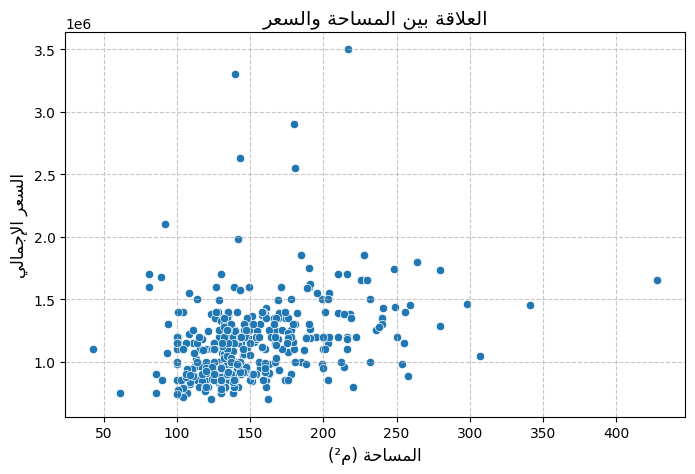

In [282]:

# إعادة تشكيل النصوص العربية
title_text = get_display(arabic_reshaper.reshape("العلاقة بين المساحة والسعر"))
xlabel_text = get_display(arabic_reshaper.reshape("المساحة (م²)"))
ylabel_text = get_display(arabic_reshaper.reshape("السعر الإجمالي"))

plt.figure(figsize=(8, 5))

# تصفية البيانات لإزالة القيم غير المنطقية
df_filtered = df_apartments[df_apartments['المساحة'] > 10]

# رسم Scatter Plot
sns.scatterplot(x=df_filtered['المساحة'], y=df_filtered['السعر الاجمالي'])

# ضبط العناوين والتسميات
plt.title(title_text, fontsize=14)
plt.xlabel(xlabel_text, fontsize=12)
plt.ylabel(ylabel_text, fontsize=12)

# تحسين الشبكة
plt.grid(True, linestyle='--', alpha=0.7)

# عرض المخطط
plt.show()


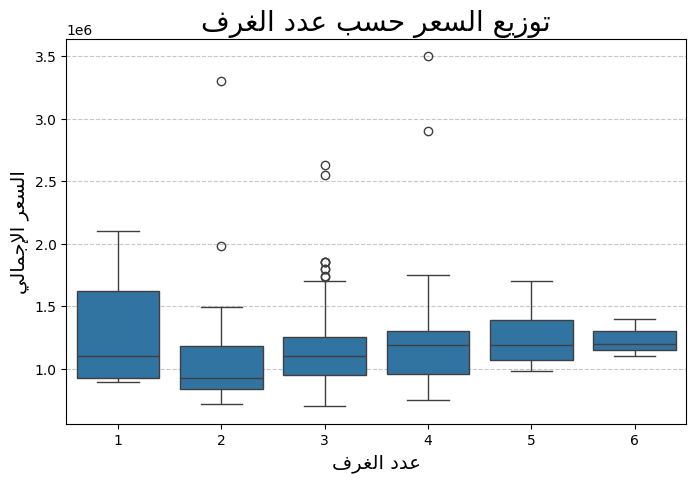

In [283]:

# إعادة تشكيل النصوص العربية لتظهر بشكل صحيح
title_text = get_display(arabic_reshaper.reshape("توزيع السعر حسب عدد الغرف"))
xlabel_text = get_display(arabic_reshaper.reshape("عدد الغرف"))
ylabel_text = get_display(arabic_reshaper.reshape("السعر الإجمالي"))

plt.figure(figsize=(8, 5))

# رسم Boxplot
sns.boxplot(x=df_apartments['عدد الغرف'], y=df_apartments['السعر الاجمالي'])

# ضبط العناوين والتسميات
plt.title(title_text, fontsize=20)
plt.xlabel(xlabel_text, fontsize=14)
plt.ylabel(ylabel_text, fontsize=14)

# تحسين الشبكة
plt.grid(axis='y', linestyle='--', alpha=0.7)

# عرض المخطط
plt.show()


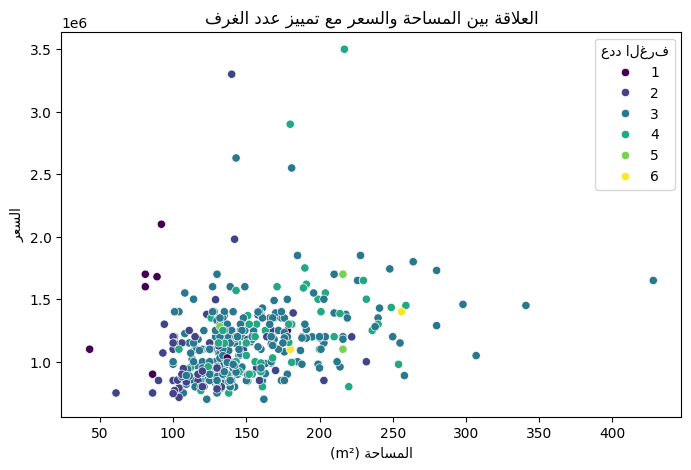

In [266]:
title_text = get_display(arabic_reshaper.reshape("العلاقة بين المساحة والسعر مع تمييز عدد الغرف"))
title_text1 = get_display(arabic_reshaper.reshape("المساحة (m²)"))
title_text2 = get_display(arabic_reshaper.reshape("السعر"))


df_filtered = df_apartments[(df_apartments['عمر العقار'] >= 0) & (df_apartments['السعر الاجمالي'] > 500)]

plt.figure(figsize=(8,5))
sns.scatterplot(x=df_filtered['المساحة'], y=df_filtered['السعر الاجمالي'], hue=df_filtered['عدد الغرف'], palette="viridis")
plt.title(title_text)
plt.xlabel(title_text1)
plt.ylabel(title_text2)
plt.show()


<ipython-input-267-c2b0b058a270>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_districts['الحي'], y=top_districts['count'], palette="viridis")
<ipython-input-267-c2b0b058a270>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([get_display(arabic_reshaper.reshape(label.get_text())) for label in ax.get_xticklabels()], rotation=45)


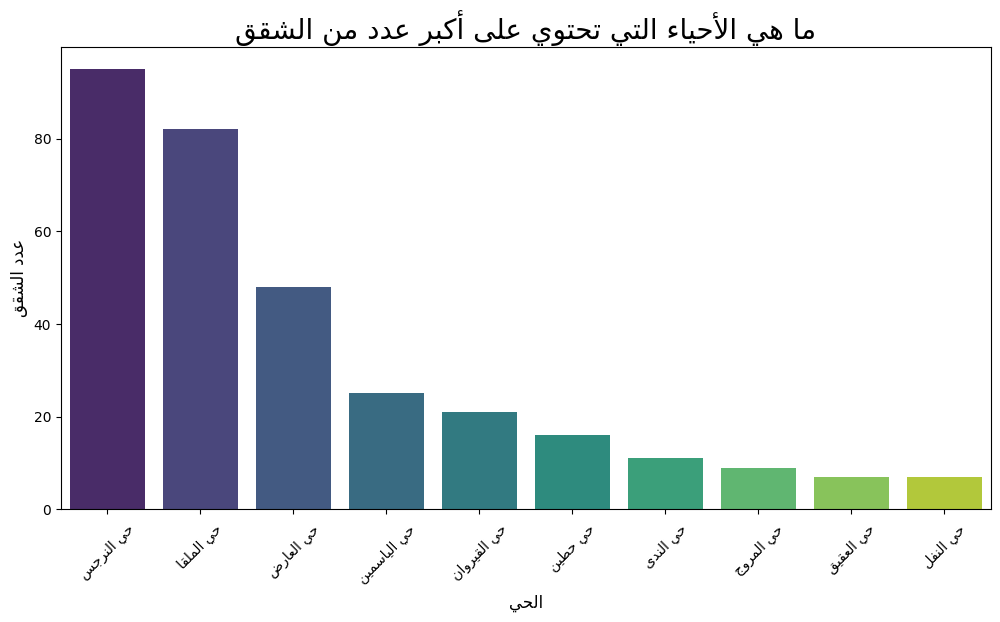

In [267]:

# حساب عدد الشقق في كل حي
district_counts = df_apartments[df_apartments['الحي'] != ' الرياض ']['الحي'].value_counts().reset_index()
district_counts.columns = ['الحي', 'count']

# أخذ أكثر 10 أحياء بها شقق
top_districts = district_counts.head(10)

# تجهيز النصوص العربية
title_text = get_display(arabic_reshaper.reshape('ما هي الأحياء التي تحتوي على أكبر عدد من الشقق'))
xlabel_text = get_display(arabic_reshaper.reshape('الحي'))
ylabel_text = get_display(arabic_reshaper.reshape('عدد الشقق'))

# رسم مخطط Bar Chart
plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_districts['الحي'], y=top_districts['count'], palette="viridis")

# تعديل التسميات إلى العربية
ax.set_xticklabels([get_display(arabic_reshaper.reshape(label.get_text())) for label in ax.get_xticklabels()], rotation=45)

# تسميات المحاور والعنوان
plt.xlabel(xlabel_text, fontsize=12)
plt.ylabel(ylabel_text, fontsize=12)
plt.title(title_text, fontsize=20)

plt.show()



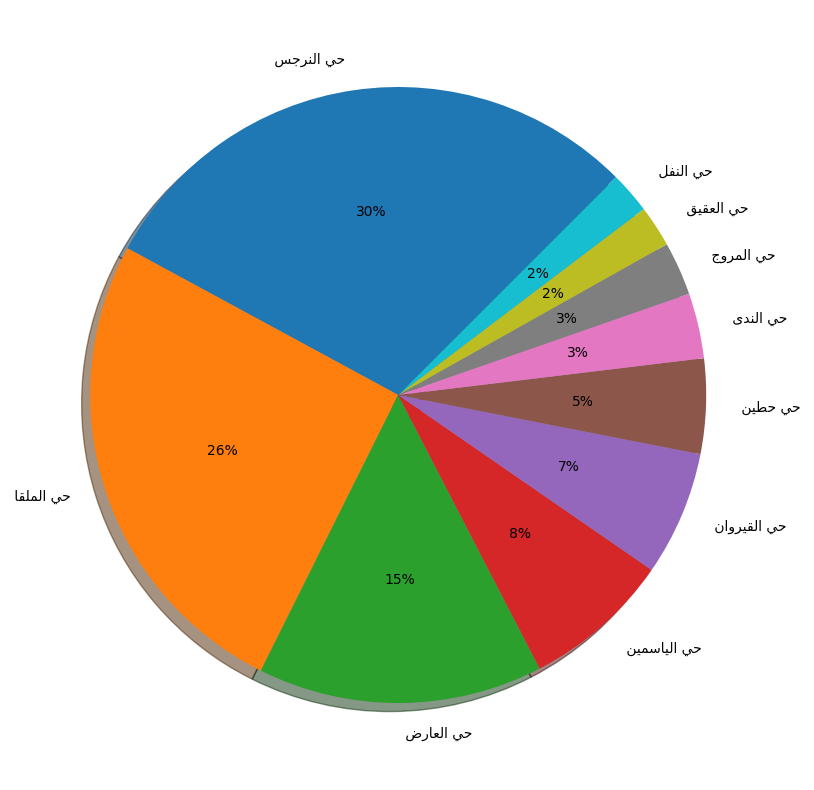

In [268]:
pie = df_apartments[df_apartments['الحي'] != ' الرياض ']['الحي'].value_counts()

# إصلاح النصوص العربية
labels = [get_display(arabic_reshaper.reshape(label)) for label in pie[:10].index]

# رسم مخطط الدائرة مع النصوص المصححة
plt.figure(figsize=(10, 10))
plt.pie(
    x=pie[:10].values,
    labels=labels,
    autopct='%1.0f%%',
    startangle=45,
    shadow=True
)

# عرض المخطط
plt.show()

# Questions Answers:

### Q1: What are the factors that significantly effect the [total price] of land, apartment, villas?

**For Land:**

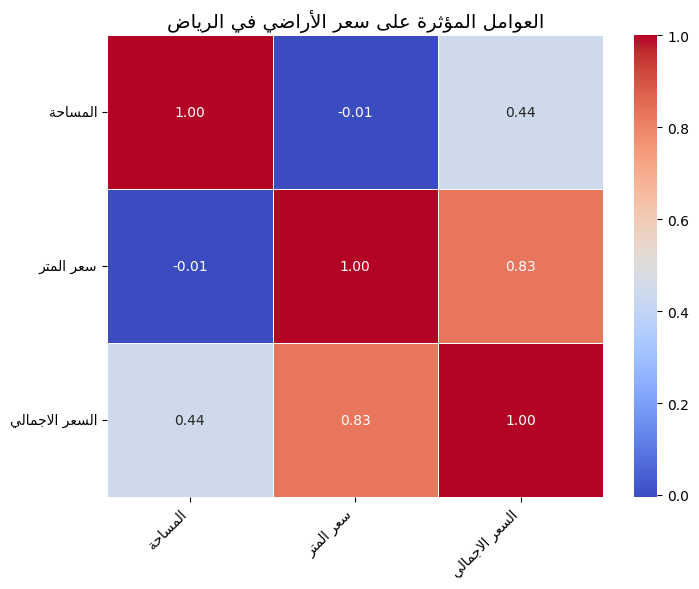

In [270]:

# قائمة الأعمدة التي نريد تضمينها في الخريطة الحرارية
selected_columns = ["المساحة", "سعر المتر", "السعر الاجمالي"]

# تصفية البيانات للإبقاء فقط على الأعمدة المختارة
filtered_df = df_land[selected_columns]

# حساب مصفوفة الارتباط
correlation_matrix = filtered_df.corr()

# ضبط حجم الرسم البياني
plt.figure(figsize=(8, 6))

# إنشاء المخطط الحراري
ax = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# إعادة تشكيل النصوص العربية
xticklabels = [get_display(arabic_reshaper.reshape(label.get_text())) for label in ax.get_xticklabels()]
yticklabels = [get_display(arabic_reshaper.reshape(label.get_text())) for label in ax.get_yticklabels()]

# ضبط النصوص بعد التعديل
ax.set_xticklabels(xticklabels, rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(yticklabels, rotation=0, ha="right", fontsize=10)

# إضافة العنوان
plt.title(get_display(arabic_reshaper.reshape("العوامل المؤثرة على سعر الأراضي في الرياض")), fontsize=14)

# عرض المخطط
plt.show()


The meter price effect the total price more by 40% than the space for lands in Riyadh.


**For Villas:**

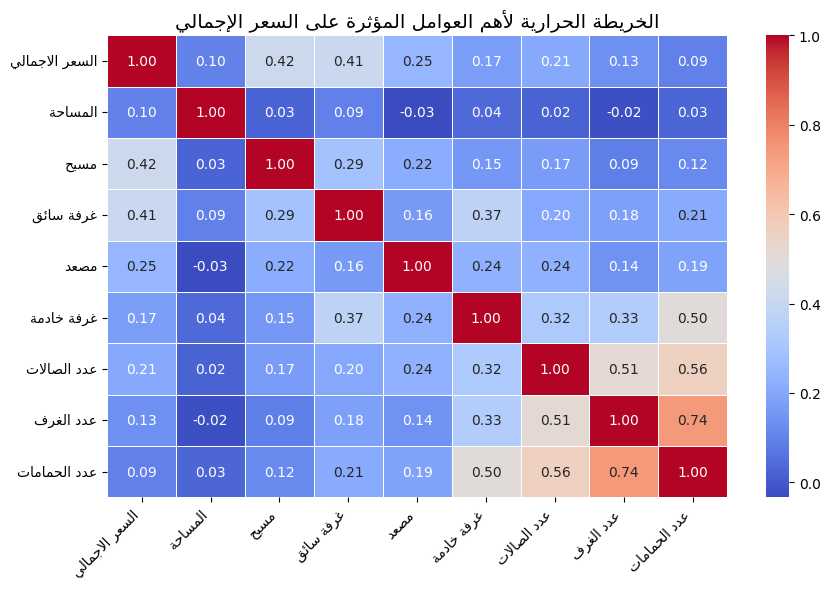

In [271]:

# إعادة تشكيل النصوص العربية
def reshape_arabic_labels(labels):
    return [get_display(arabic_reshaper.reshape(label)) for label in labels]

# تحديد أهم 10 عوامل مؤثرة على السعر الإجمالي
important_factors = ["السعر الاجمالي", "المساحة", "مسبح", "غرفة سائق", "مصعد", "غرفة خادمة", "عدد الصالات", "عدد الغرف", "عدد الحمامات"]

# تصفية البيانات بناءً على العوامل المهمة فقط
df_filtered = df_villas[important_factors]

# حساب مصفوفة الارتباط
correlation_matrix = df_filtered.corr()

# إنشاء المخطط
plt.figure(figsize=(10, 6))
ax = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# إعادة ترتيب النصوص العربية لتظهر بشكل صحيح
xticklabels = reshape_arabic_labels([label.get_text() for label in ax.get_xticklabels()])
yticklabels = reshape_arabic_labels([label.get_text() for label in ax.get_yticklabels()])

# ضبط النصوص بعد التعديل
ax.set_xticklabels(xticklabels, rotation=45, ha="right", fontfamily="Arial", fontsize=10)
ax.set_yticklabels(yticklabels, rotation=0, ha="right", fontfamily="Arial", fontsize=10)

# إضافة العنوان
plt.title(get_display(arabic_reshaper.reshape("الخريطة الحرارية لأهم العوامل المؤثرة على السعر الإجمالي")), fontsize=14)

# عرض المخطط
plt.show()


The factor that has the most impact on the total price for villas in Riyadh is if the villa has pool or not.
The factor that has most effect on total price for villas in Riyadh is if the villa has pool or not.

**For Appartments**

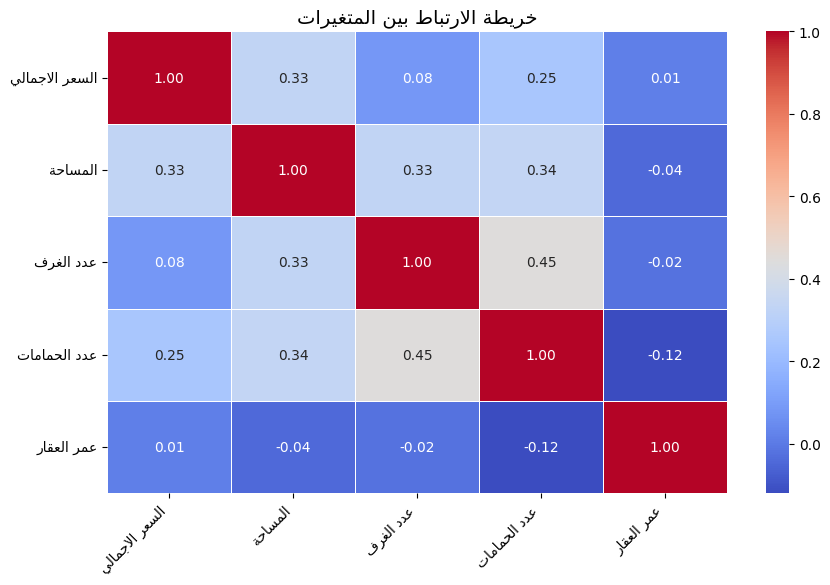

In [272]:
# تصفية البيانات لاستبعاد القيم غير المنطقية
df_filtered = df_apartments[(df_apartments['عمر العقار'] >= 0) & (df_apartments['السعر الاجمالي'] > 500)].copy()

# تنظيف الأعمدة التي قد تحتوي على قيم غير قابلة للتحويل
def clean_column(col):
    return col.astype(str).str.replace('+', '').str.strip()

# تنظيف وتحويل الأعمدة إلى أرقام
df_filtered['عدد الغرف'] = pd.to_numeric(clean_column(df_filtered['عدد الغرف']), errors='coerce')
df_filtered['السعر الاجمالي'] = pd.to_numeric(df_filtered['السعر الاجمالي'], errors='coerce')
df_filtered['المساحة'] = pd.to_numeric(df_filtered['المساحة'], errors='coerce')
df_filtered['عدد الحمامات'] = pd.to_numeric(df_filtered['عدد الحمامات'], errors='coerce')
df_filtered['عمر العقار'] = pd.to_numeric(df_filtered['عمر العقار'], errors='coerce')

# إزالة الصفوف التي تحتوي على قيم مفقودة بعد التنظيف
df_filtered = df_filtered.dropna(subset=['السعر الاجمالي', 'عدد الغرف', 'المساحة', 'عدد الحمامات', 'عمر العقار'])

# تحديد العوامل المهمة فقط
important_factors = ['السعر الاجمالي', 'المساحة', 'عدد الغرف', 'عدد الحمامات', 'عمر العقار']

# حساب مصفوفة الارتباط للعوامل المهمة
filtered_corr_matrix = df_filtered[important_factors].corr()

# ضبط حجم الرسم البياني
plt.figure(figsize=(10, 6))

# إنشاء المخطط الحراري
ax = sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# إعادة تشكيل النصوص العربية
xticklabels = [get_display(arabic_reshaper.reshape(label.get_text())) for label in ax.get_xticklabels()]
yticklabels = [get_display(arabic_reshaper.reshape(label.get_text())) for label in ax.get_yticklabels()]

# ضبط النصوص بعد التعديل
ax.set_xticklabels(xticklabels, rotation=45, ha="right", fontfamily="Arial", fontsize=10)
ax.set_yticklabels(yticklabels, rotation=0, ha="right", fontfamily="Arial", fontsize=10)

# إضافة العنوان
plt.title(get_display(arabic_reshaper.reshape("خريطة الارتباط بين المتغيرات")), fontsize=14)

# عرض المخطط
plt.show()


The factor that has most effect on total price for appartments in Riyadh is the appartment sapce.

### Q2: What type of land is most common in Riyadh?

<ipython-input-276-508a2668eccb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purpose_counts.values, y=labels, palette="viridis")


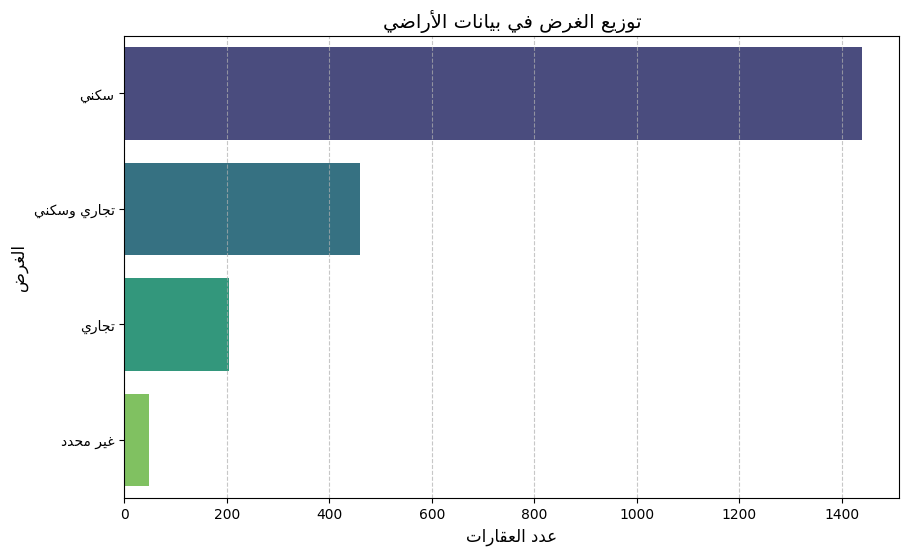

In [276]:
# حساب عدد تكرارات كل قيمة في العمود
purpose_counts = df_land['الغرض'].value_counts()

# إعادة تشكيل النصوص العربية لتظهر بشكل صحيح في المحور Y
labels = [get_display(arabic_reshaper.reshape(label)) for label in purpose_counts.index]

# ضبط حجم الرسم البياني
plt.figure(figsize=(10, 6))

# رسم المخطط الشريطي
sns.barplot(x=purpose_counts.values, y=labels, palette="viridis")

# إضافة العناوين والمحاور
plt.xlabel(get_display(arabic_reshaper.reshape("عدد العقارات")), fontsize=12)
plt.ylabel(get_display(arabic_reshaper.reshape("الغرض")), fontsize=12)
plt.title(get_display(arabic_reshaper.reshape("توزيع الغرض في بيانات الأراضي")), fontsize=14)

# تحسين الشبكة
plt.grid(axis='x', linestyle='--', alpha=0.7)

# عرض المخطط
plt.show()


The high number of lands designated for residential purposes in Riyadh is primarily driven by rapid population growth, urban expansion, and increasing housing demand. Government initiatives to boost homeownership, along with zoning regulations prioritizing residential development, further contribute to this trend. As more people move to the city for work and education, the demand for housing surpasses other land uses, making residential plots the most common.

### Q3: Is there a relationship between space and price, with distinction in the number of rooms?

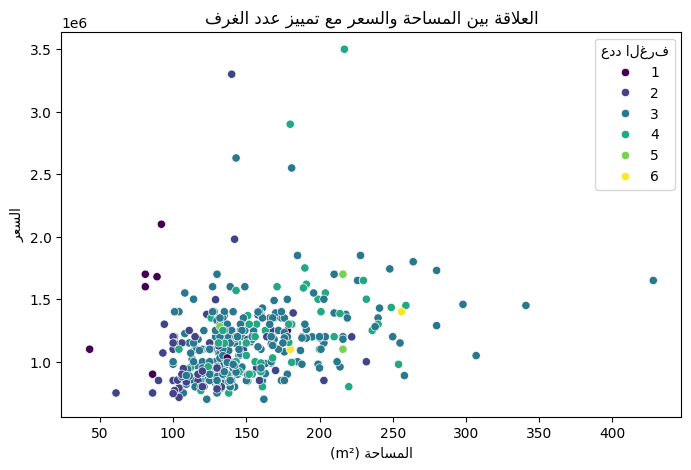

In [277]:
title_text = get_display(arabic_reshaper.reshape("العلاقة بين المساحة والسعر مع تمييز عدد الغرف"))
title_text1 = get_display(arabic_reshaper.reshape("المساحة (m²)"))
title_text2 = get_display(arabic_reshaper.reshape("السعر"))


df_filtered = df_apartments[(df_apartments['عمر العقار'] >= 0) & (df_apartments['السعر الاجمالي'] > 500)]

plt.figure(figsize=(8,5))
sns.scatterplot(x=df_filtered['المساحة'], y=df_filtered['السعر الاجمالي'], hue=df_filtered['عدد الغرف'], palette="viridis")
plt.title(title_text)
plt.xlabel(title_text1)
plt.ylabel(title_text2)
plt.show()


### Q4: Which neighborhoods have the most apartments?

<ipython-input-278-c2b0b058a270>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_districts['الحي'], y=top_districts['count'], palette="viridis")
<ipython-input-278-c2b0b058a270>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([get_display(arabic_reshaper.reshape(label.get_text())) for label in ax.get_xticklabels()], rotation=45)


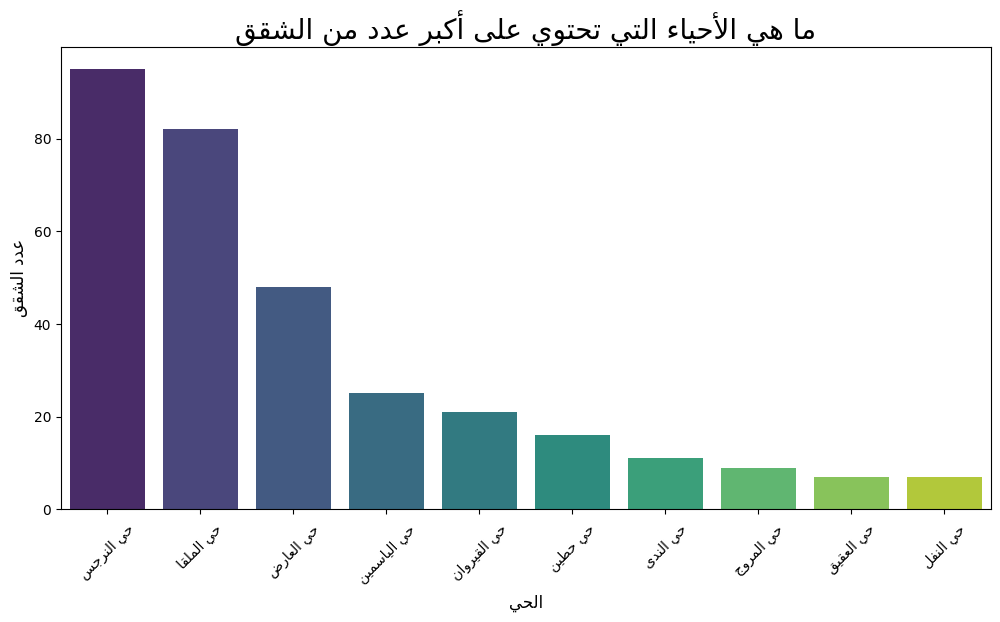

In [278]:

# حساب عدد الشقق في كل حي
district_counts = df_apartments[df_apartments['الحي'] != ' الرياض ']['الحي'].value_counts().reset_index()
district_counts.columns = ['الحي', 'count']

# أخذ أكثر 10 أحياء بها شقق
top_districts = district_counts.head(10)

# تجهيز النصوص العربية
title_text = get_display(arabic_reshaper.reshape('ما هي الأحياء التي تحتوي على أكبر عدد من الشقق'))
xlabel_text = get_display(arabic_reshaper.reshape('الحي'))
ylabel_text = get_display(arabic_reshaper.reshape('عدد الشقق'))

# رسم مخطط Bar Chart
plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_districts['الحي'], y=top_districts['count'], palette="viridis")

# تعديل التسميات إلى العربية
ax.set_xticklabels([get_display(arabic_reshaper.reshape(label.get_text())) for label in ax.get_xticklabels()], rotation=45)

# تسميات المحاور والعنوان
plt.xlabel(xlabel_text, fontsize=12)
plt.ylabel(ylabel_text, fontsize=12)
plt.title(title_text, fontsize=20)

plt.show()



Al-Narjis neighborhood stands out as the most common area with the highest number of apartments, reflecting its growing popularity and urban expansion. This could be attributed to its strategic location, well-developed infrastructure, and increasing demand for residential properties. The neighborhood's appeal is further enhanced by its proximity to key facilities, educational institutions, and commercial centers, making it an attractive choice for families and professionals. Additionally, ongoing urban development projects in Riyadh may have contributed to the rise in housing availability in Al-Narjis, aligning with the city's vision for sustainable and organized residential growth.